In [5]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from explore.grafic import GrafigCatNp as graf
from explore.finding import InfoMissingAll as missing
import seaborn as sns


# Preprocesado y modelado
# ------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

from sklearn.linear_model import Ridge, LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler

from regressors import stats

# Validación de datos
# -------------------------------------------
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [6]:
df = pd.read_csv('./housing.data', sep=' ')
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df['MEDV'].sort_values()

398     5.0
405     5.0
400     5.6
399     6.3
414     7.0
       ... 
166    50.0
195    50.0
283    50.0
225    50.0
186    50.0
Name: MEDV, Length: 506, dtype: float64

In [7]:
grafic = graf(df)

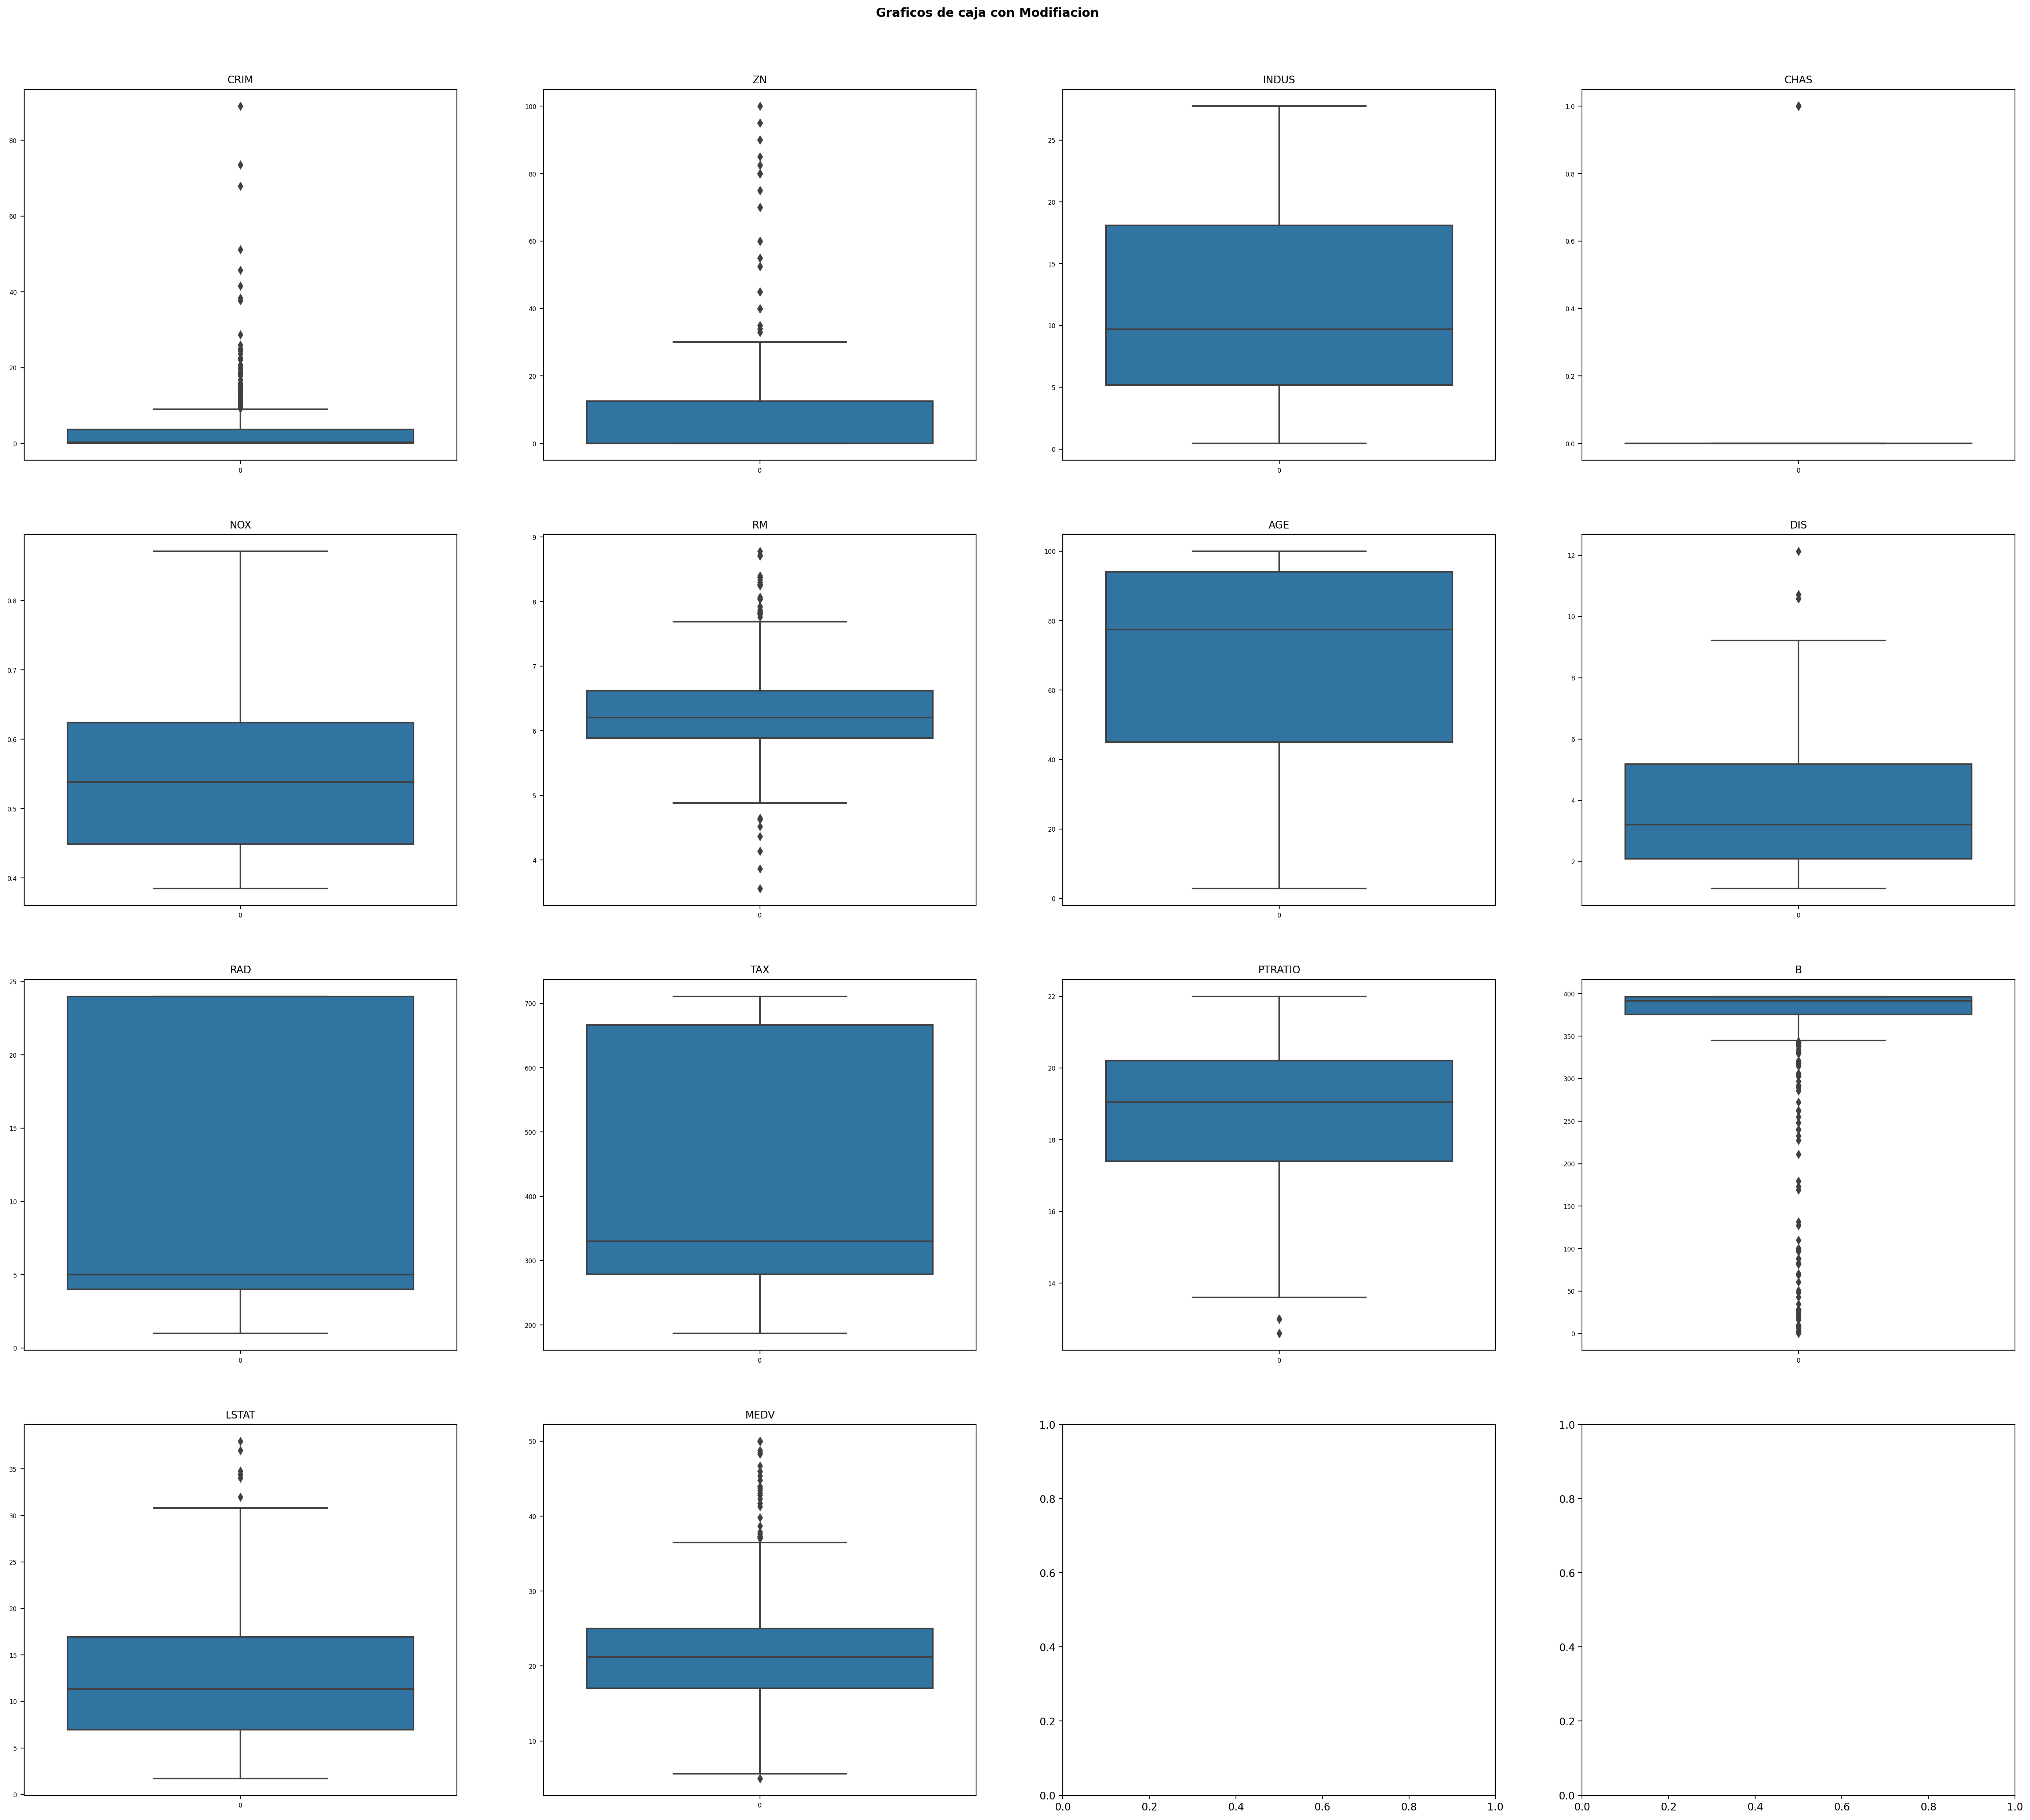

In [8]:
grafic.box_num(4,4)

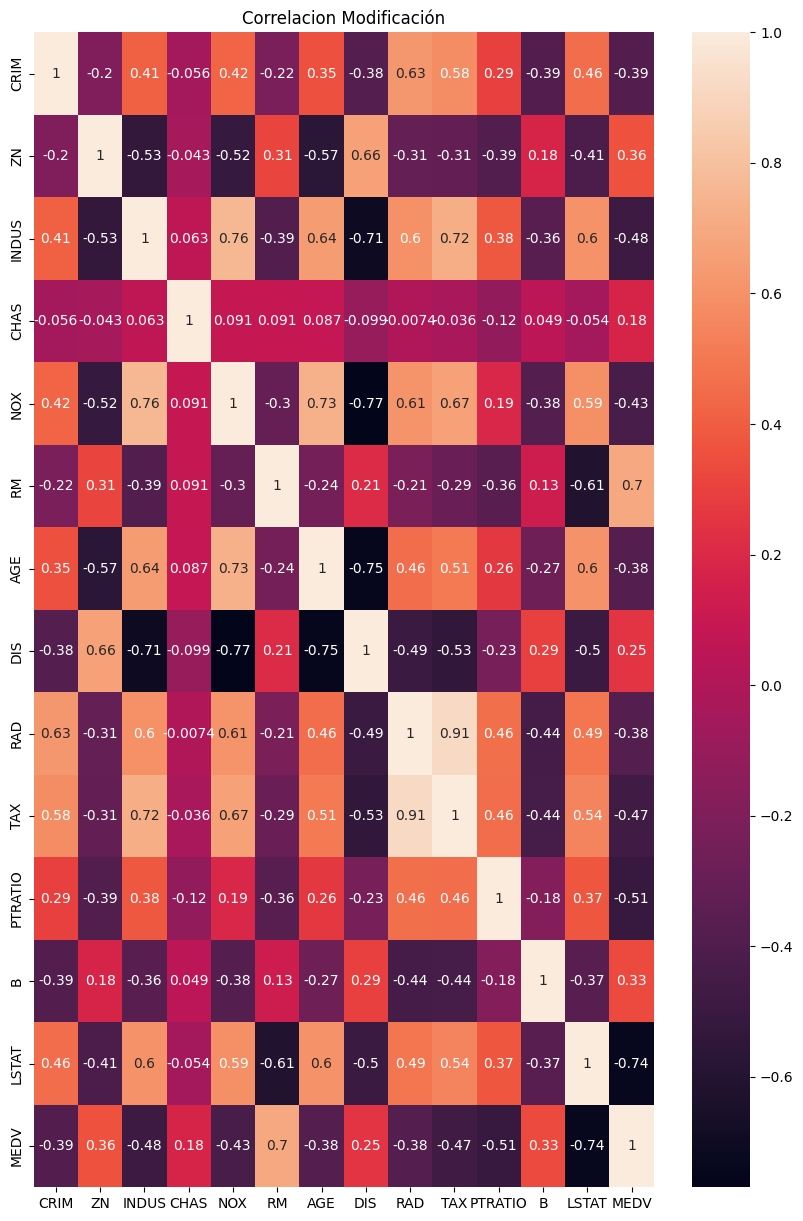

In [9]:
grafic.corr_grafic()

<h2>MEDV</h2>

In [10]:
df['MEDV'] = np.log(df['MEDV'])

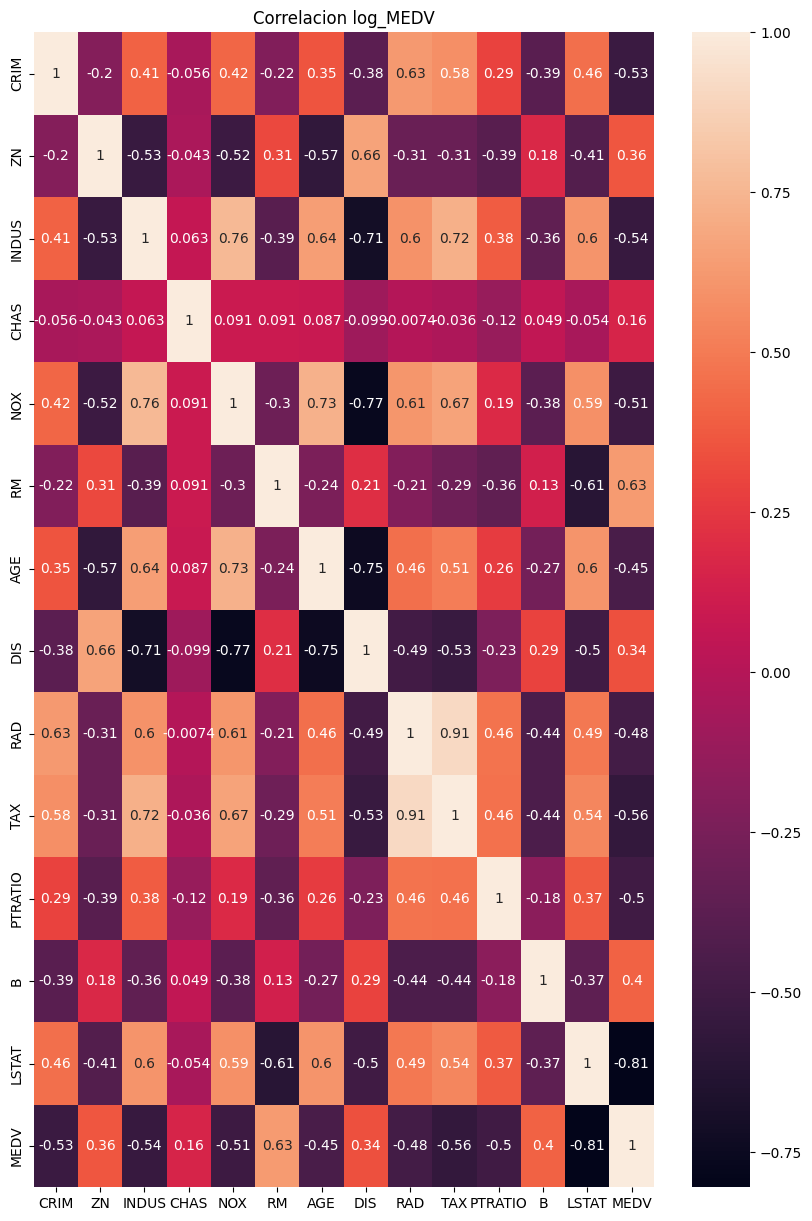

In [11]:
grafic.corr_grafic(name='log_MEDV')

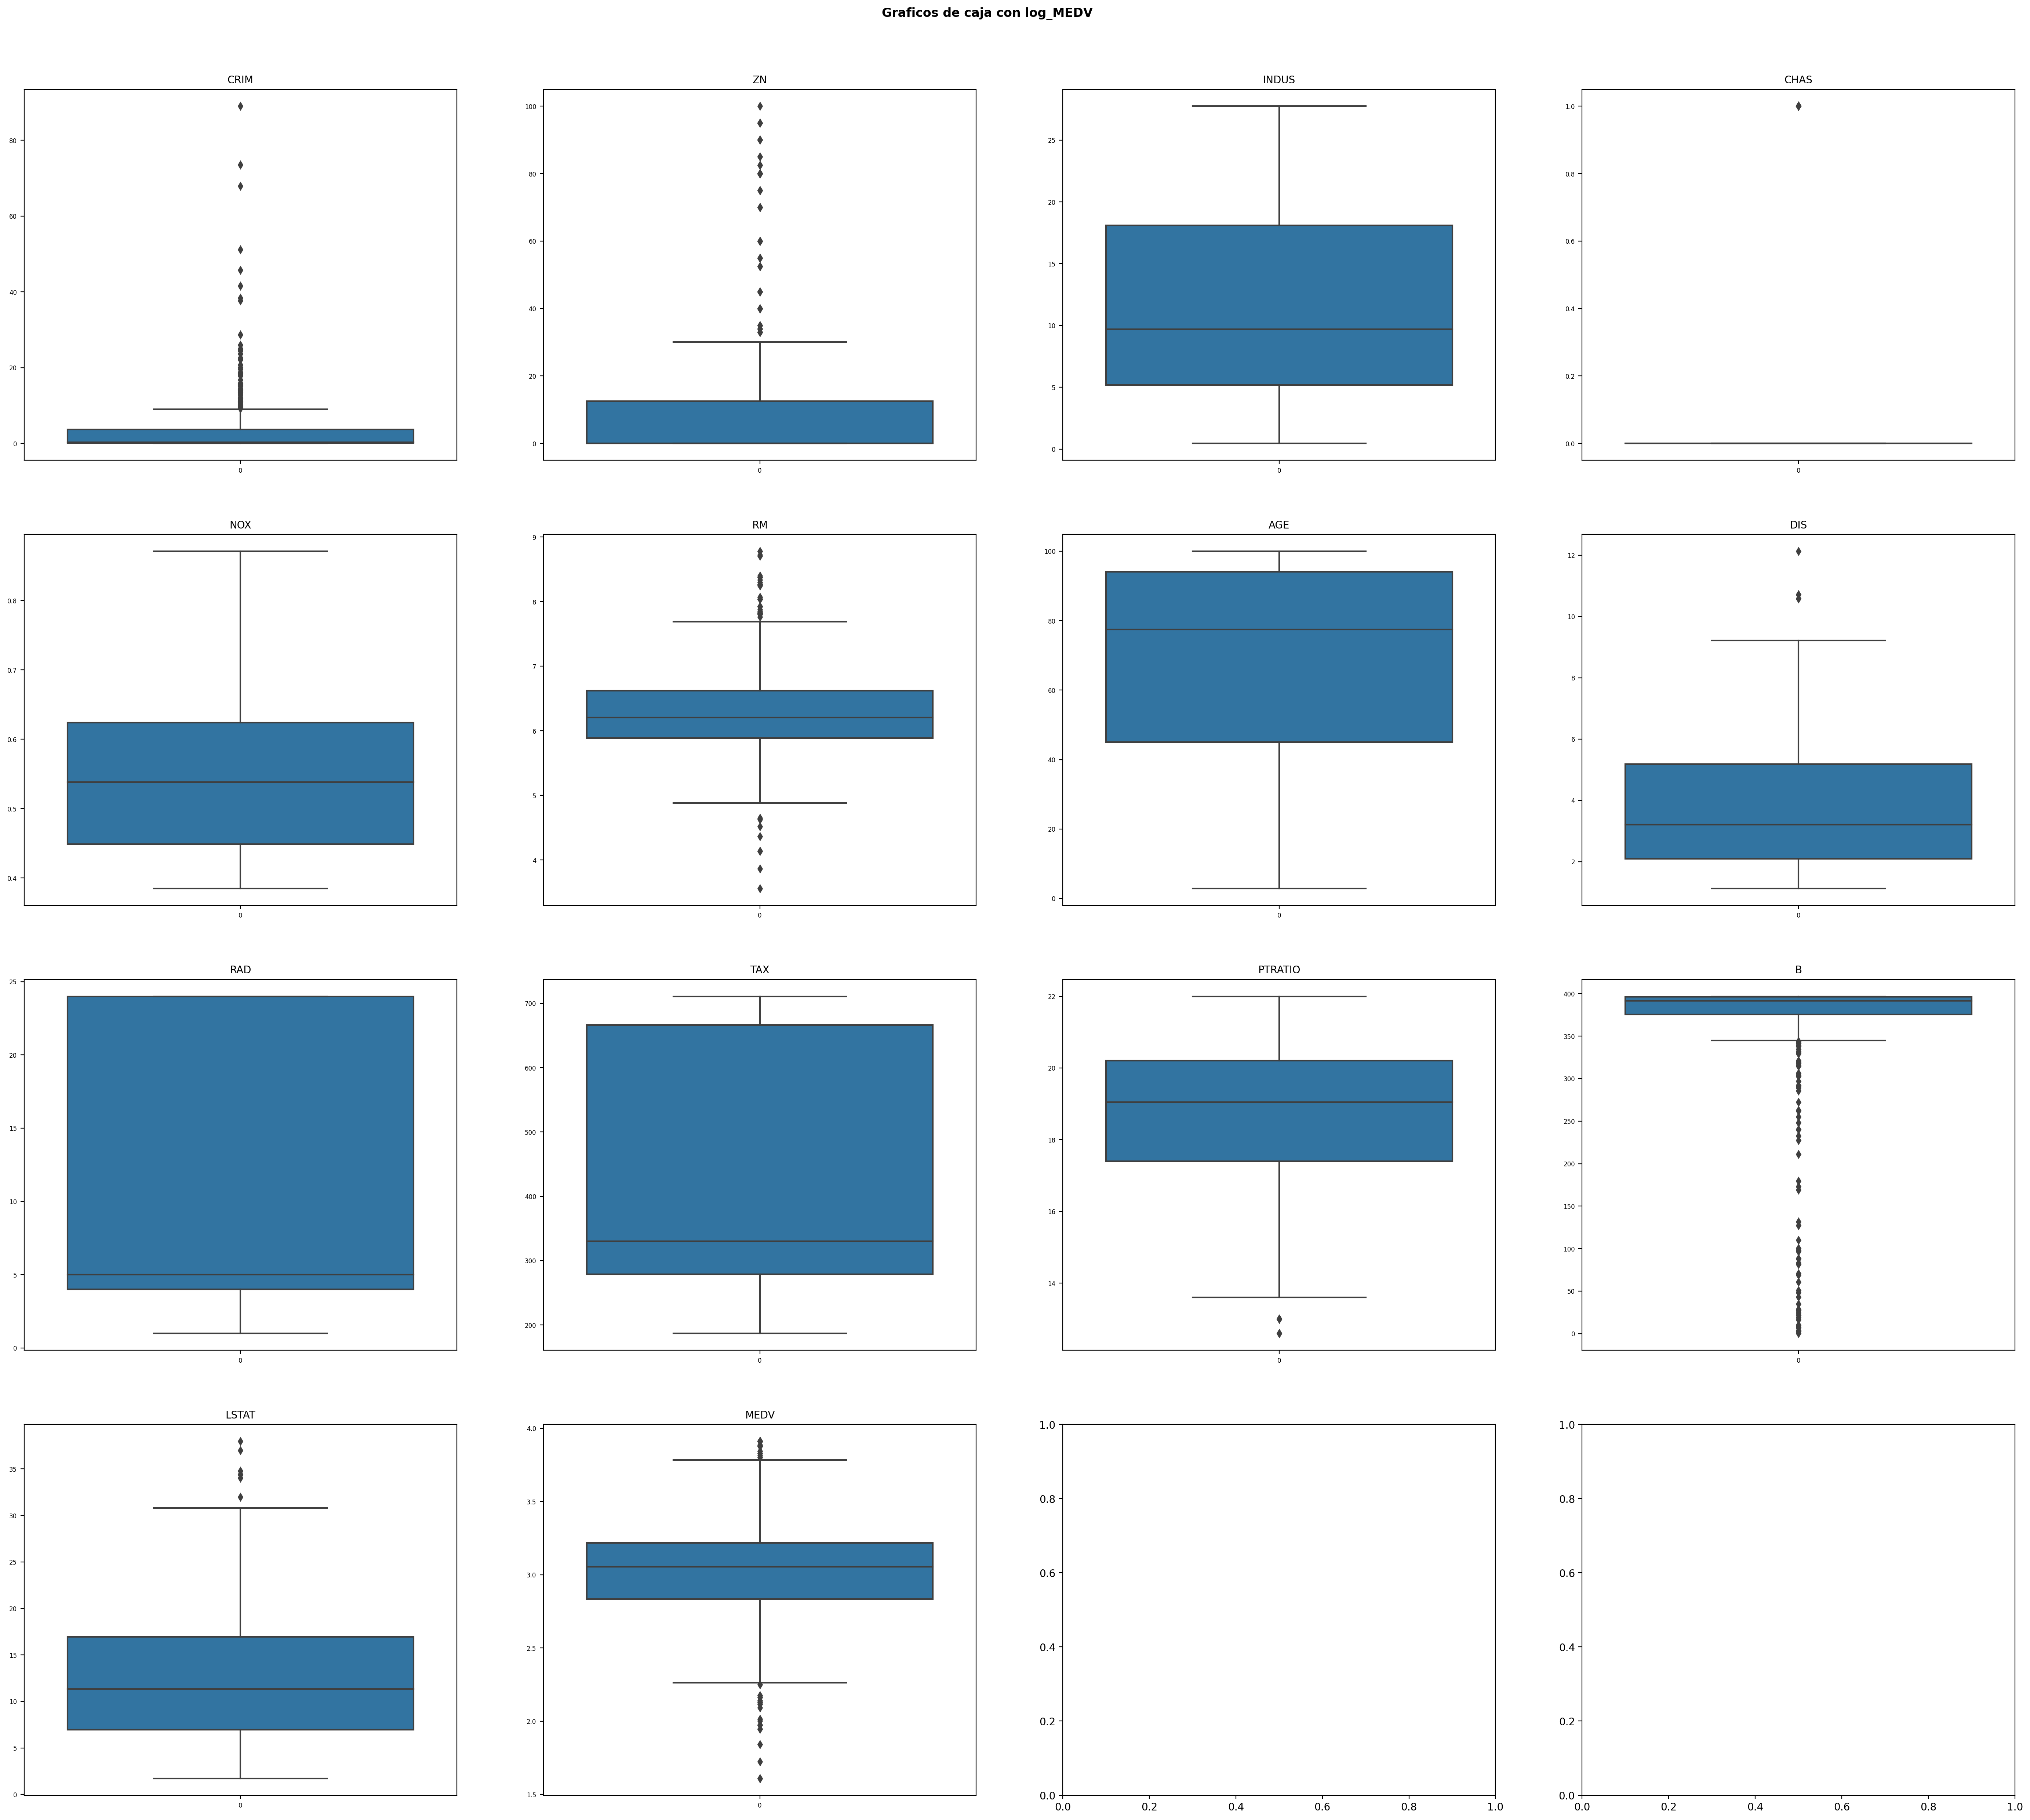

In [12]:
grafic.box_num(4,4,name='log_MEDV')

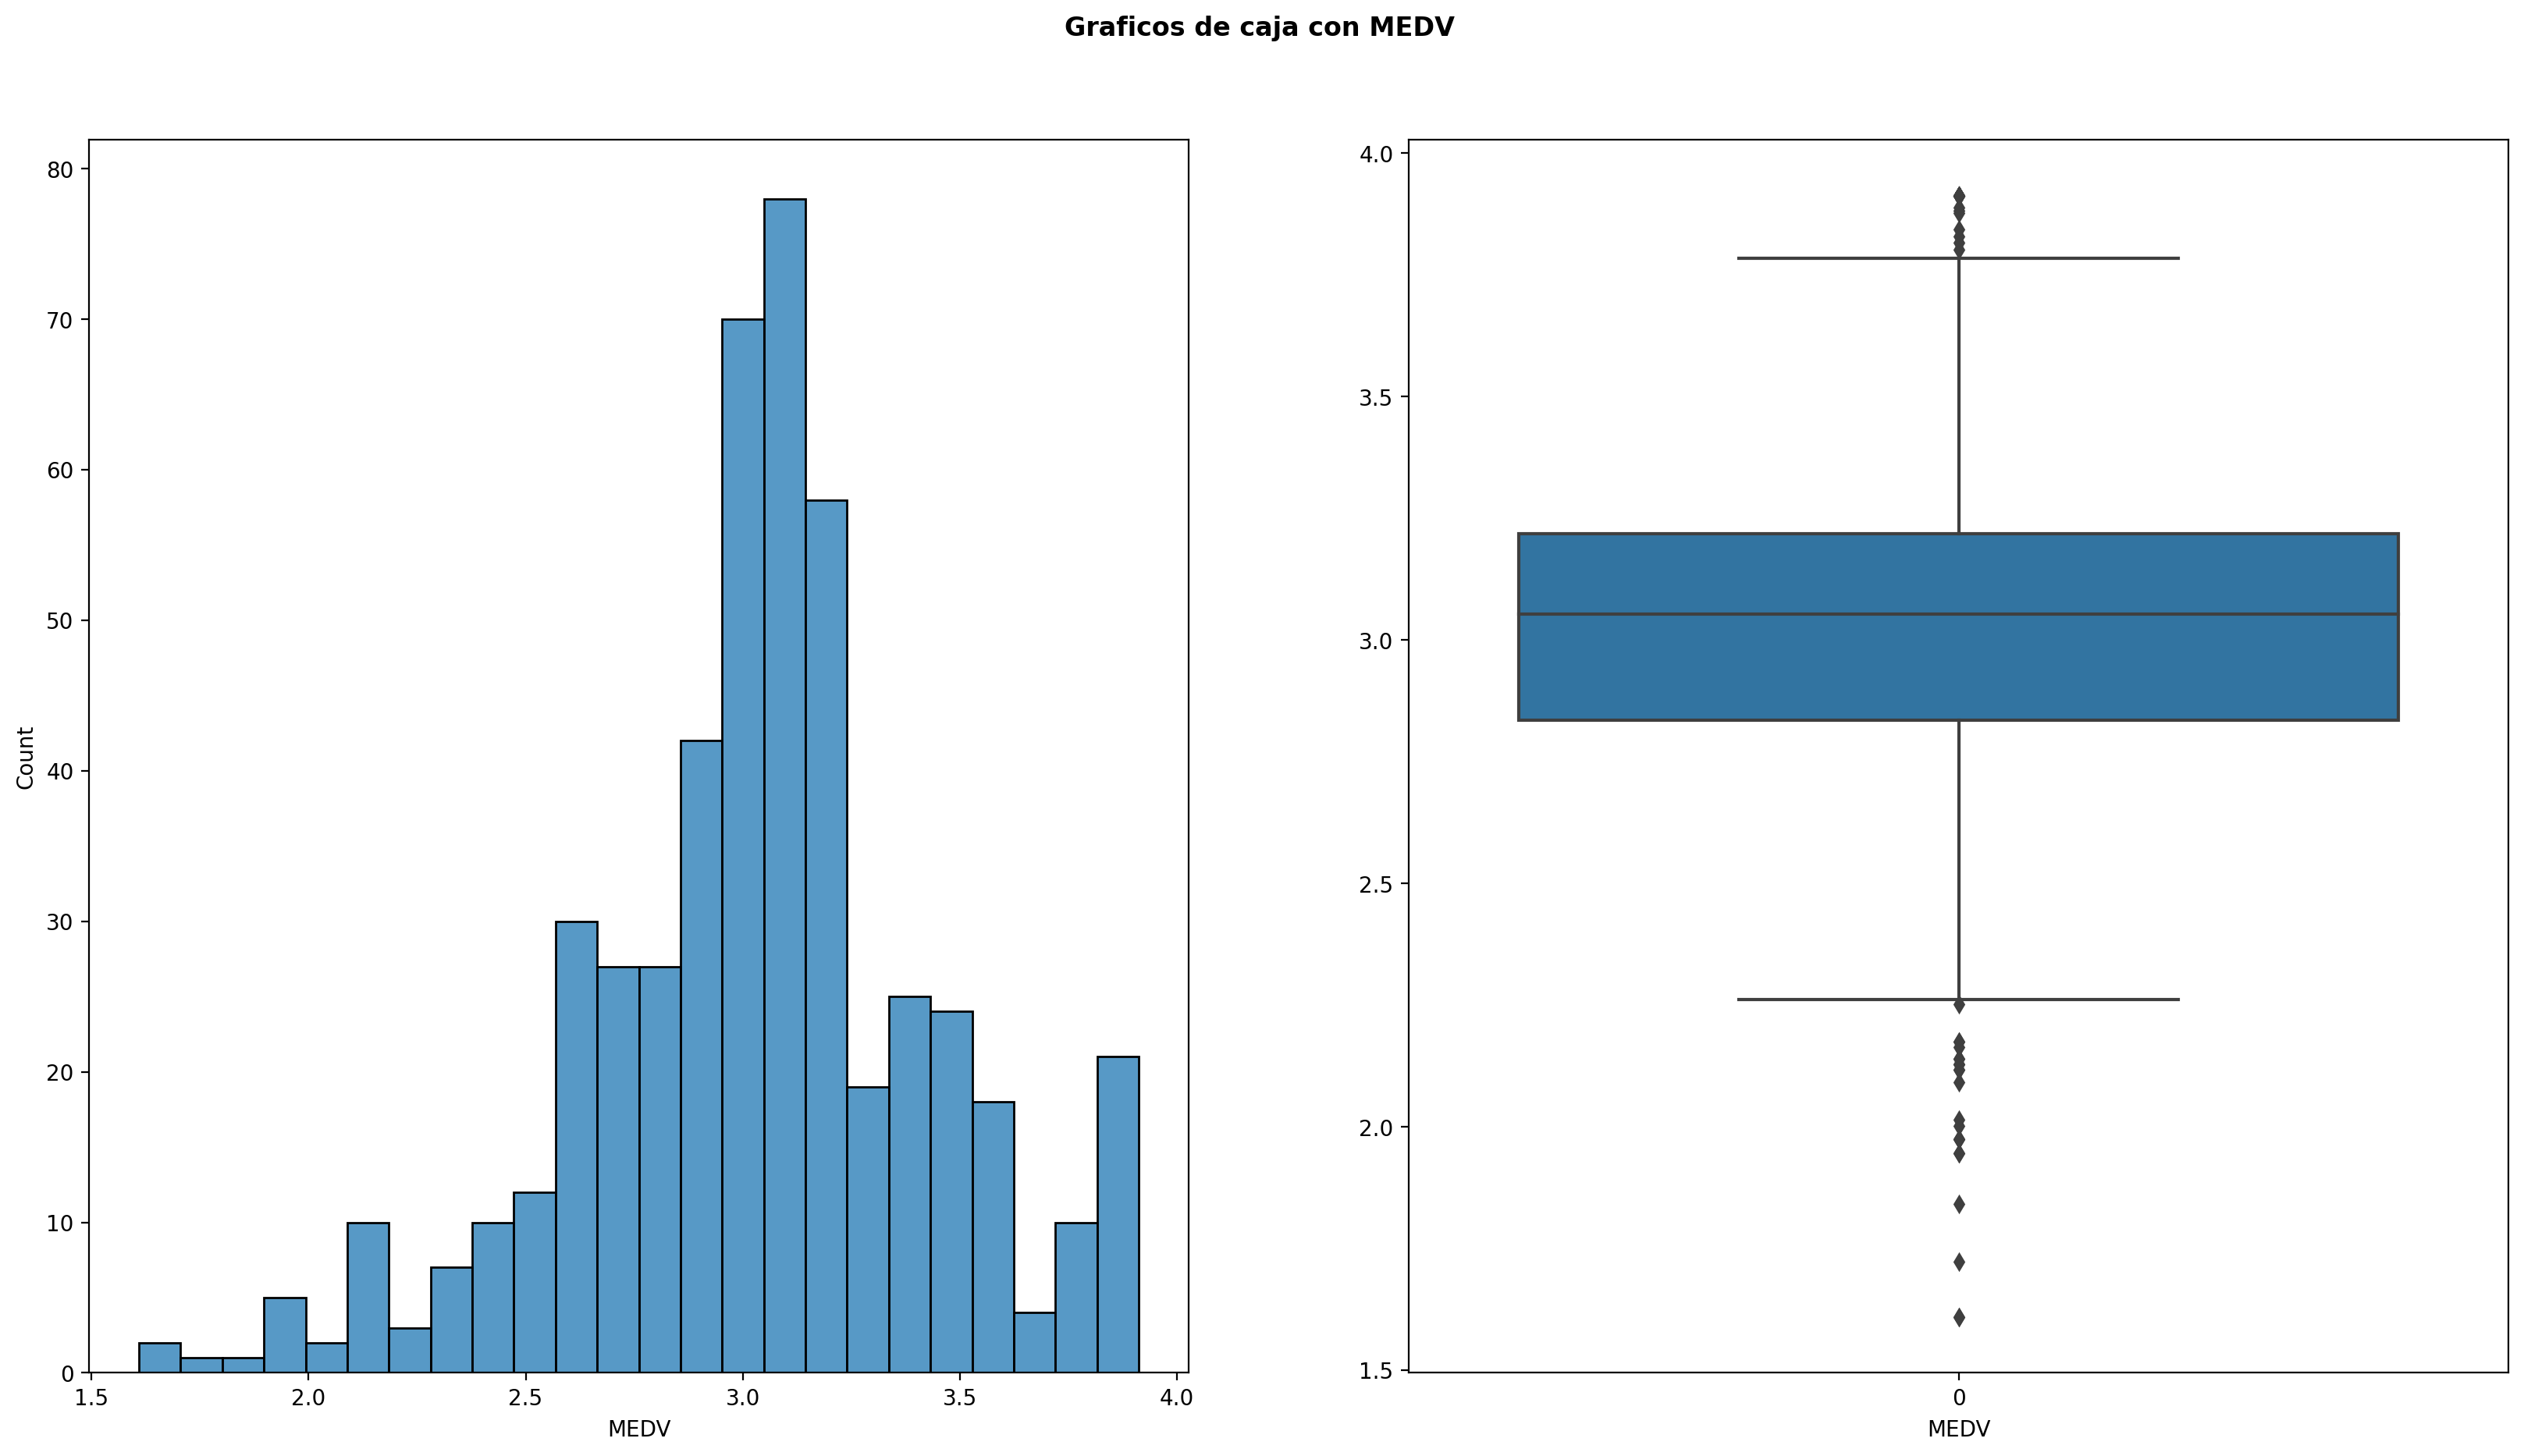

In [13]:
graf(df).grafic_analist(variable='MEDV', distribution='normal')

<h2>CRIM</h2>

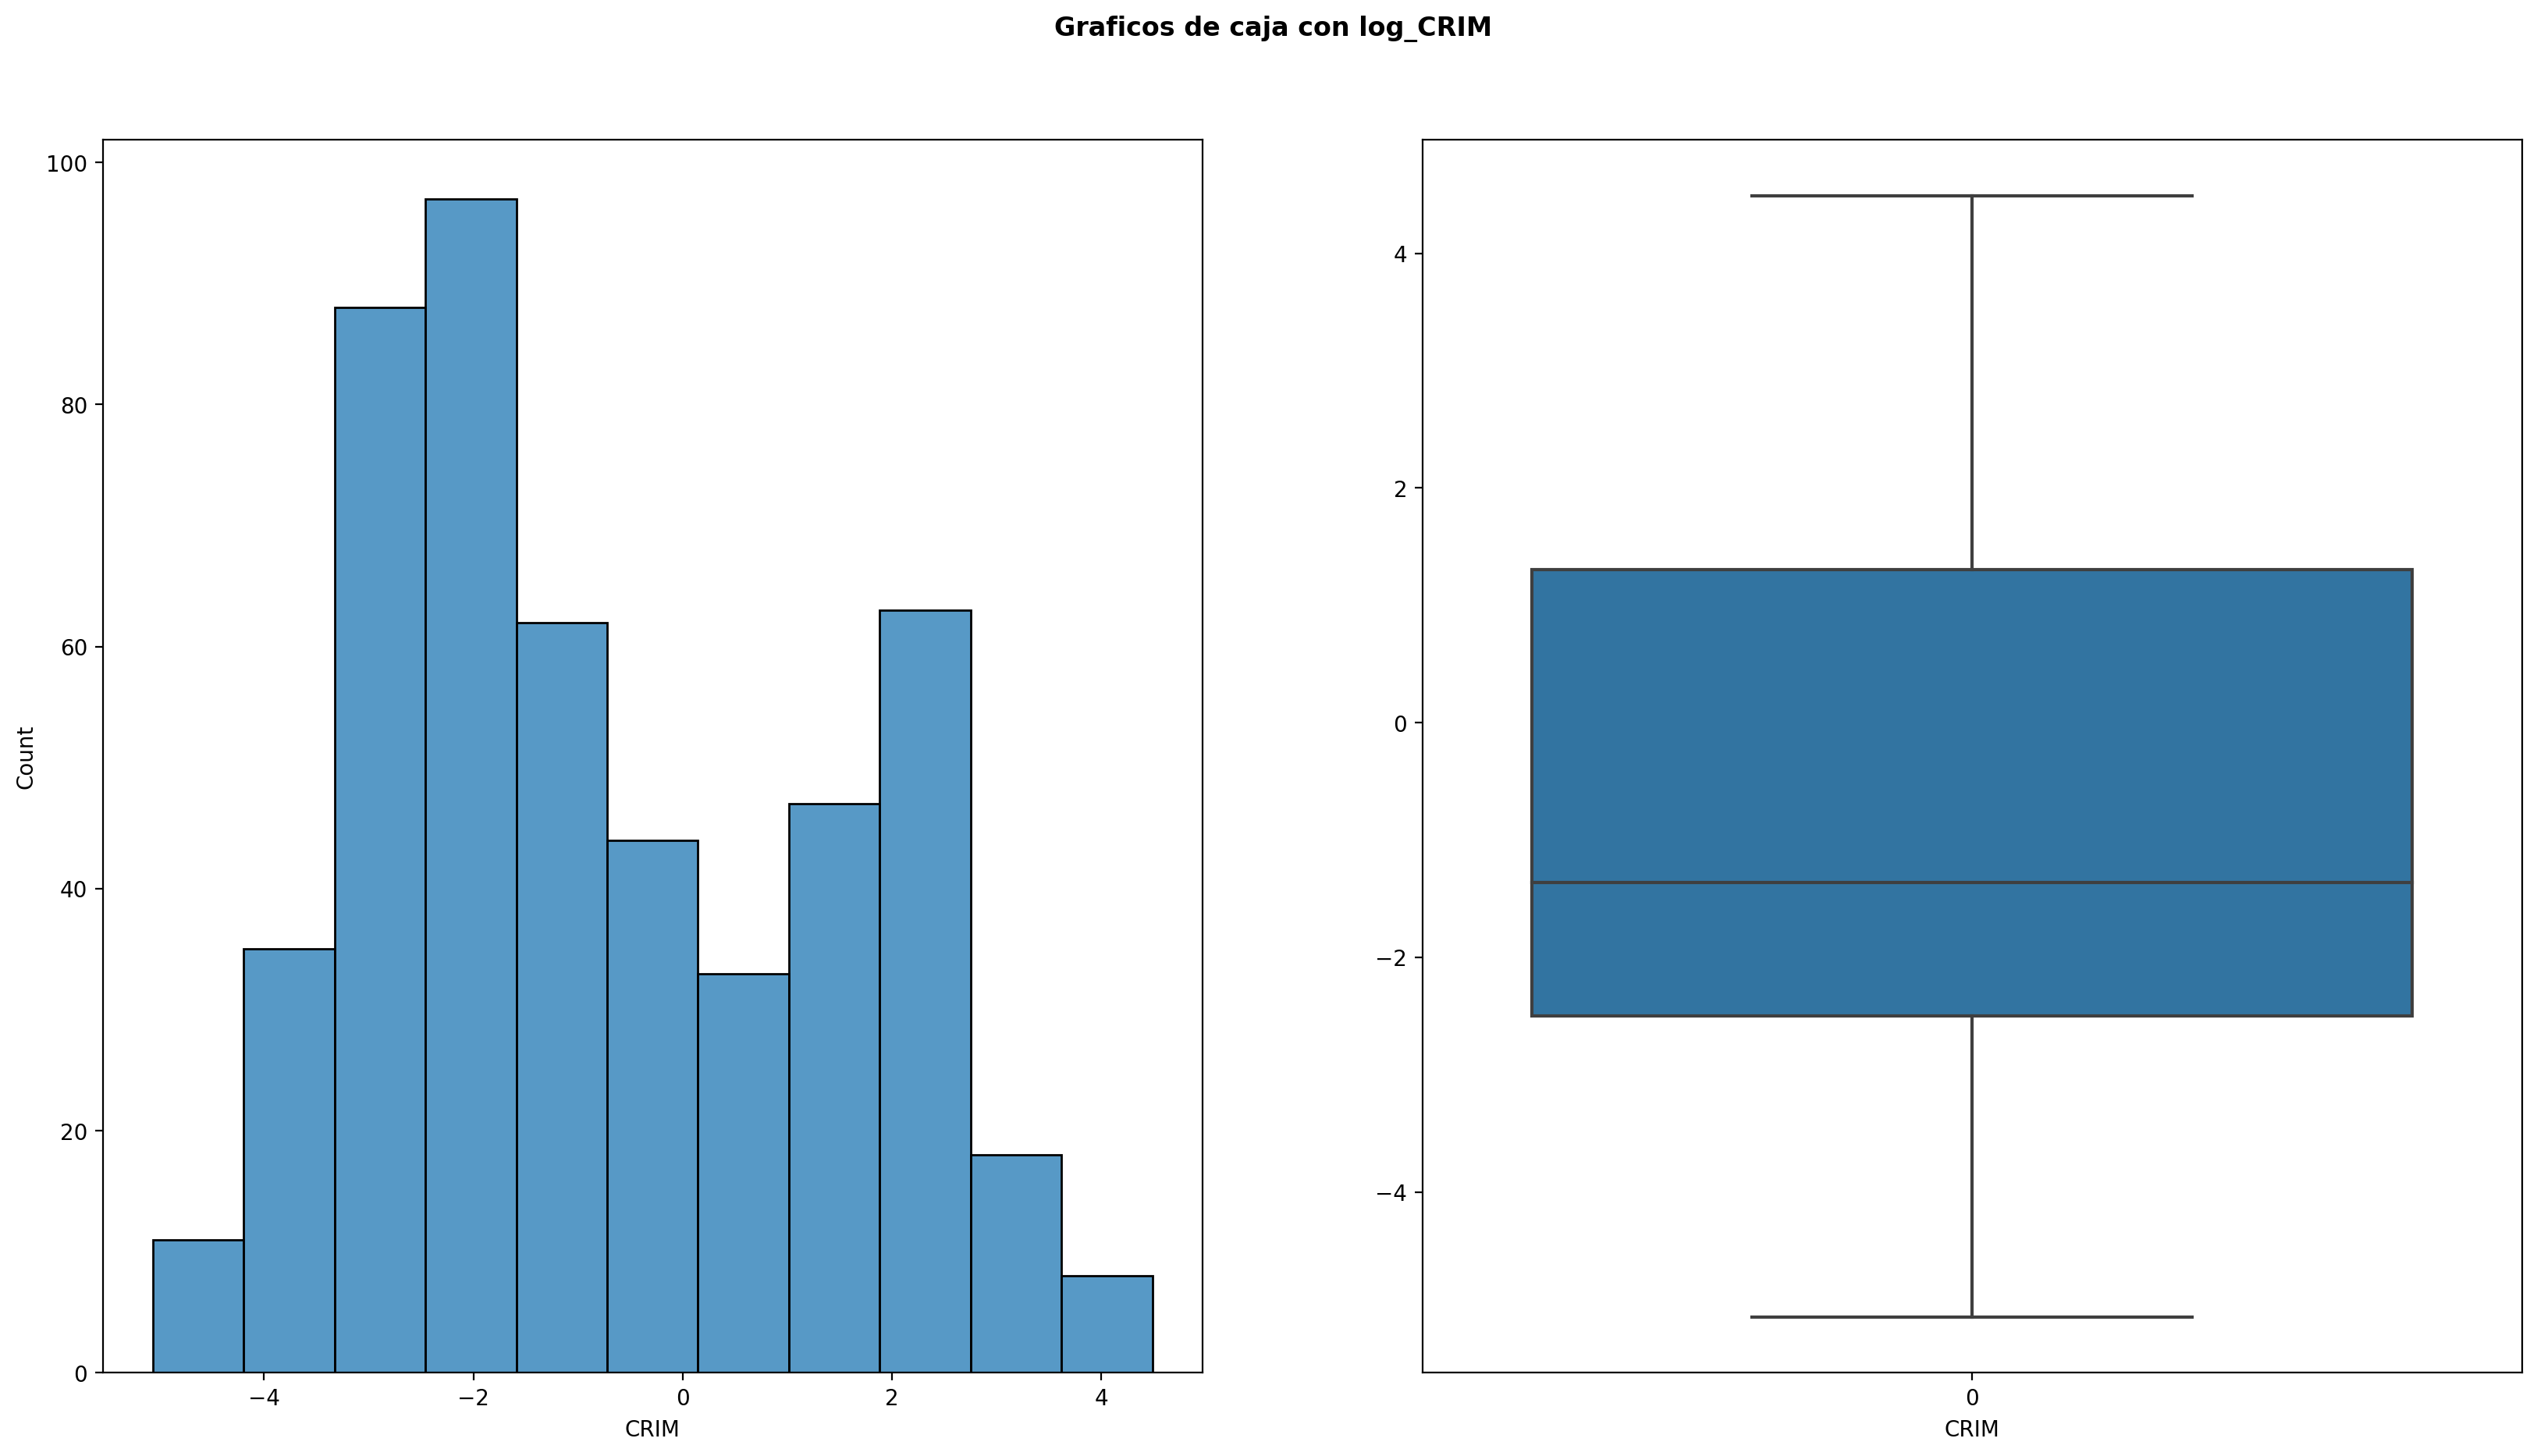

In [14]:
graf(df).grafic_analist(variable='CRIM', distribution='log')

In [15]:
df['CRIM'] = np.sqrt(df['CRIM'])

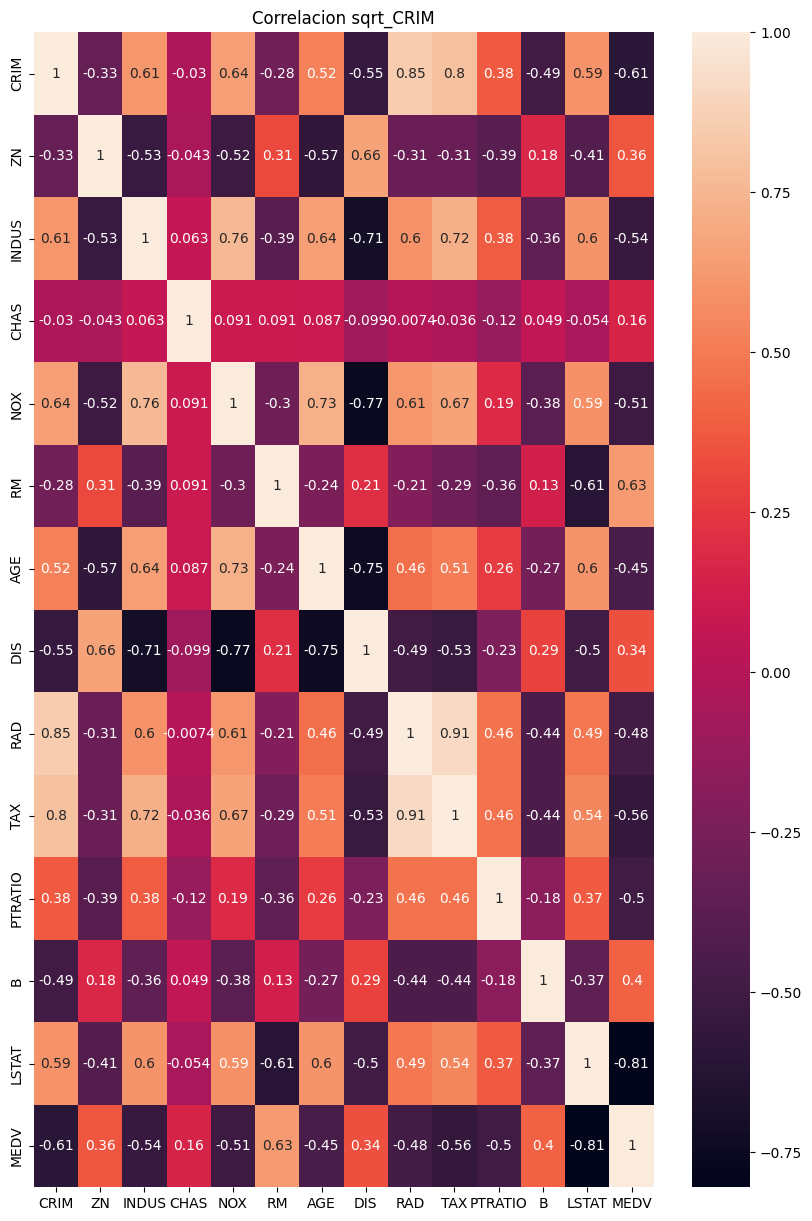

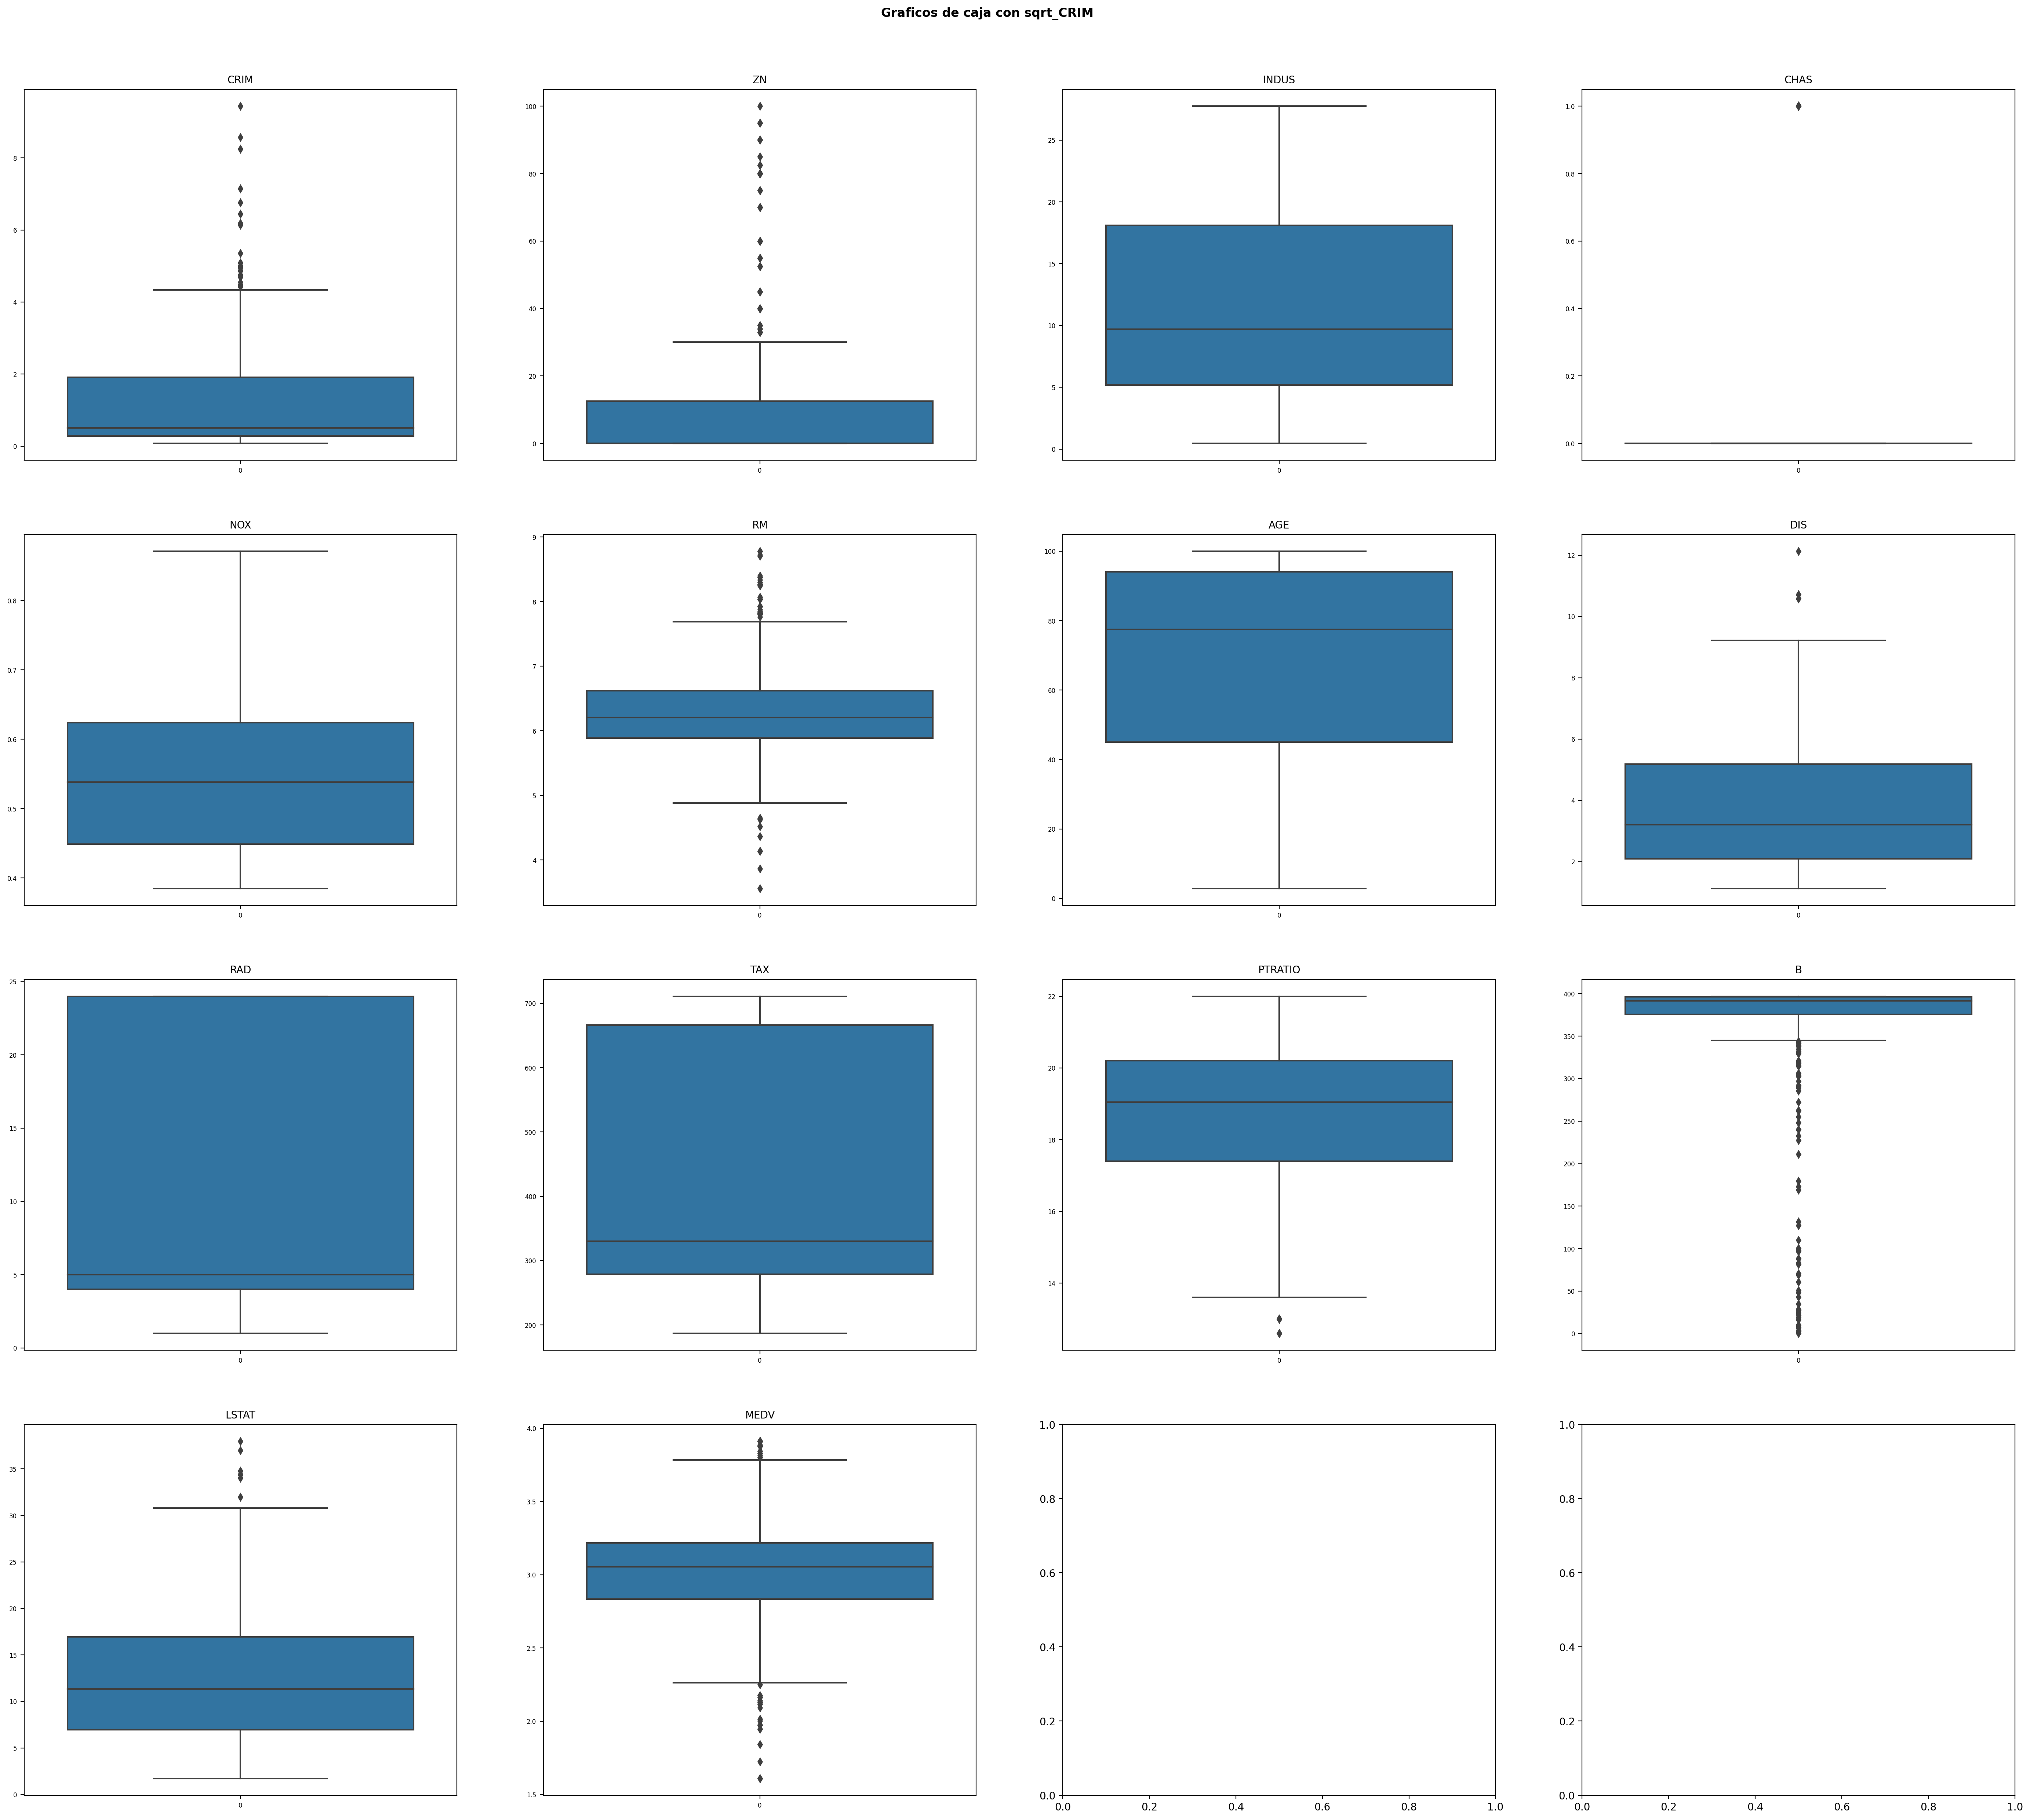

In [16]:
grafic.corr_grafic(name='sqrt_CRIM')
grafic.box_num(4,4,name='sqrt_CRIM')

In [17]:
# df_copy = df.copy()

df['CRIM'] = np.where(df['CRIM'] > 8.6, 8.575203, df['CRIM'])
df['CRIM'].sort_values(ascending=False)

380    8.575203
418    8.575203
405    8.241408
410    7.150930
414    6.763586
         ...   
55     0.114499
341    0.114061
285    0.104690
284    0.095184
0      0.079498
Name: CRIM, Length: 506, dtype: float64

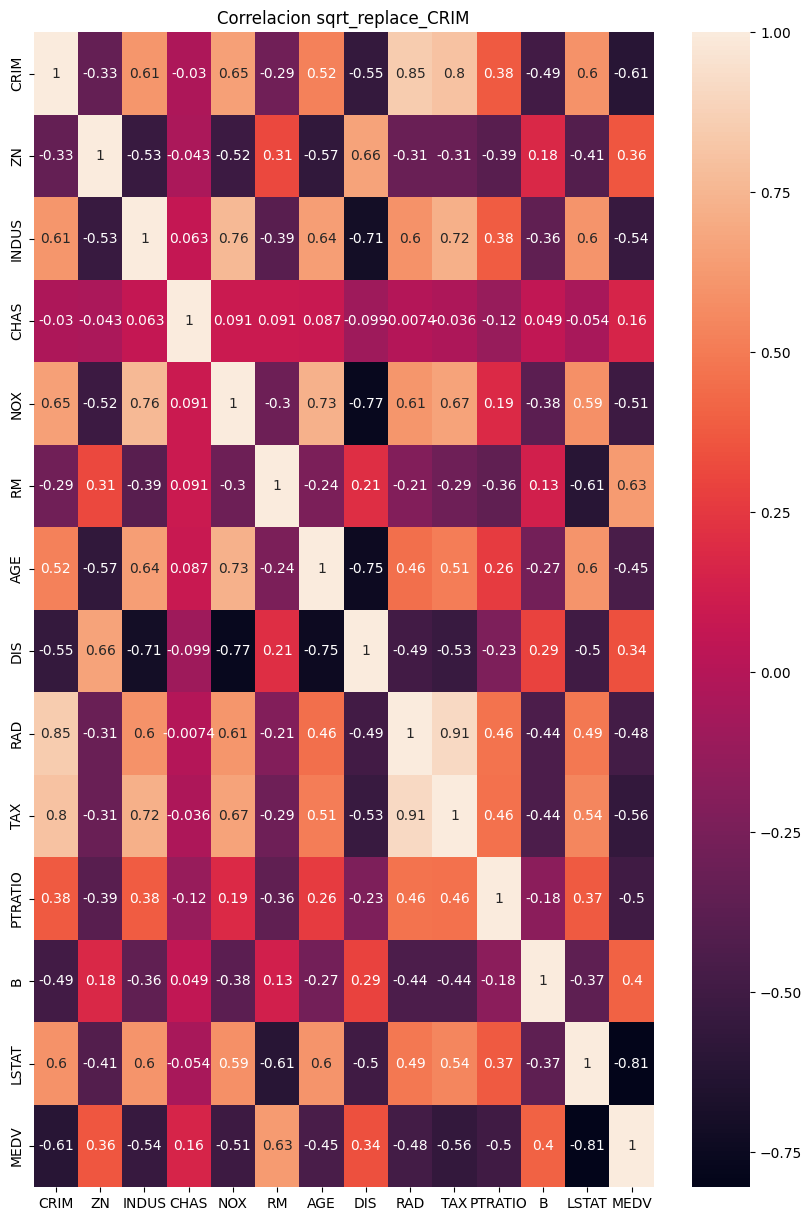

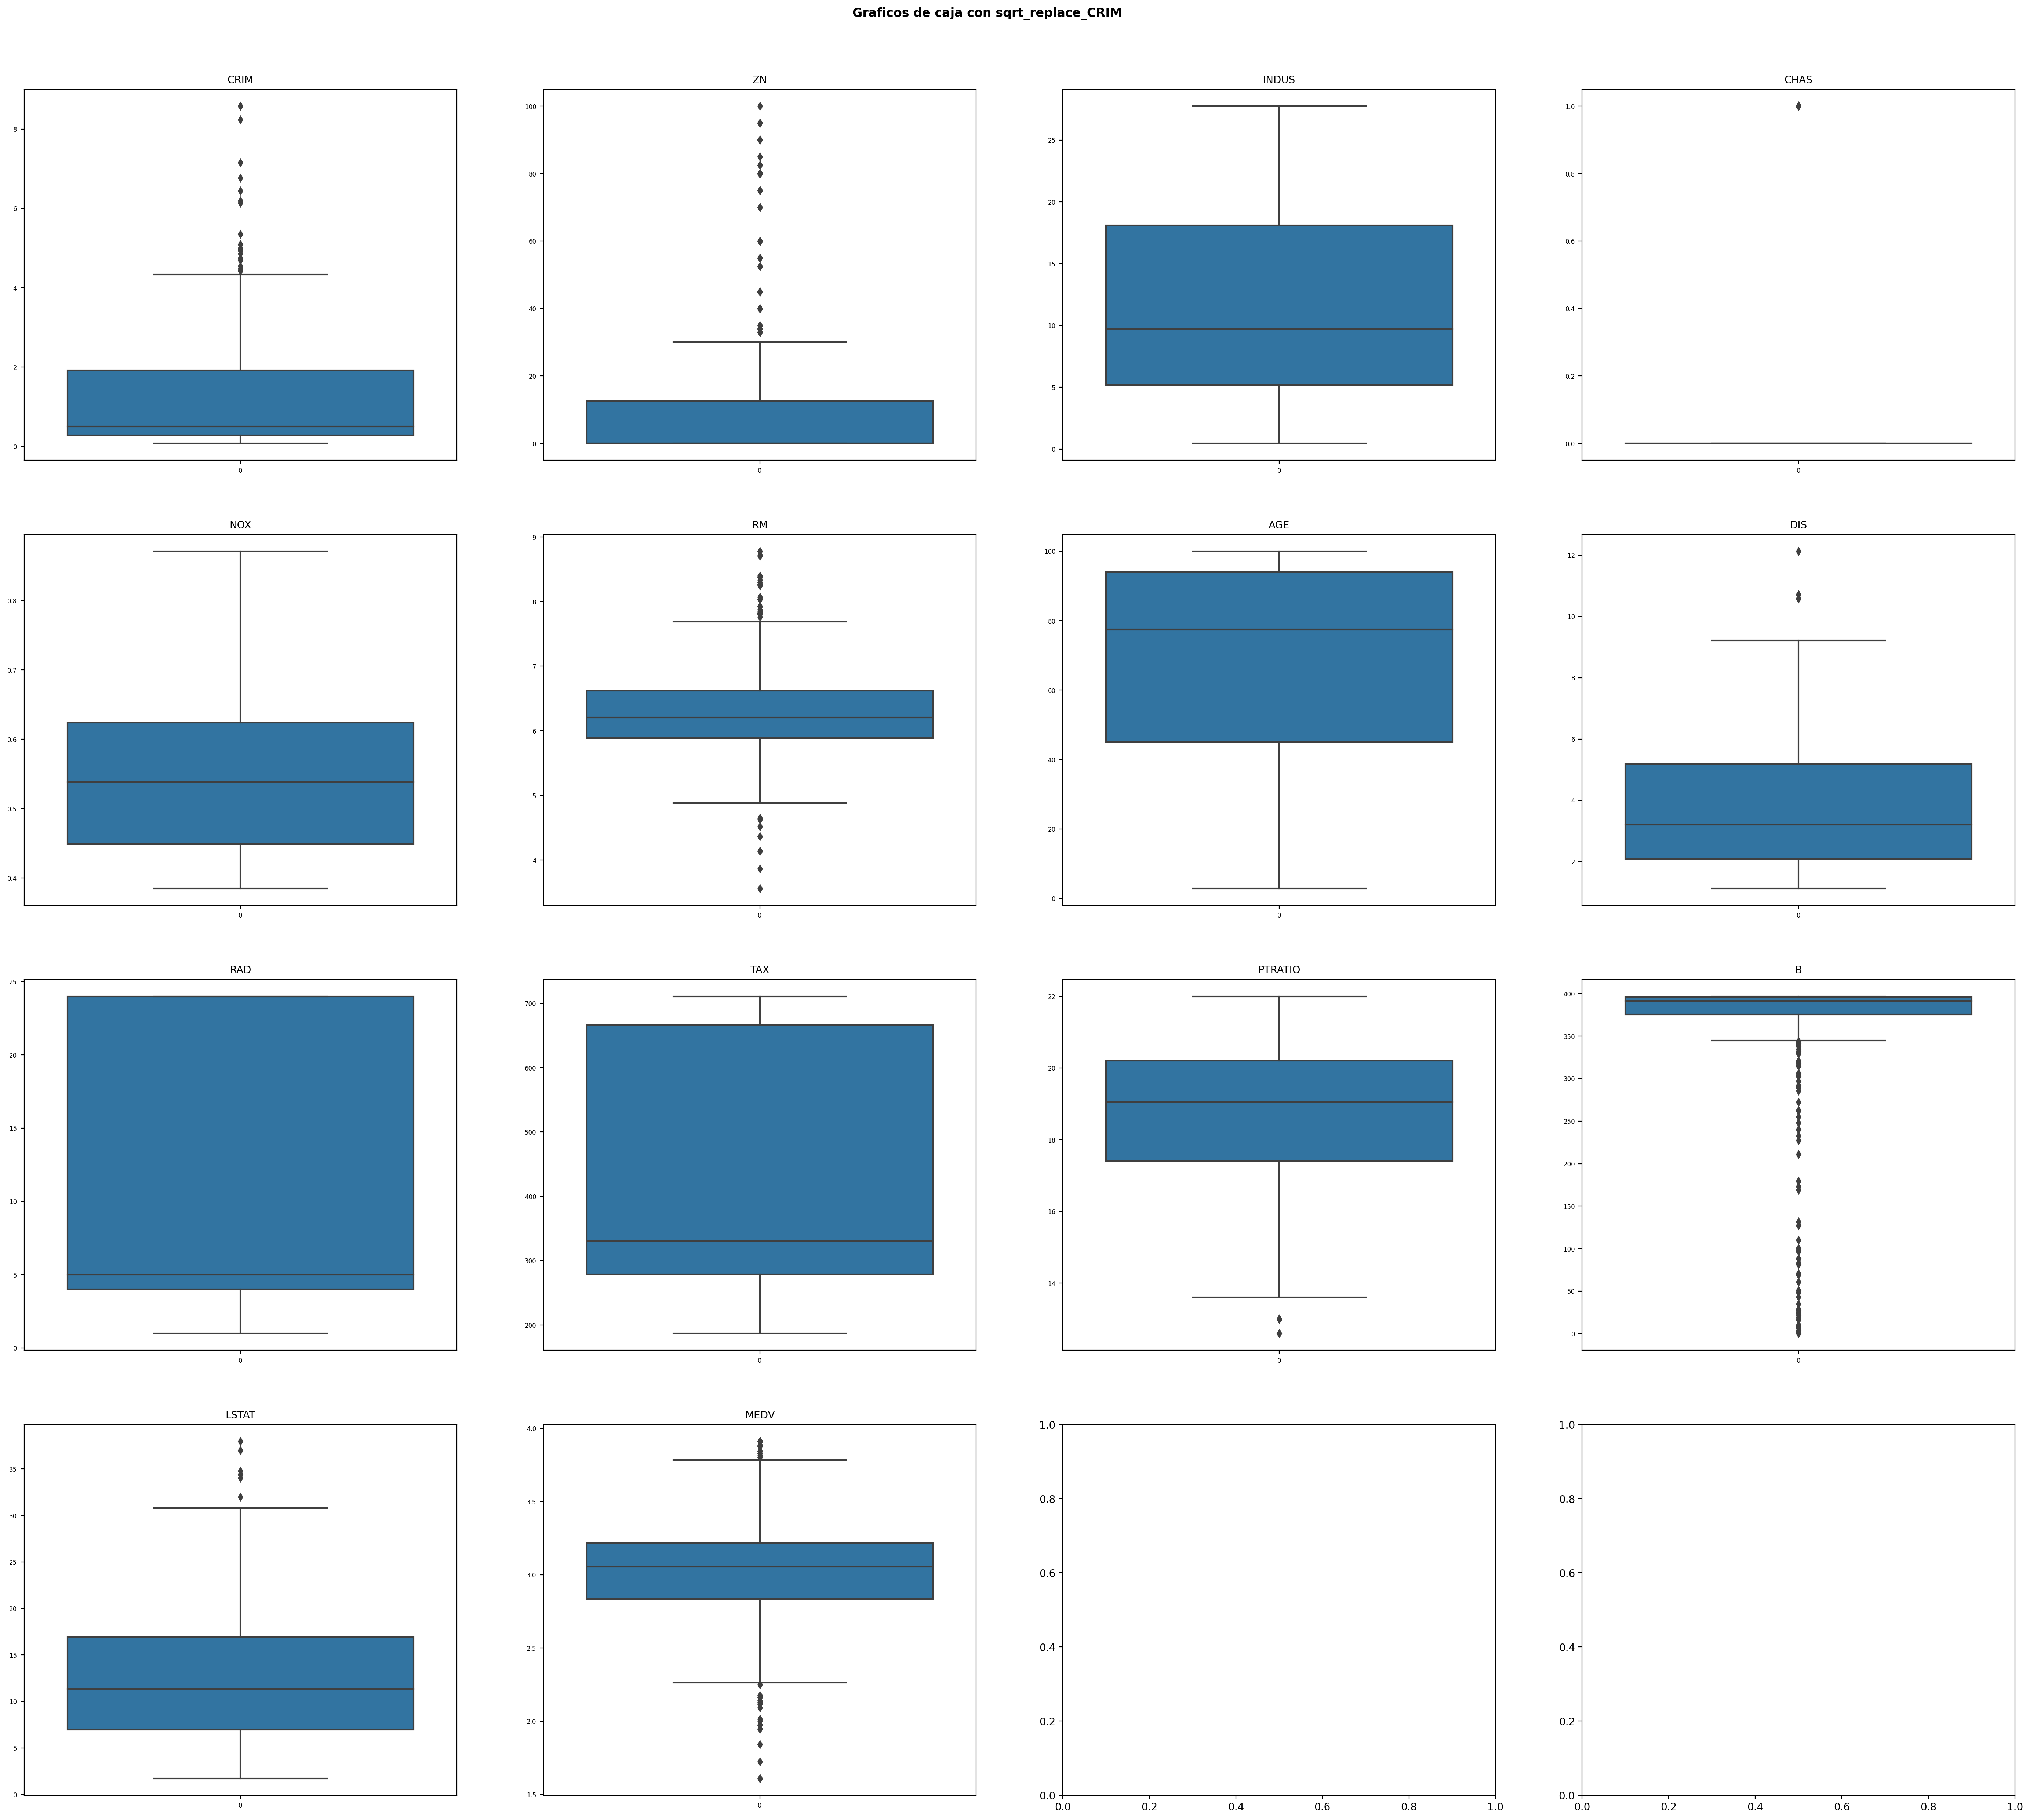

In [18]:
graf(df).corr_grafic(name='sqrt_replace_CRIM')
graf(df).box_num(4,4,name='sqrt_replace_CRIM')

<h2>ZN</h2>

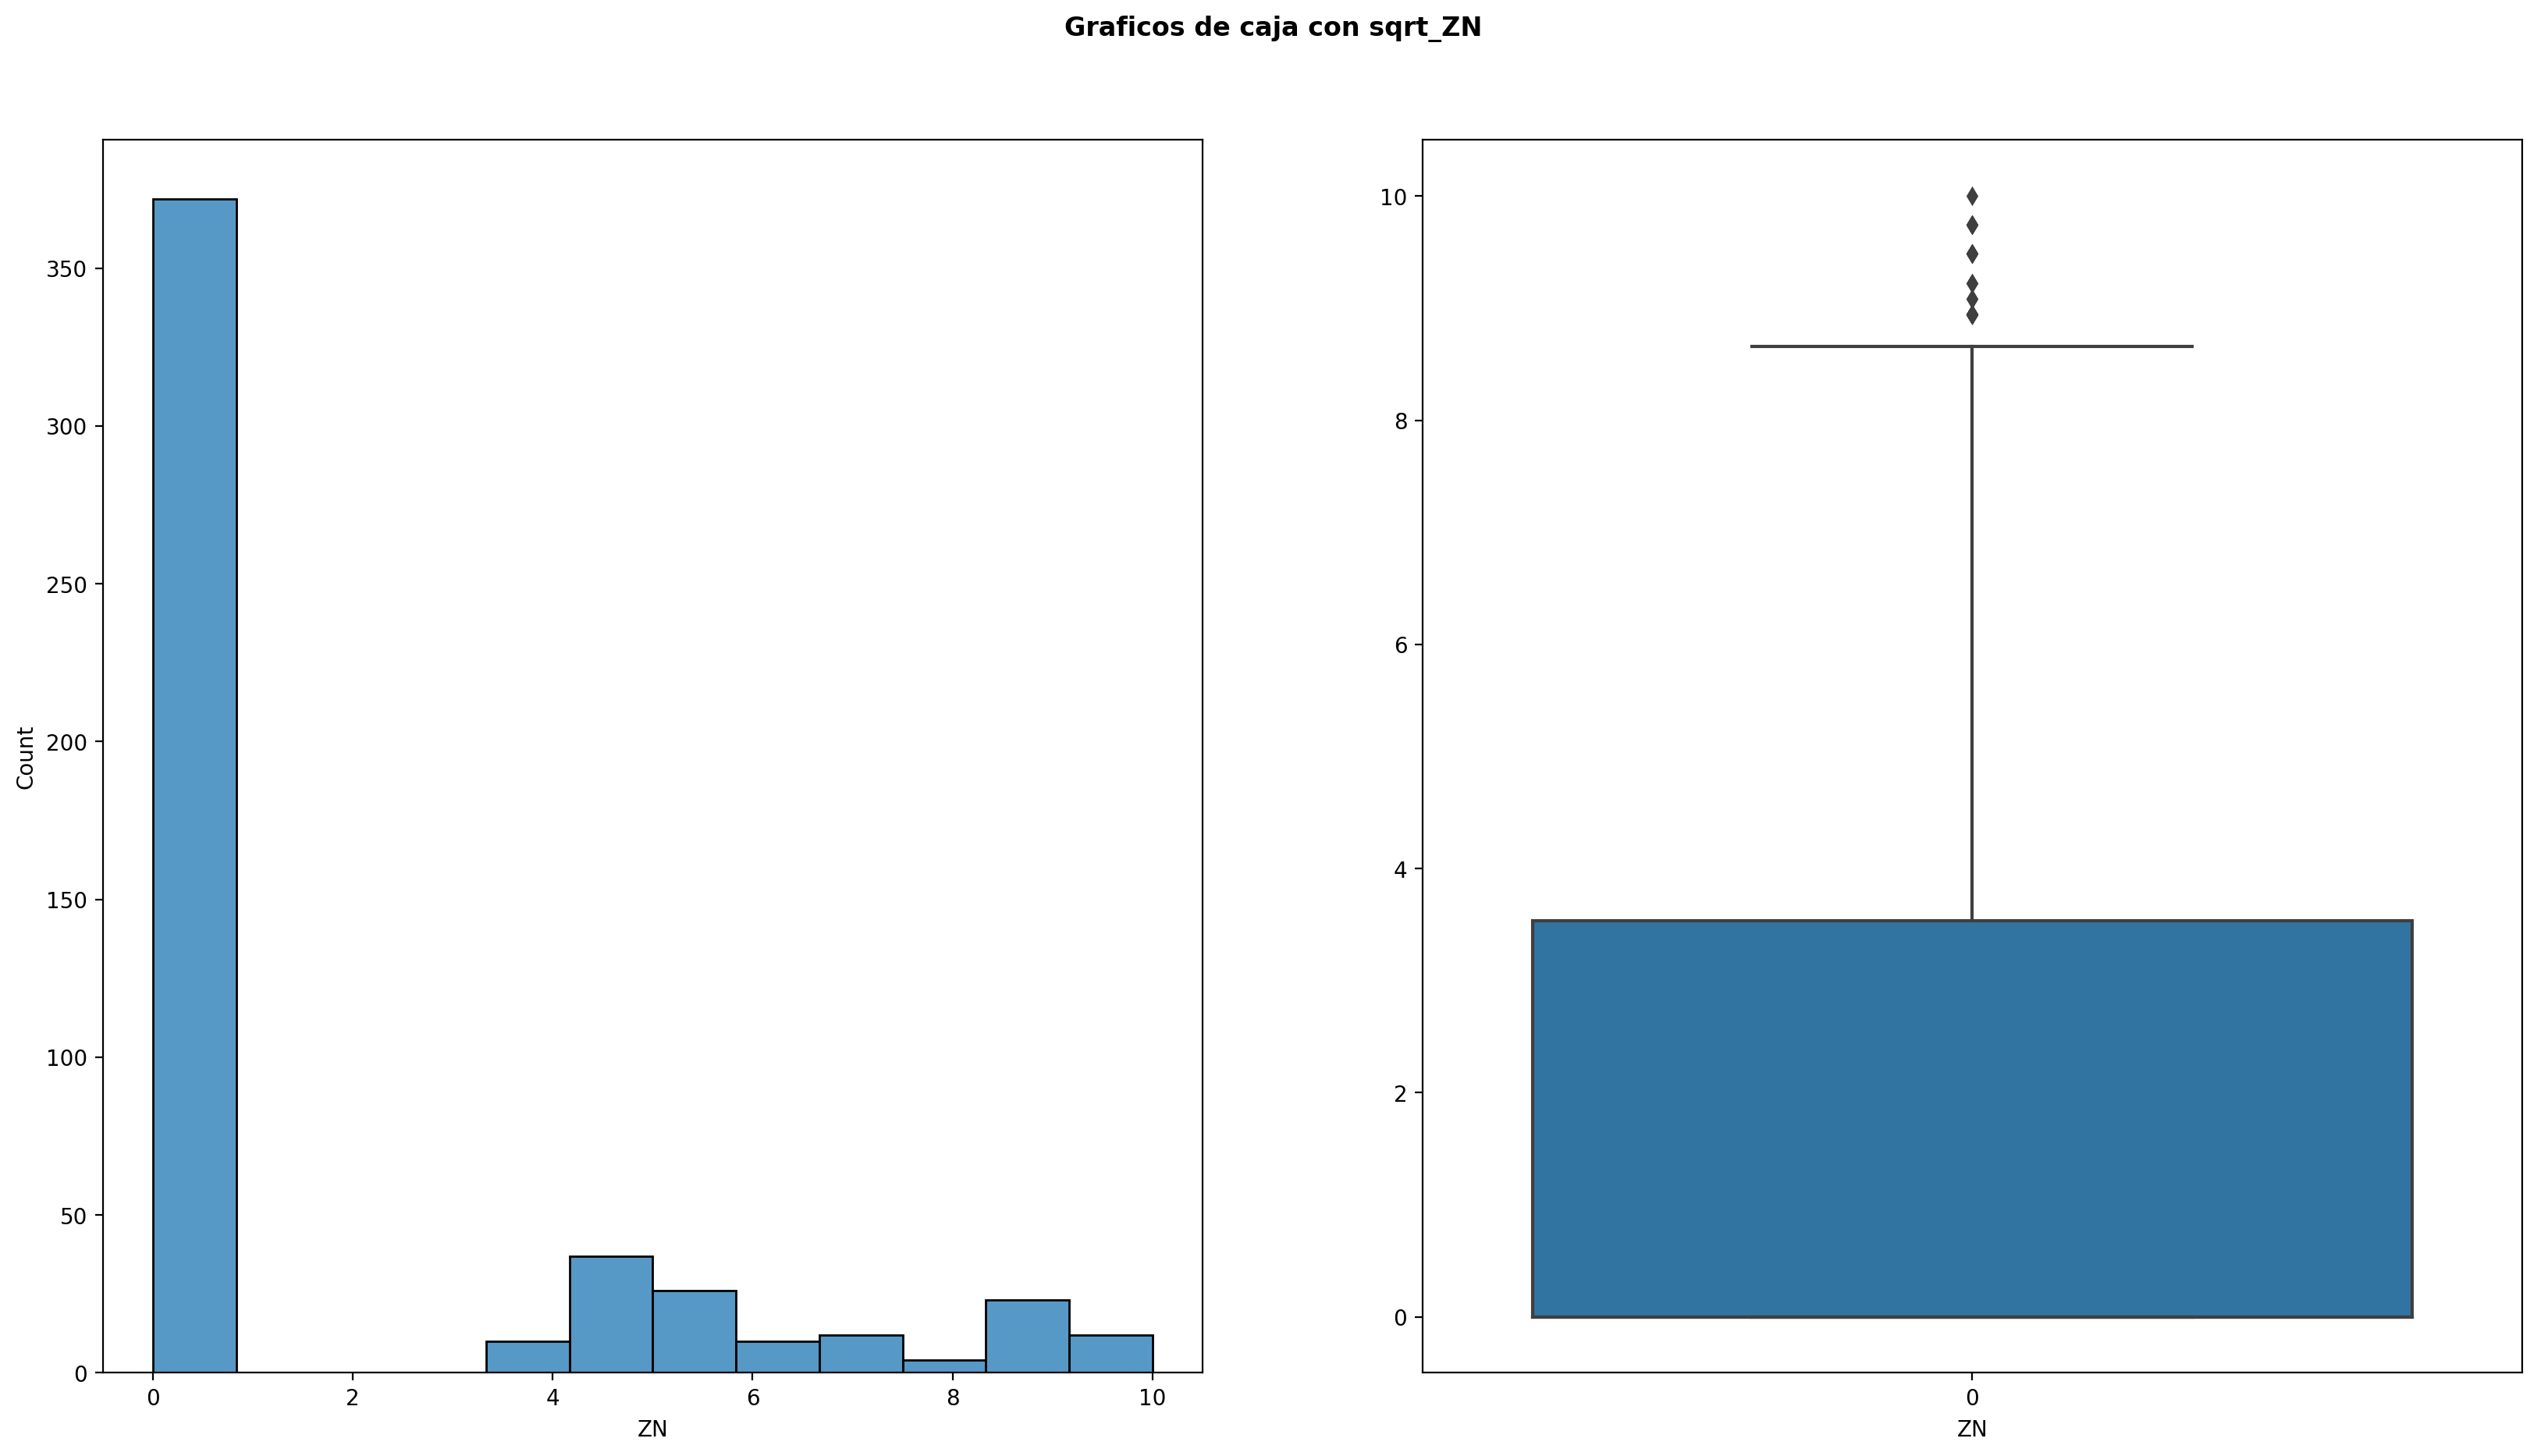

In [19]:
grafic.grafic_analist(variable='ZN', distribution='sqrt')

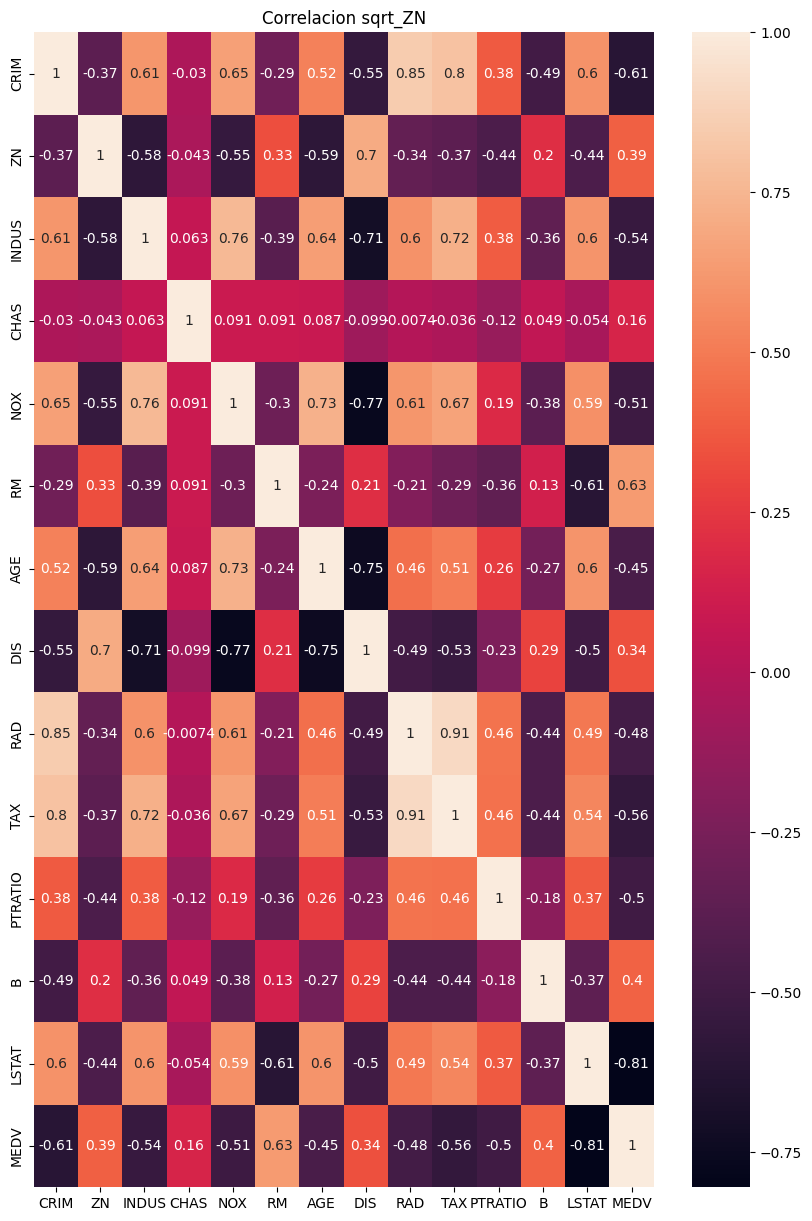

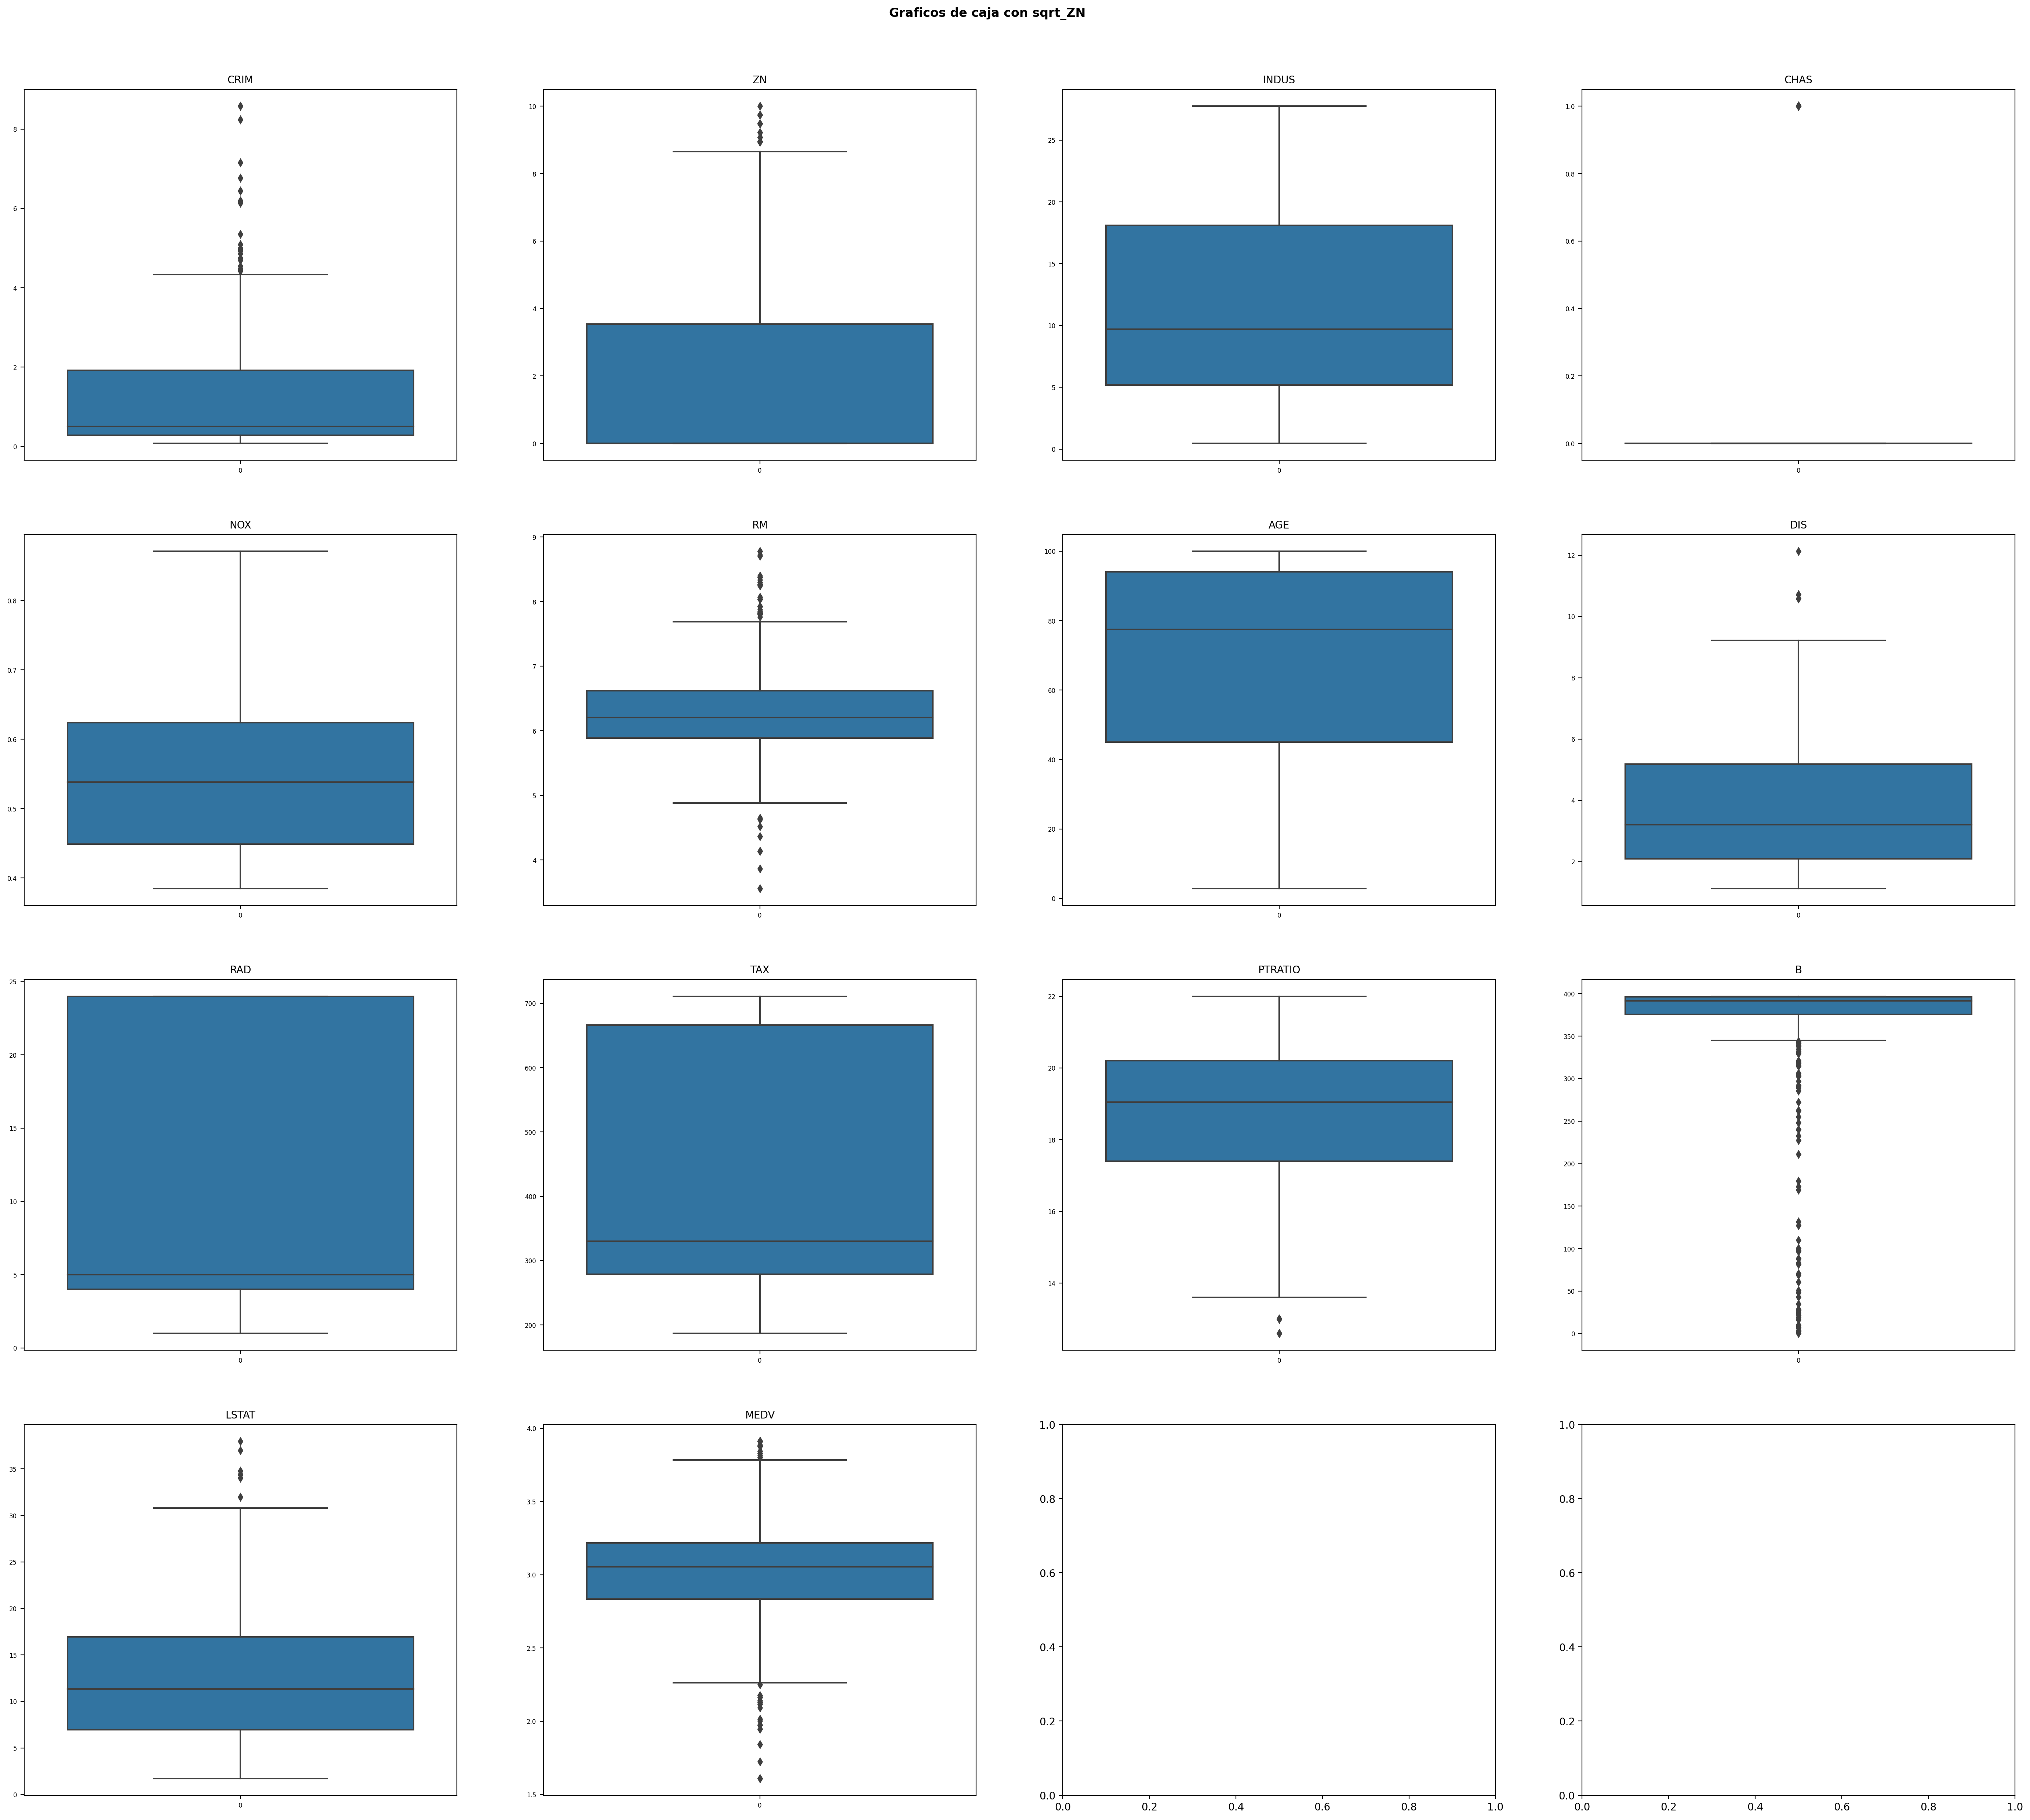

In [20]:
df['ZN'] = np.sqrt(df['ZN'])
grafic.corr_grafic(name='sqrt_ZN')
grafic.box_num(4,4,name='sqrt_ZN')

<h2>INDUS</h2>

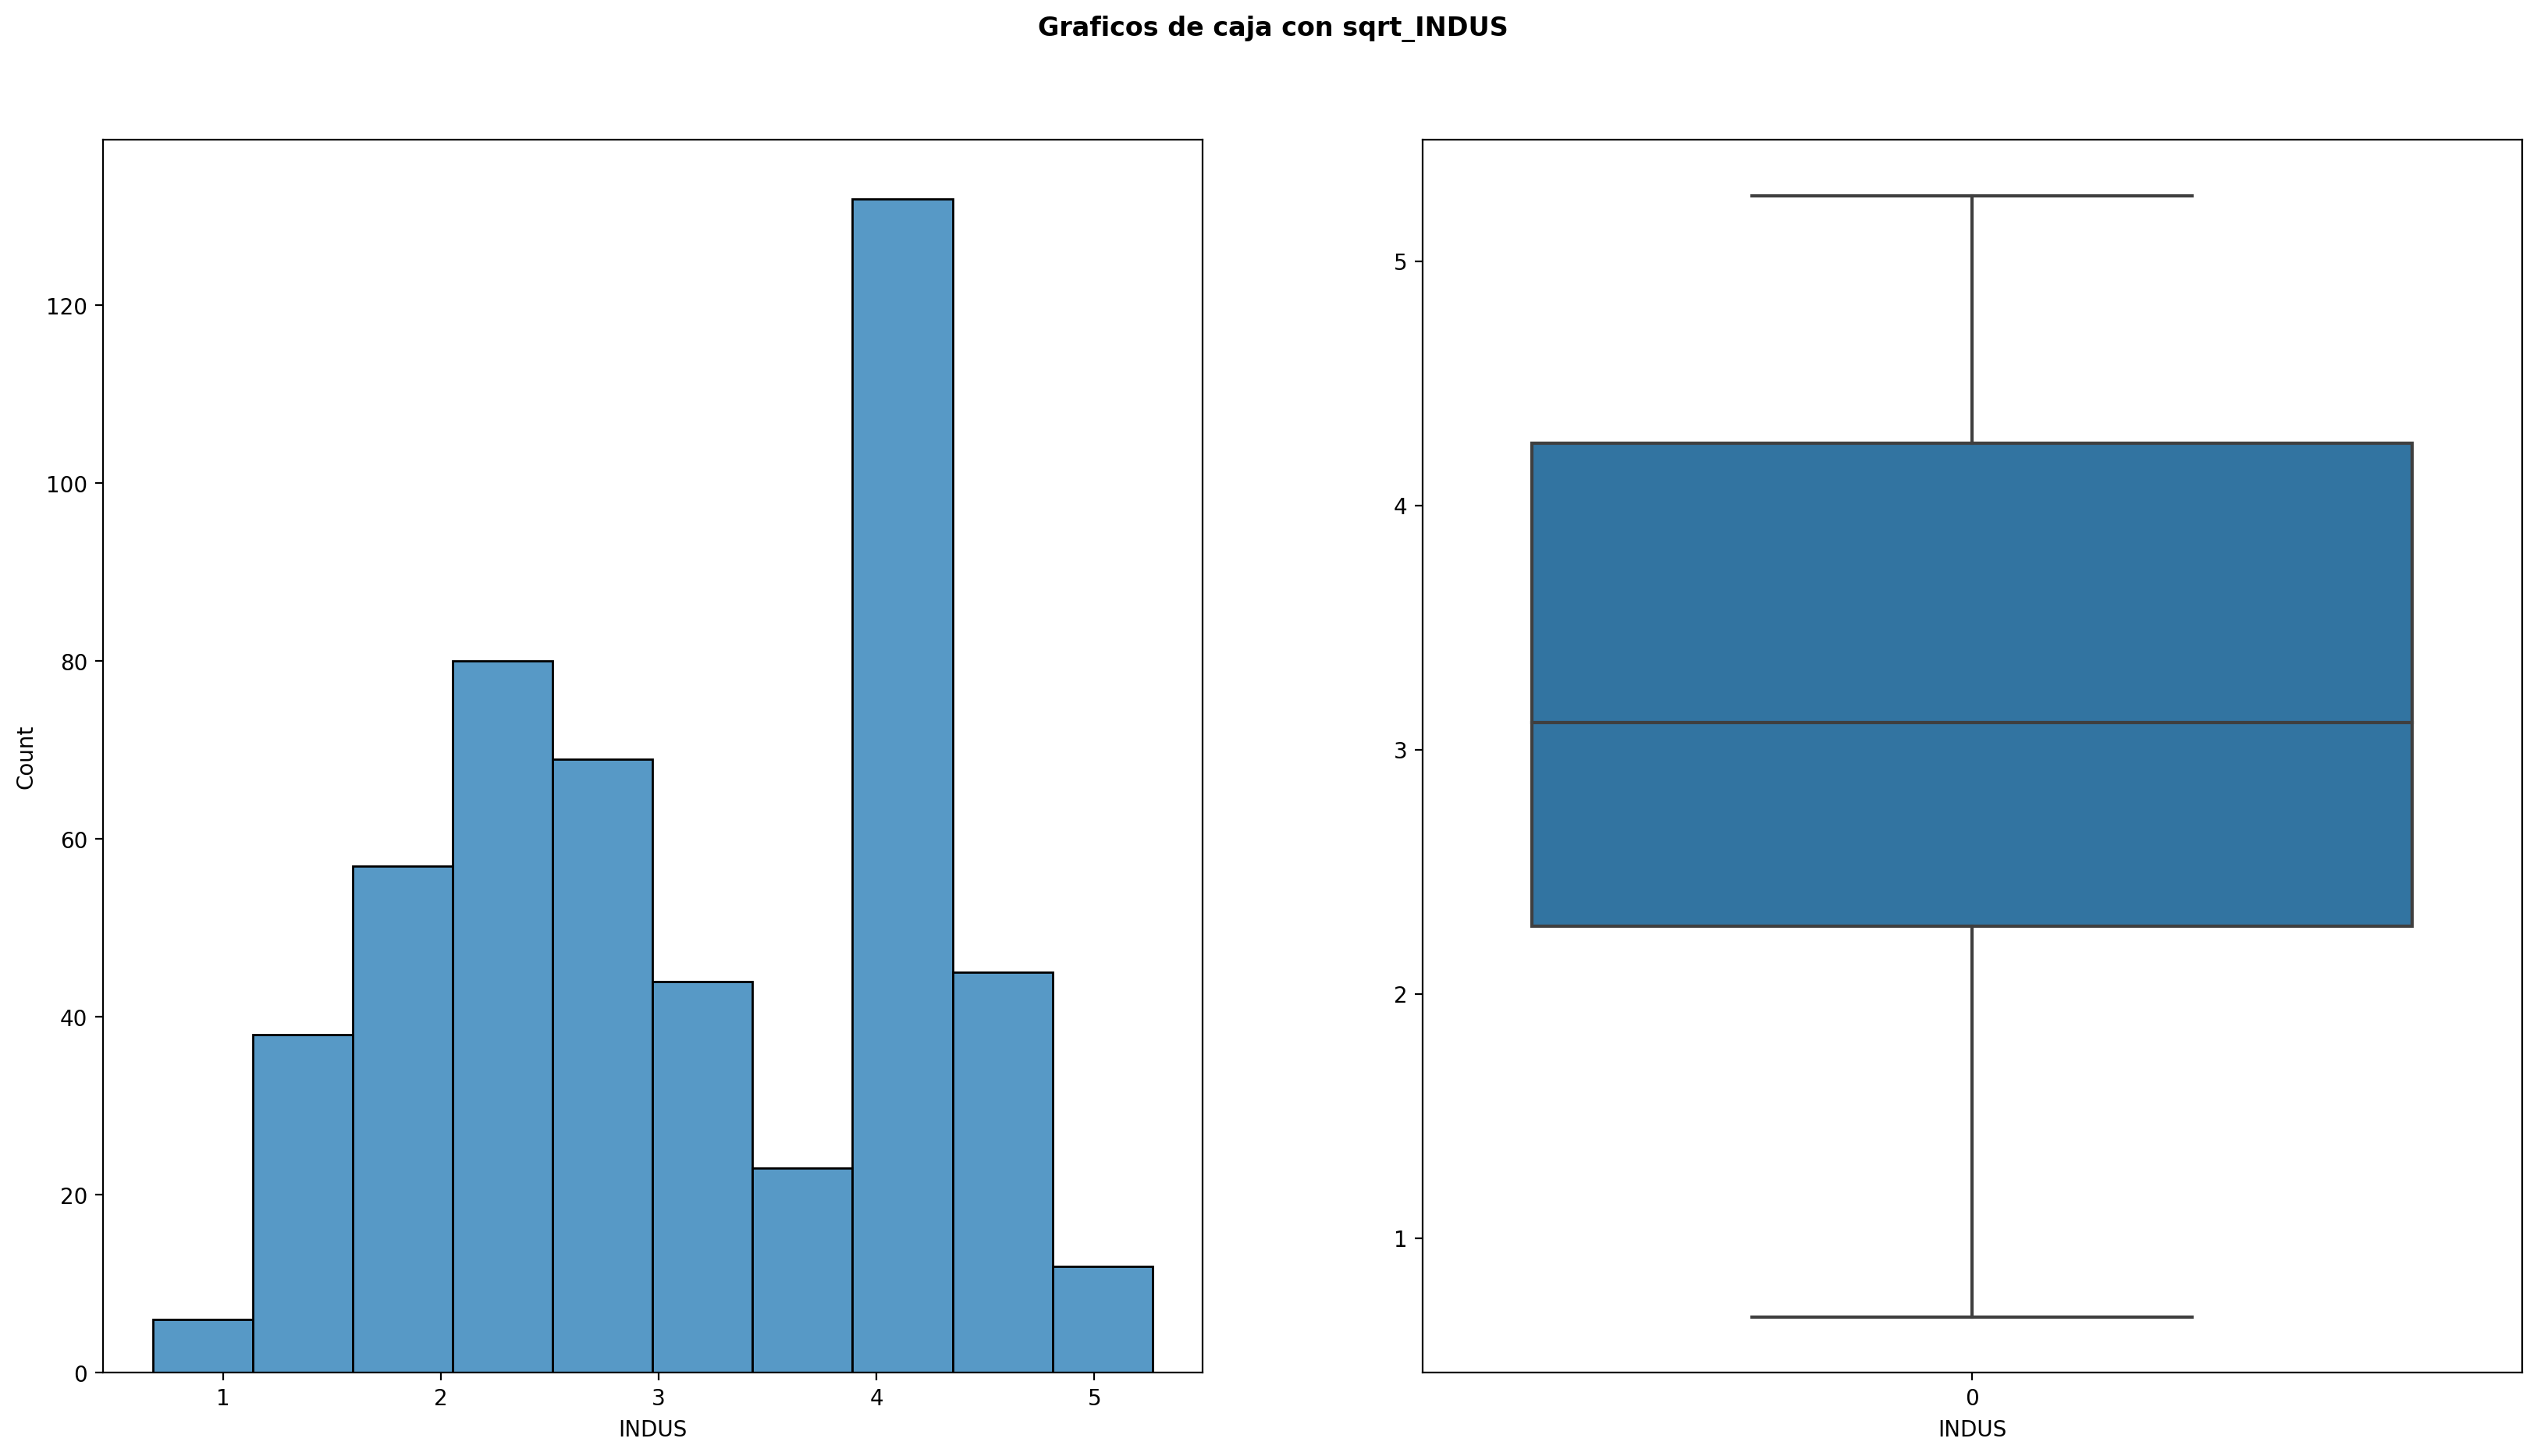

In [21]:
grafic.grafic_analist(variable='INDUS', distribution='sqrt')

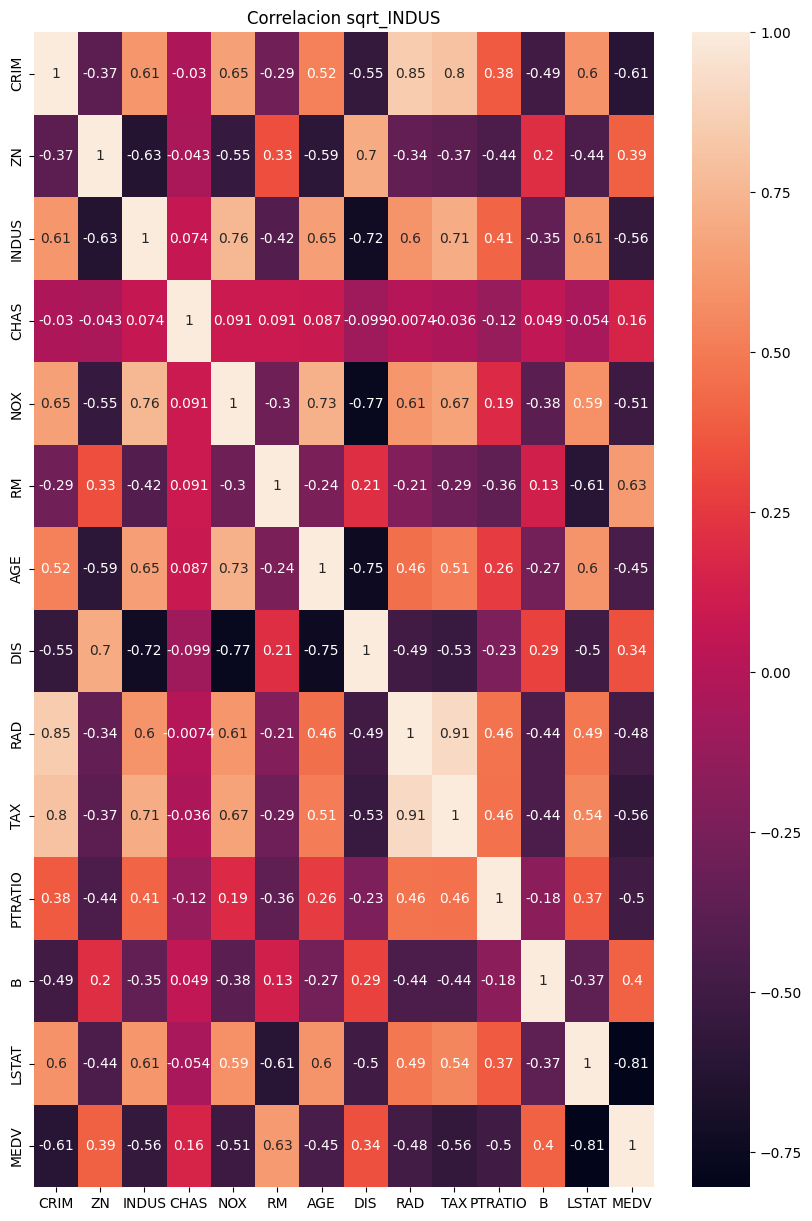

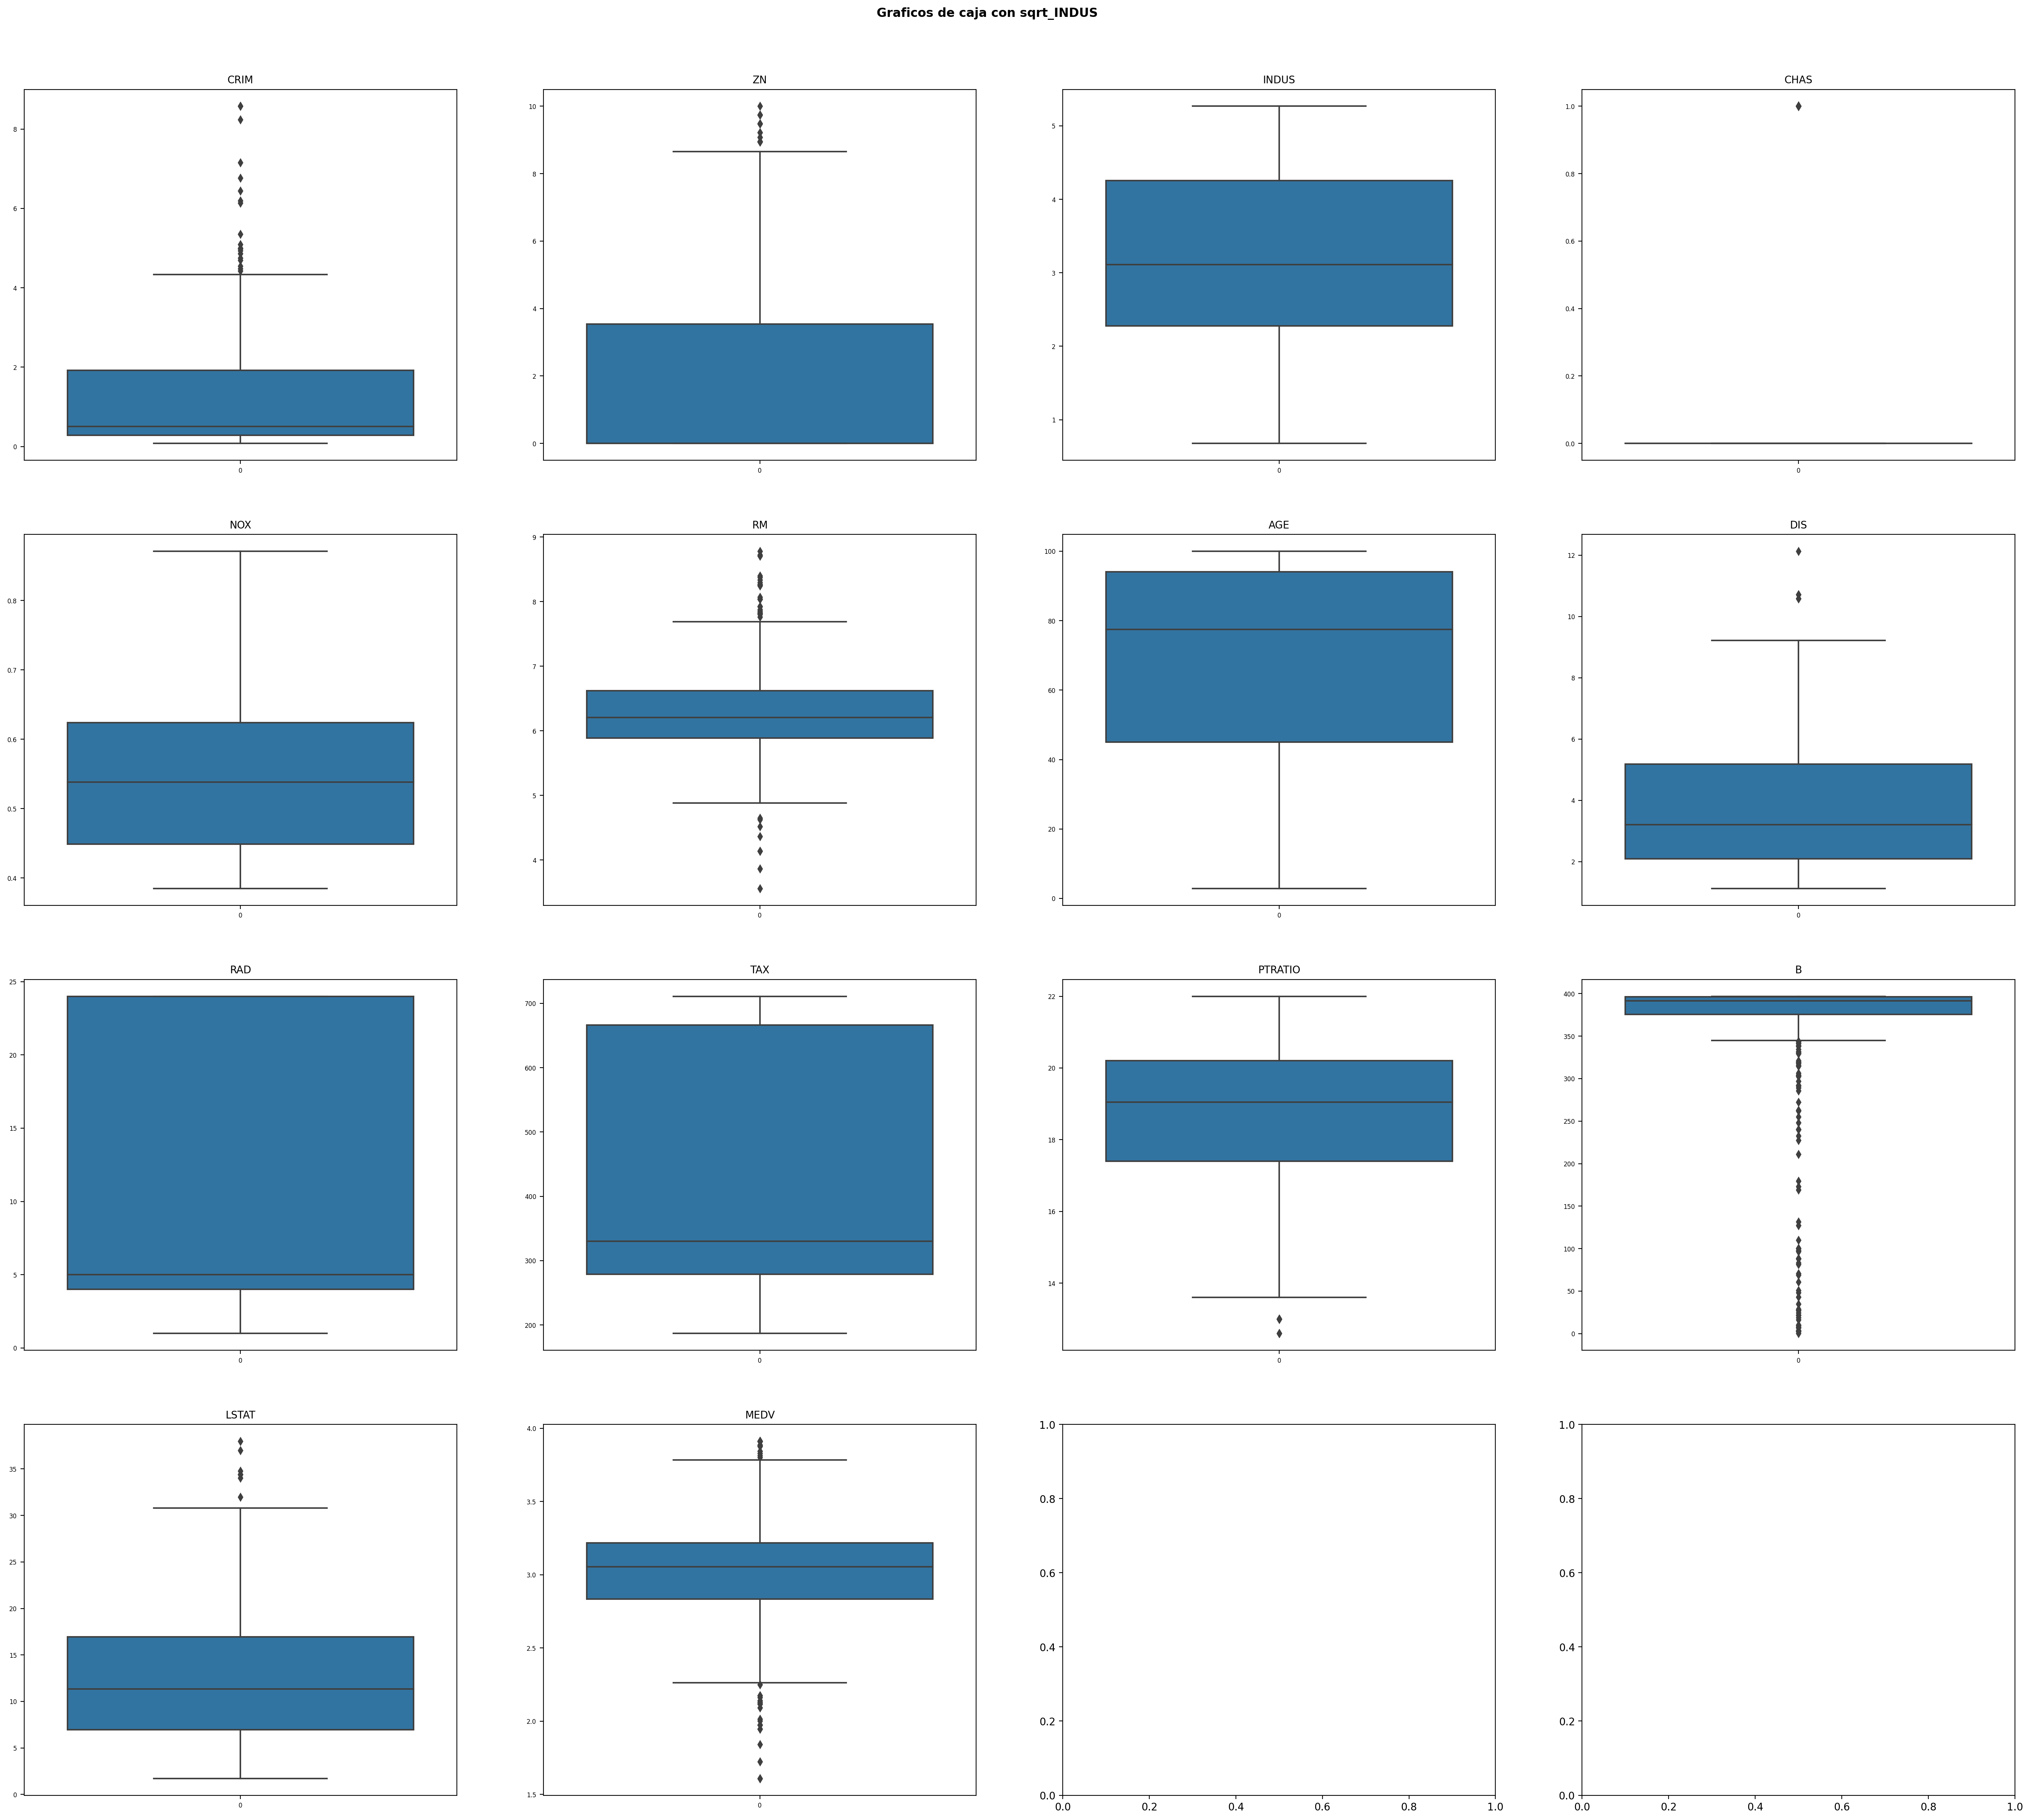

In [22]:
df['INDUS'] = np.sqrt(df['INDUS'])
grafic.corr_grafic(name='sqrt_INDUS')
grafic.box_num(4,4,name='sqrt_INDUS')

<h2>CHAS</h2>

In [23]:
# Sin cambios

<h2>NOX</h2>

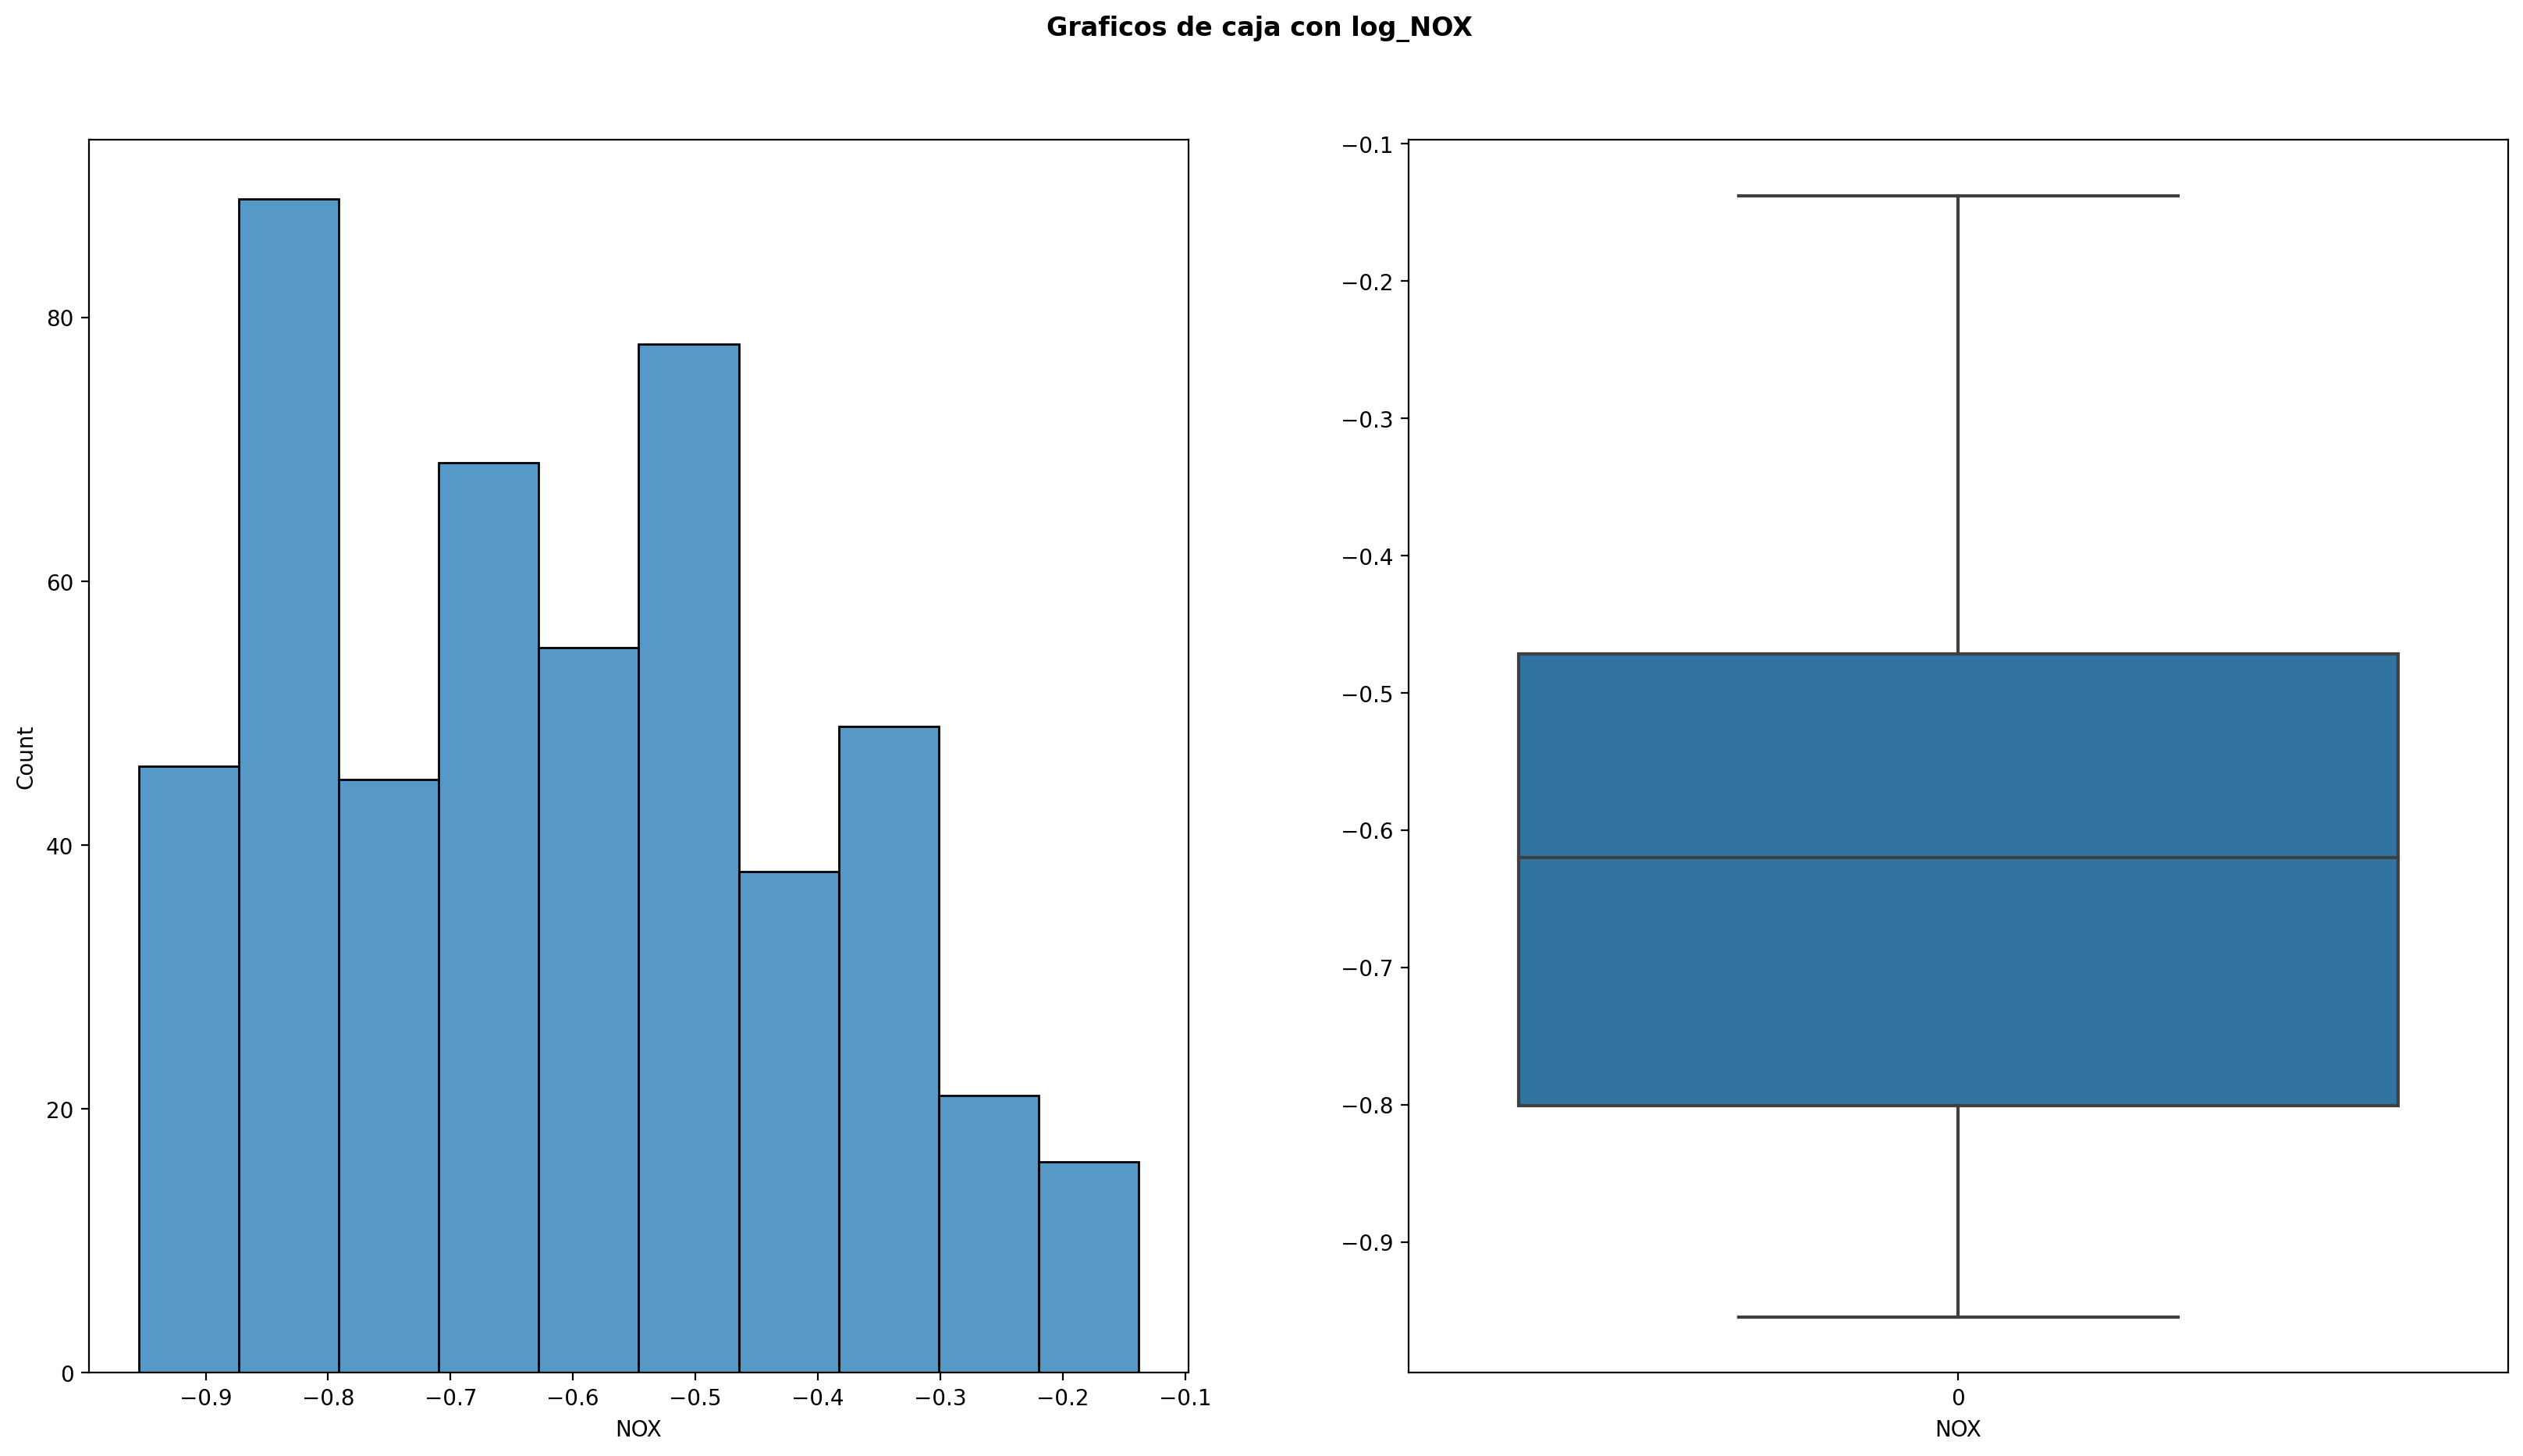

In [24]:
grafic.grafic_analist(variable='NOX', distribution='log')

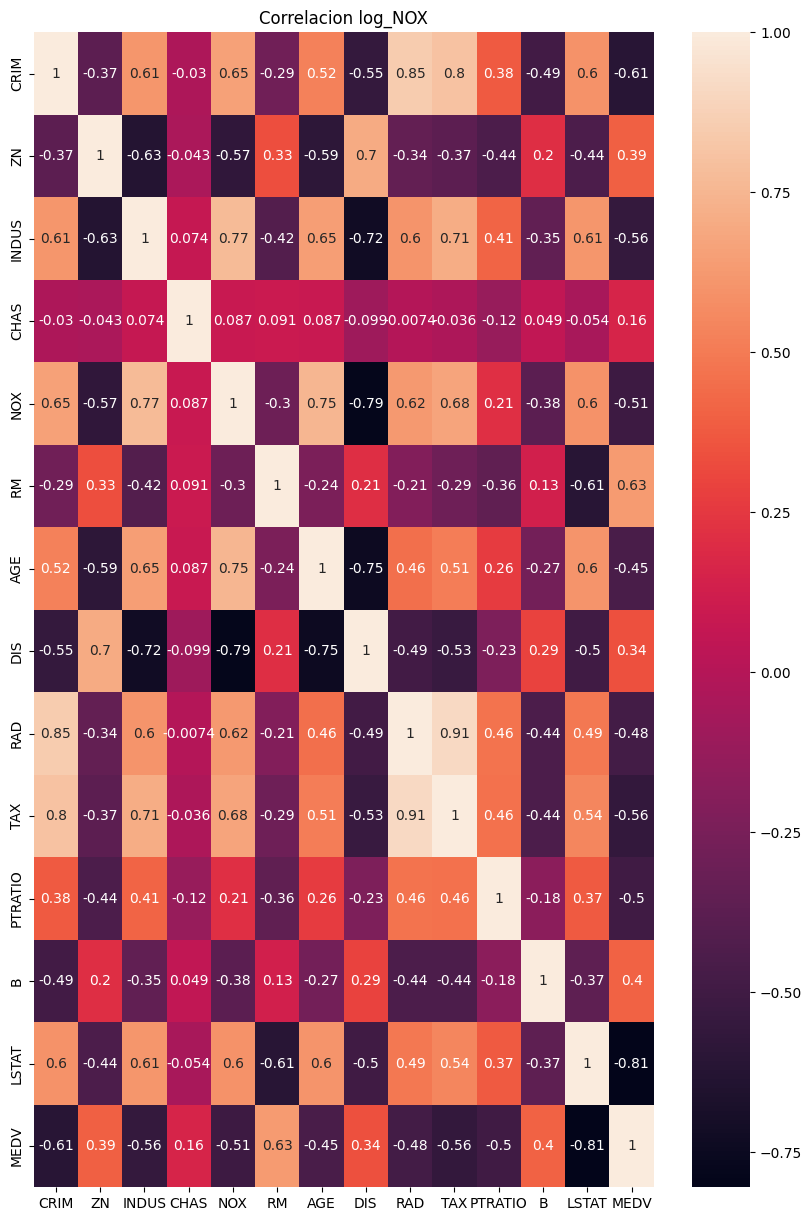

In [25]:
df_copy = df.copy()
df_copy['NOX'] = np.sqrt(df_copy['NOX'])
graf(df_copy).corr_grafic(name='log_NOX')

Al observar el aumento de correlación con las otras varibles, decido no convertirlo

<h2>RM</h2>

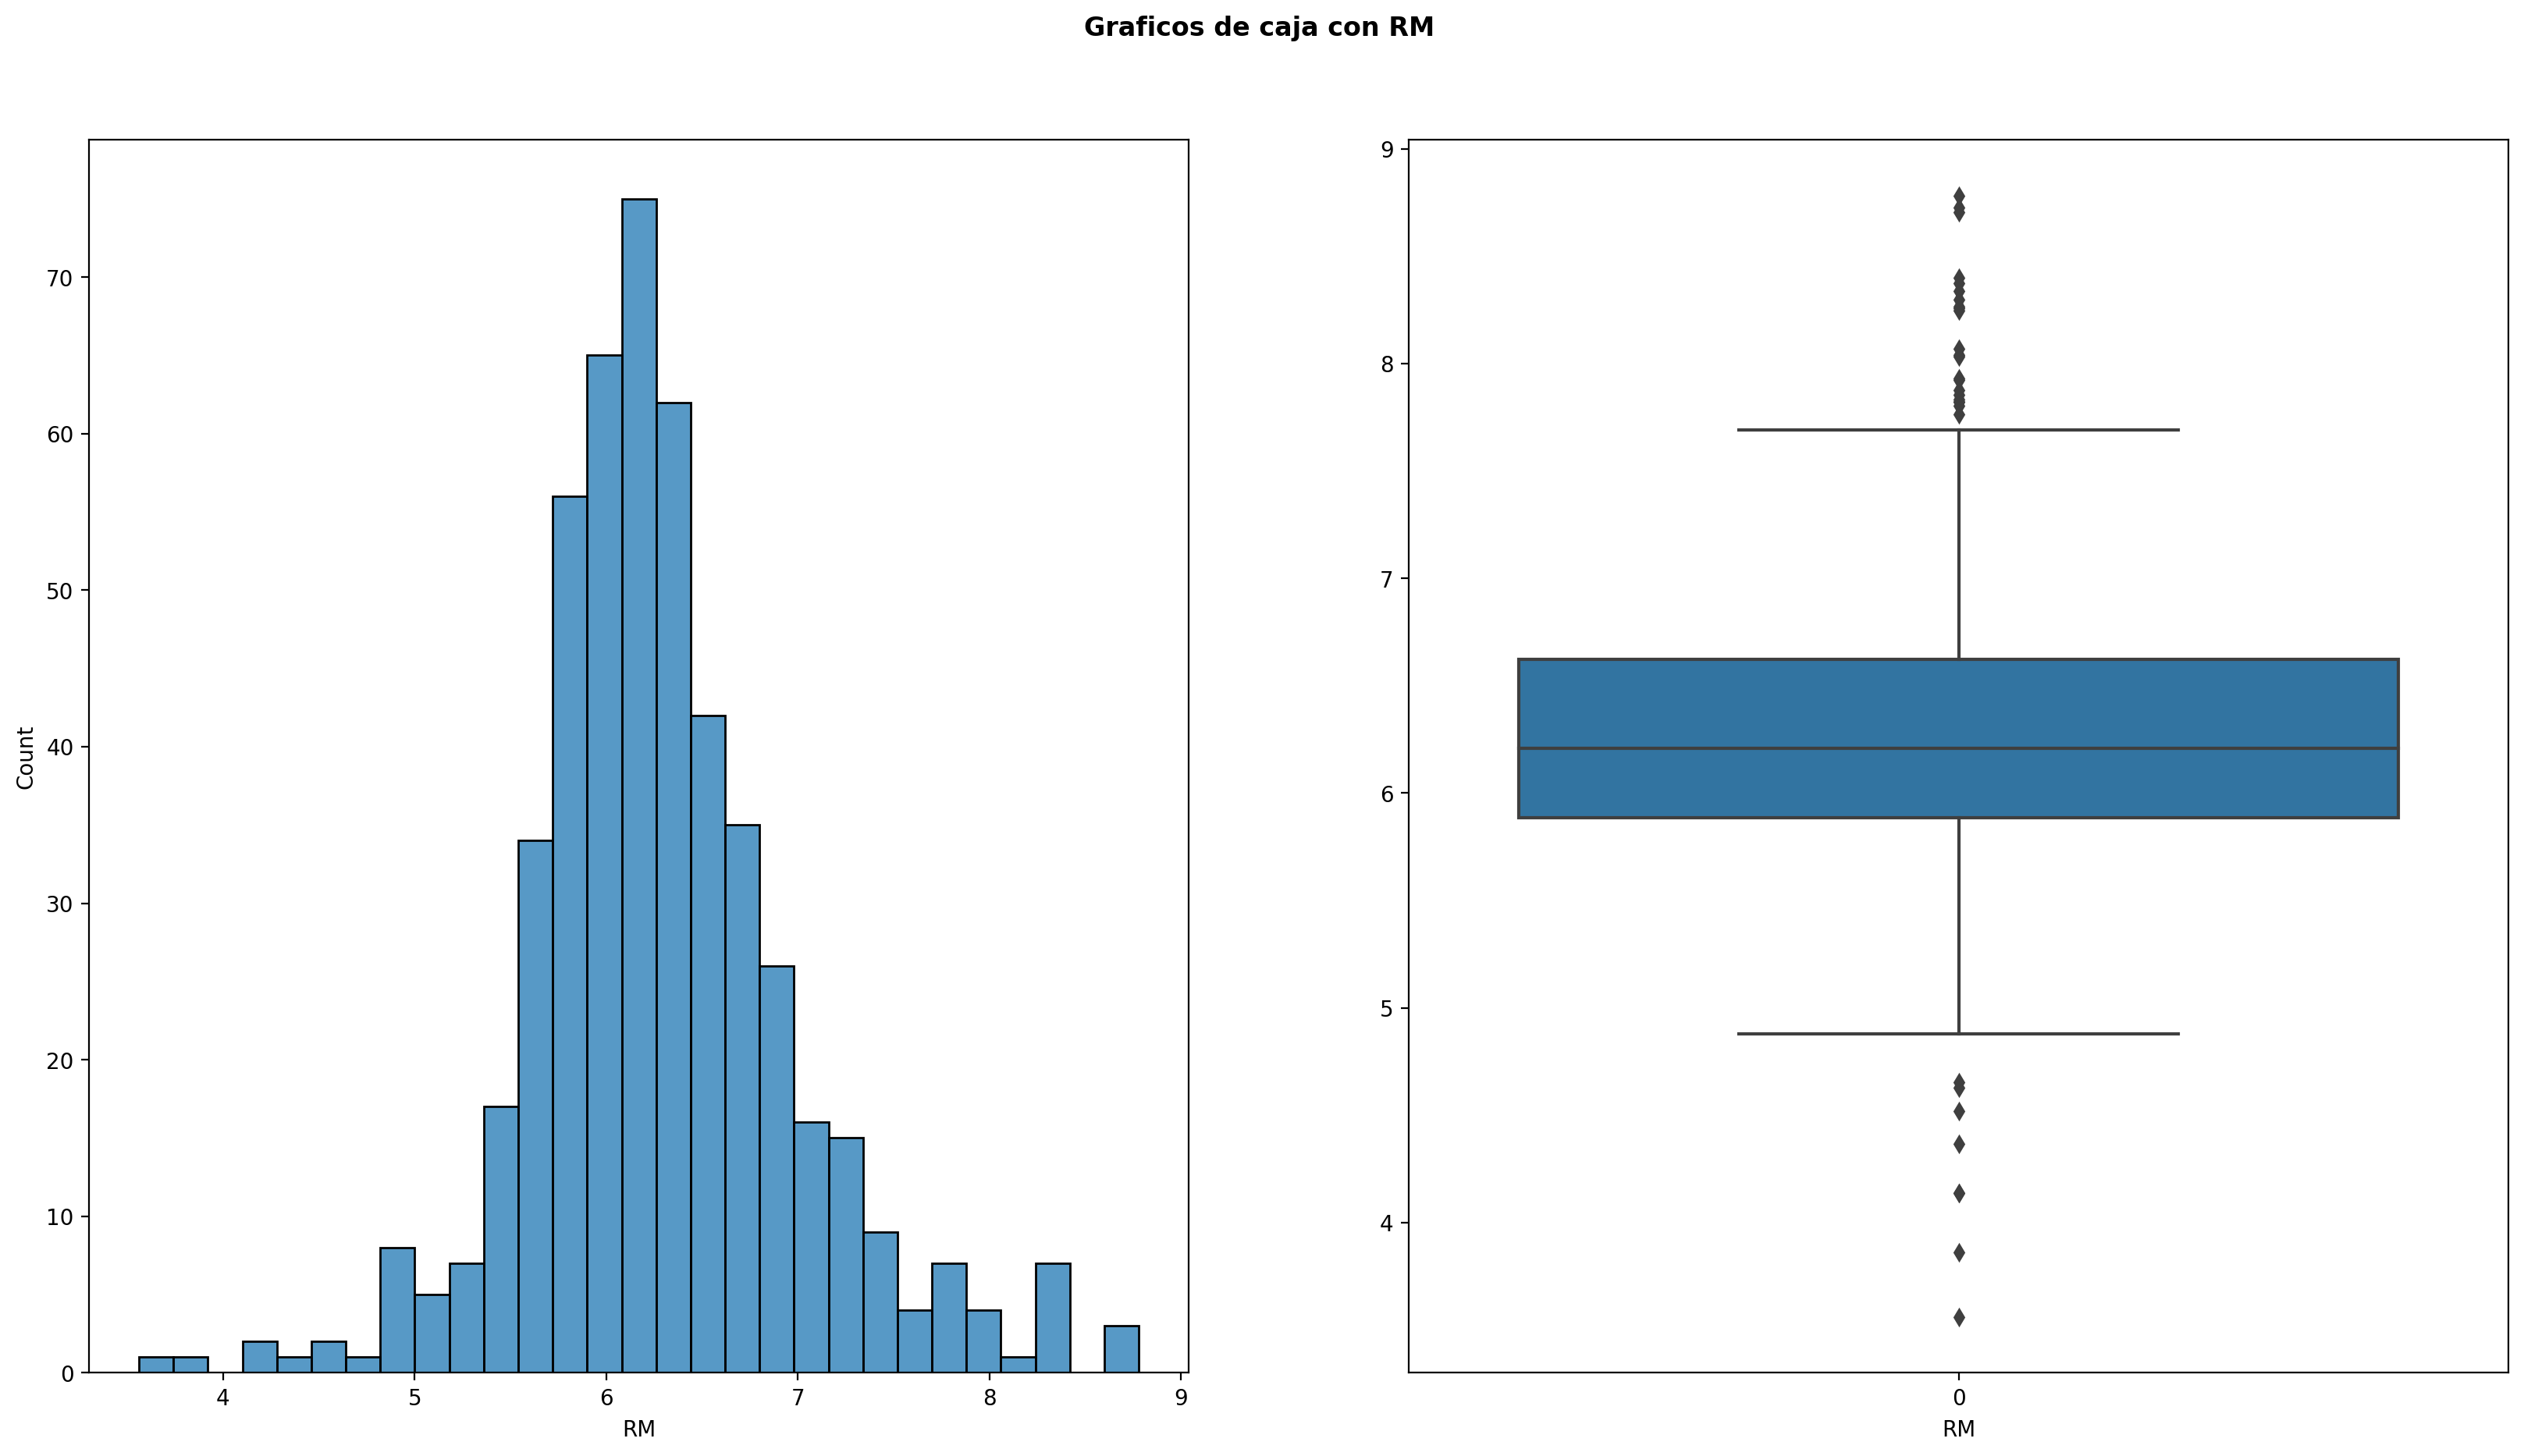

In [26]:
grafic.grafic_analist(variable='RM')

Al observar el aumento de correlación con las otras varibles, decido no convertirlo

<h2>AGE</h2>

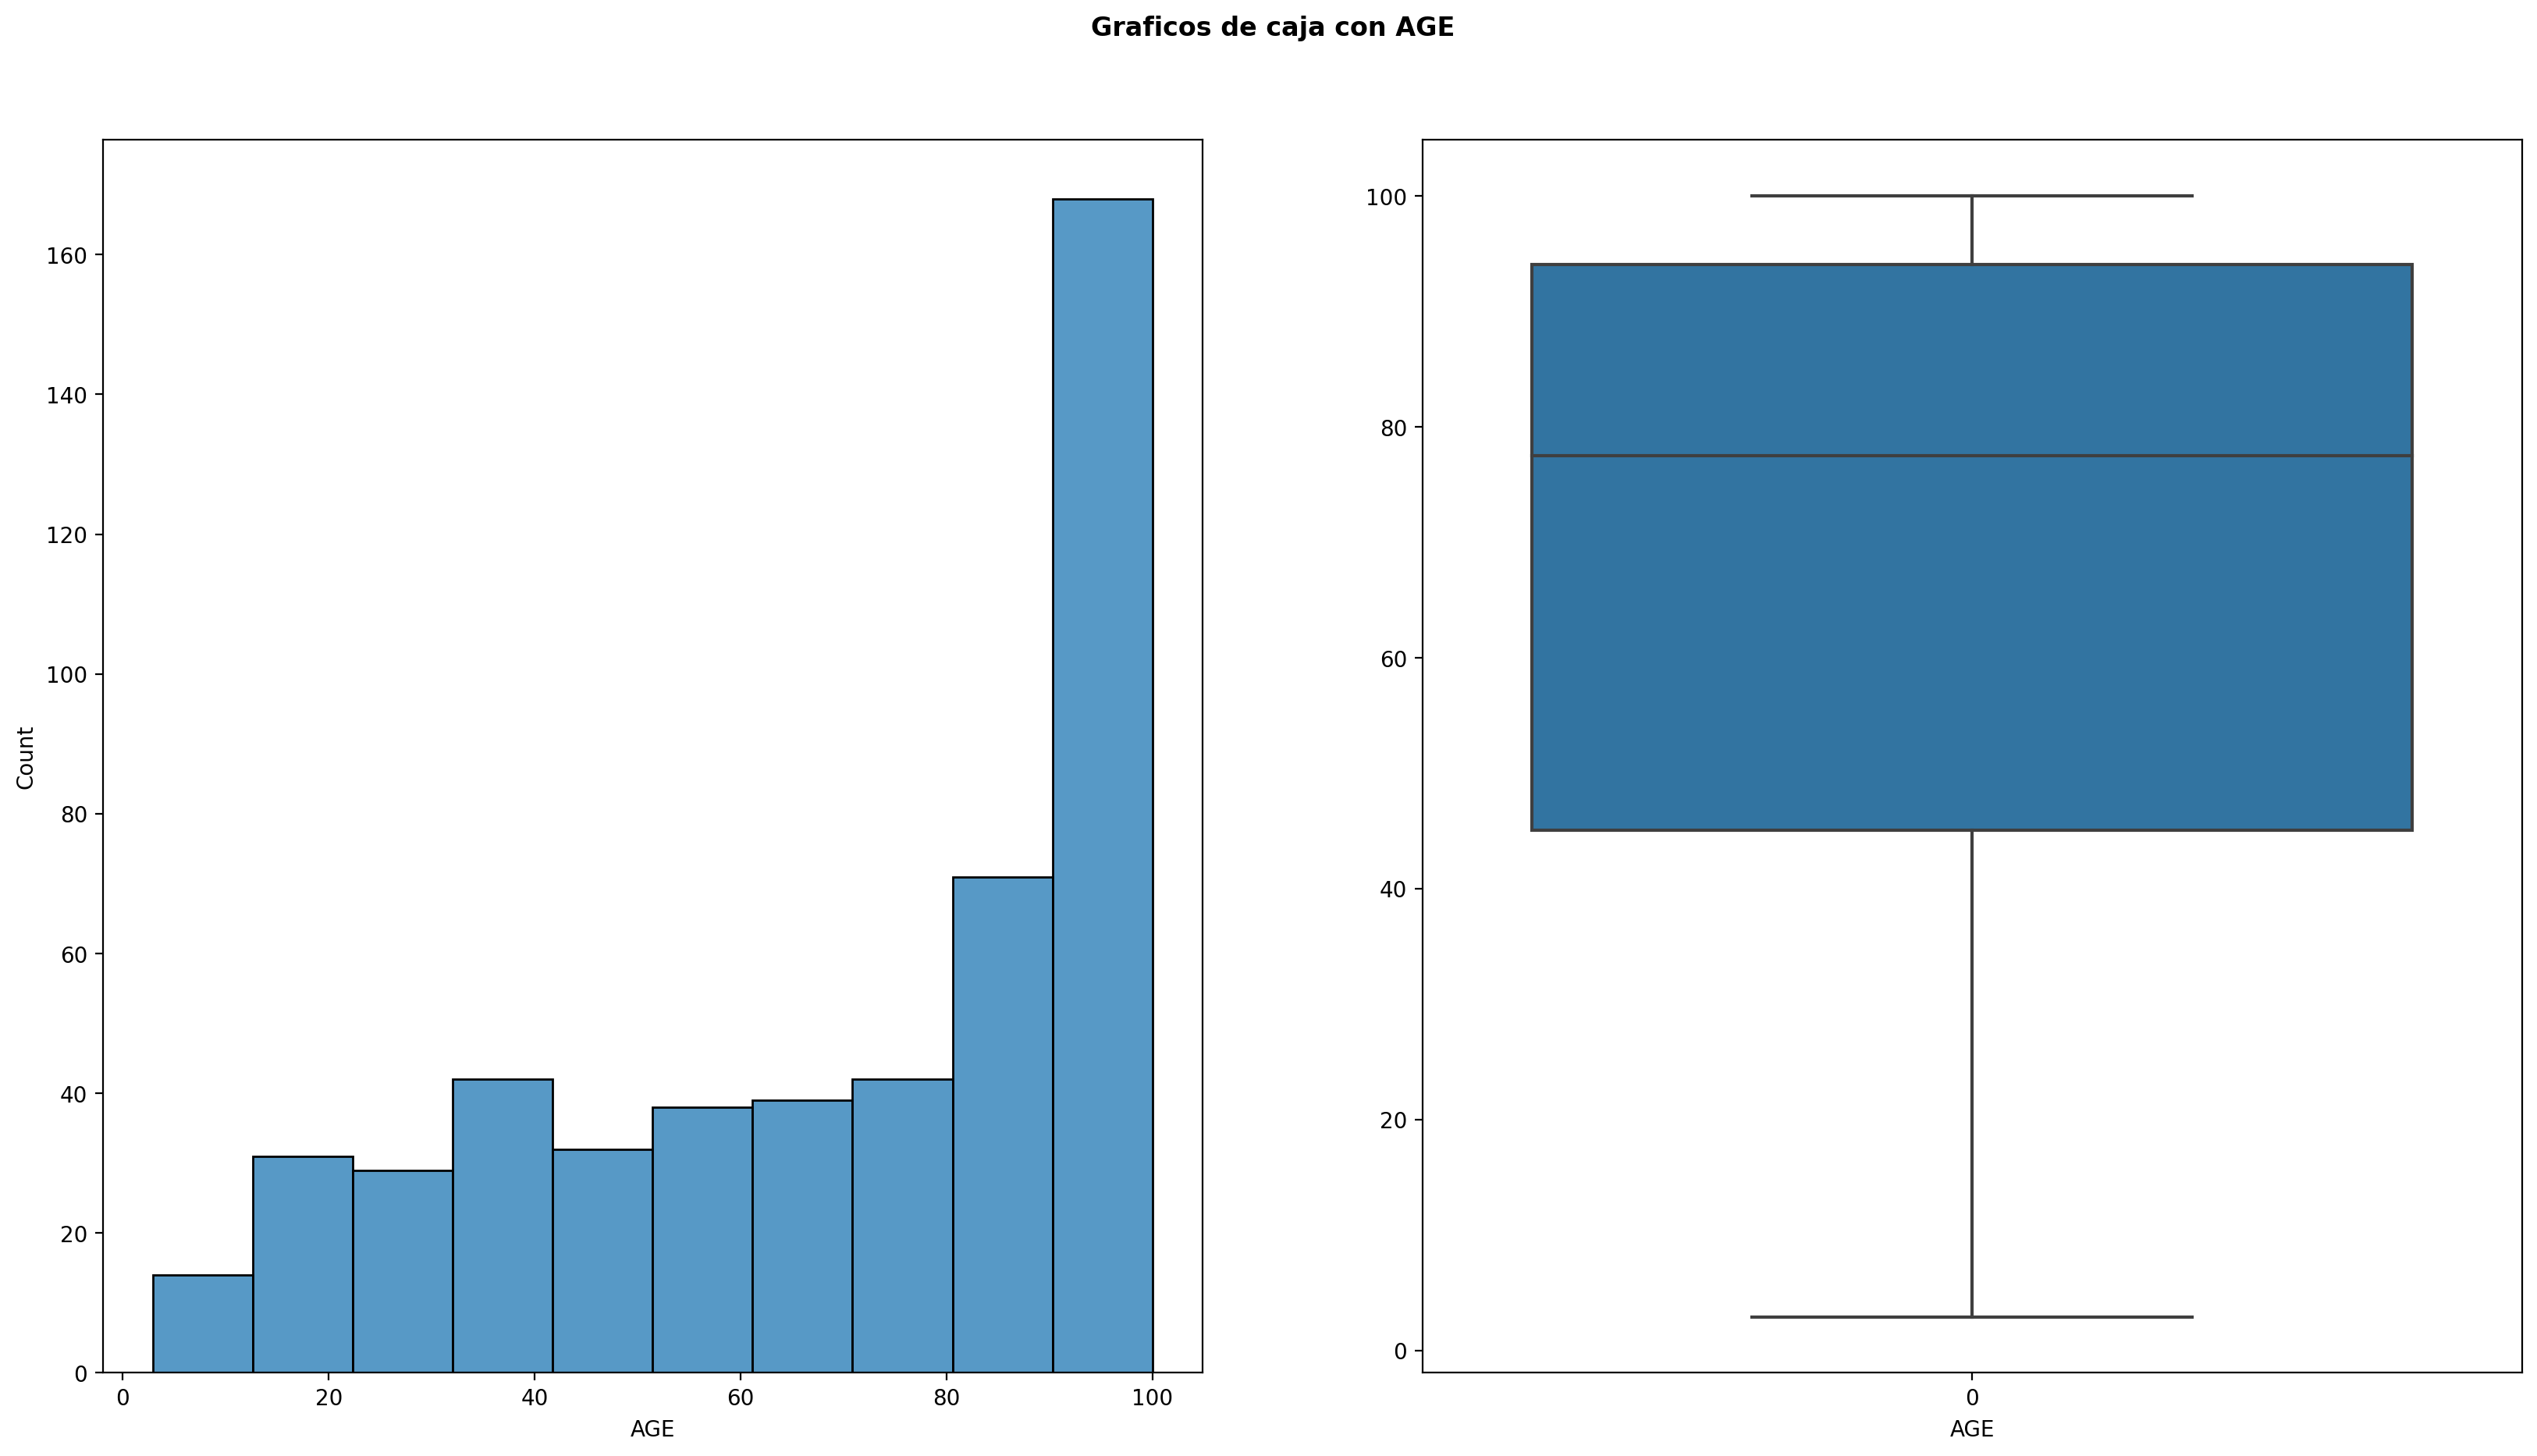

In [27]:
grafic.grafic_analist(variable='AGE', distribution='normal')

<h2>DIS</h2>

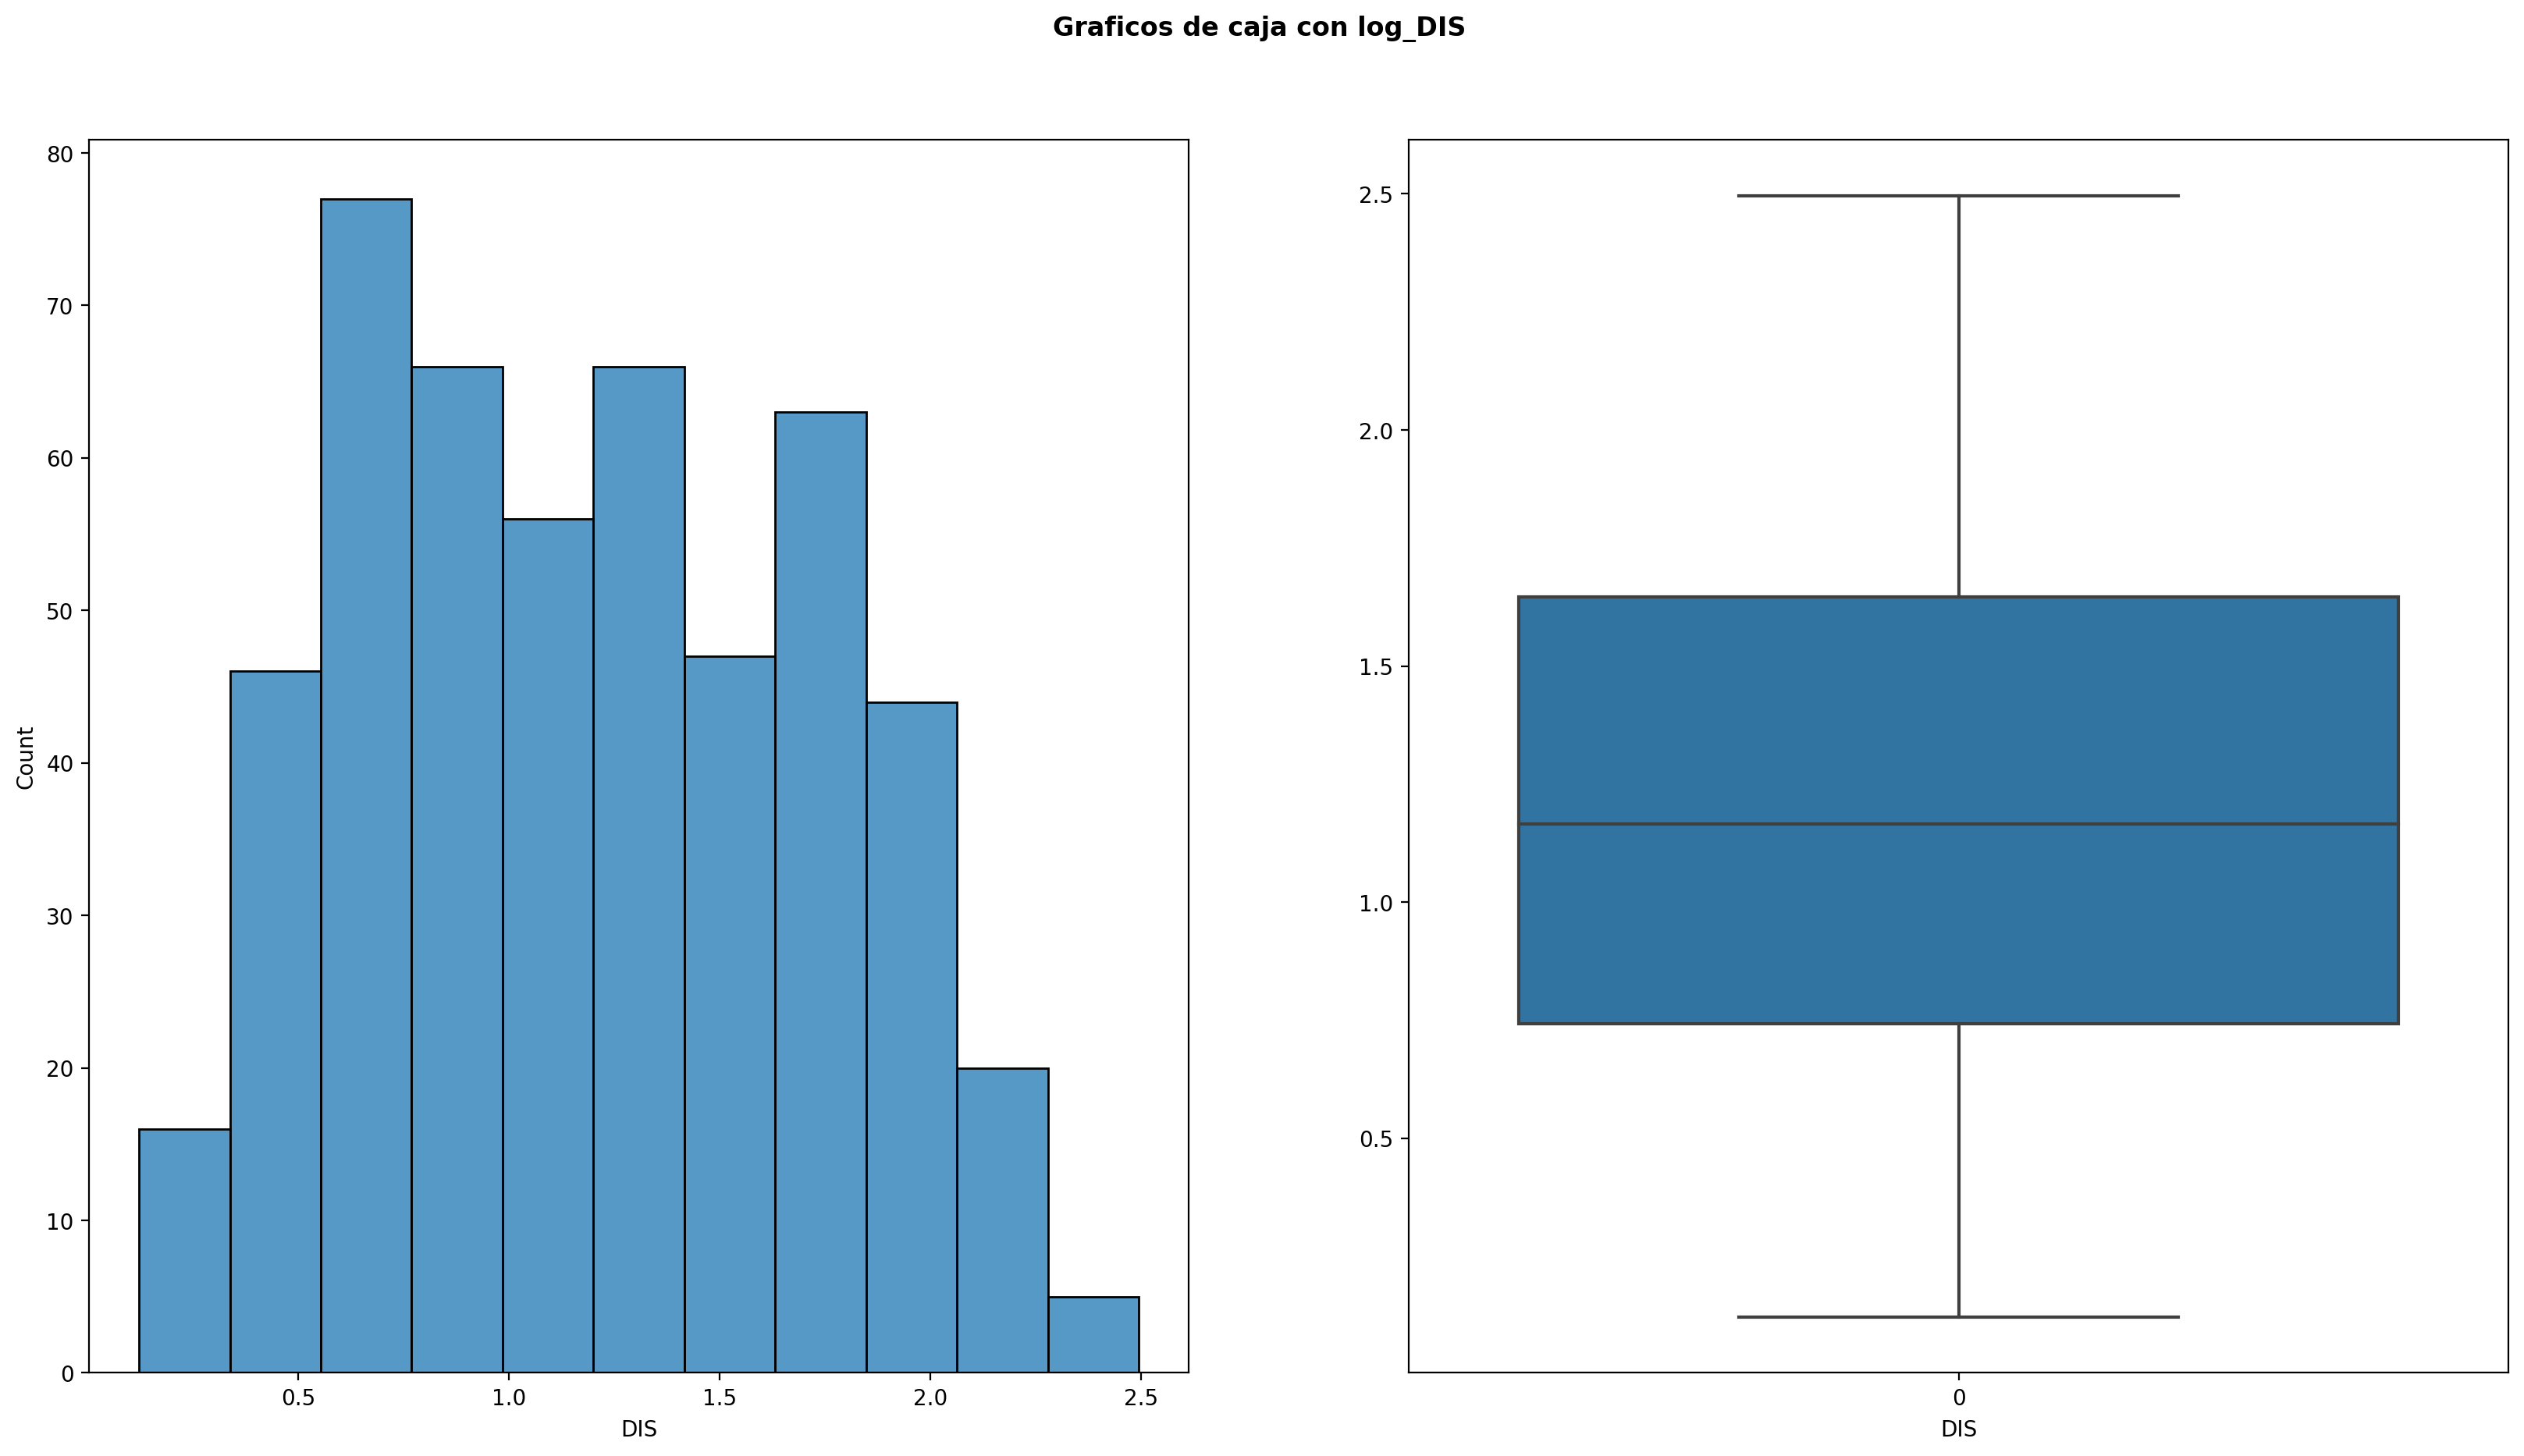

In [28]:
graf(df).grafic_analist(variable='DIS', distribution='log')

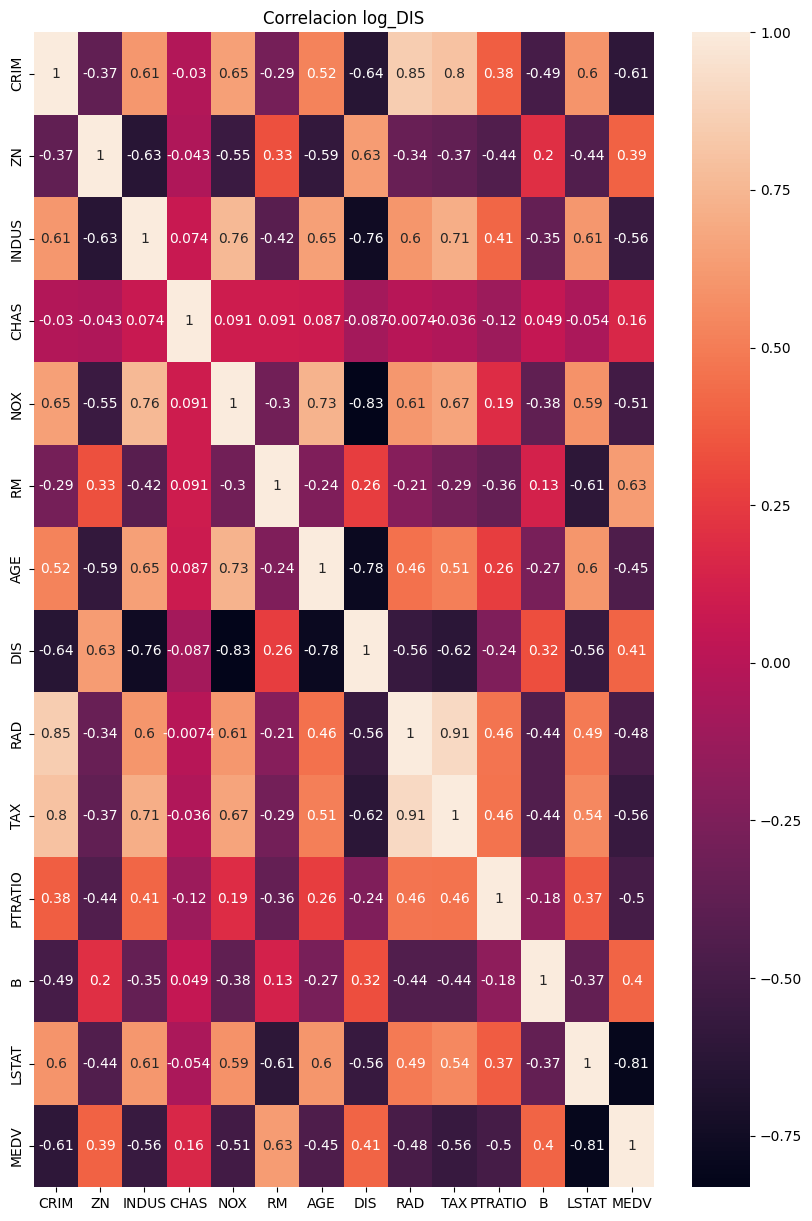

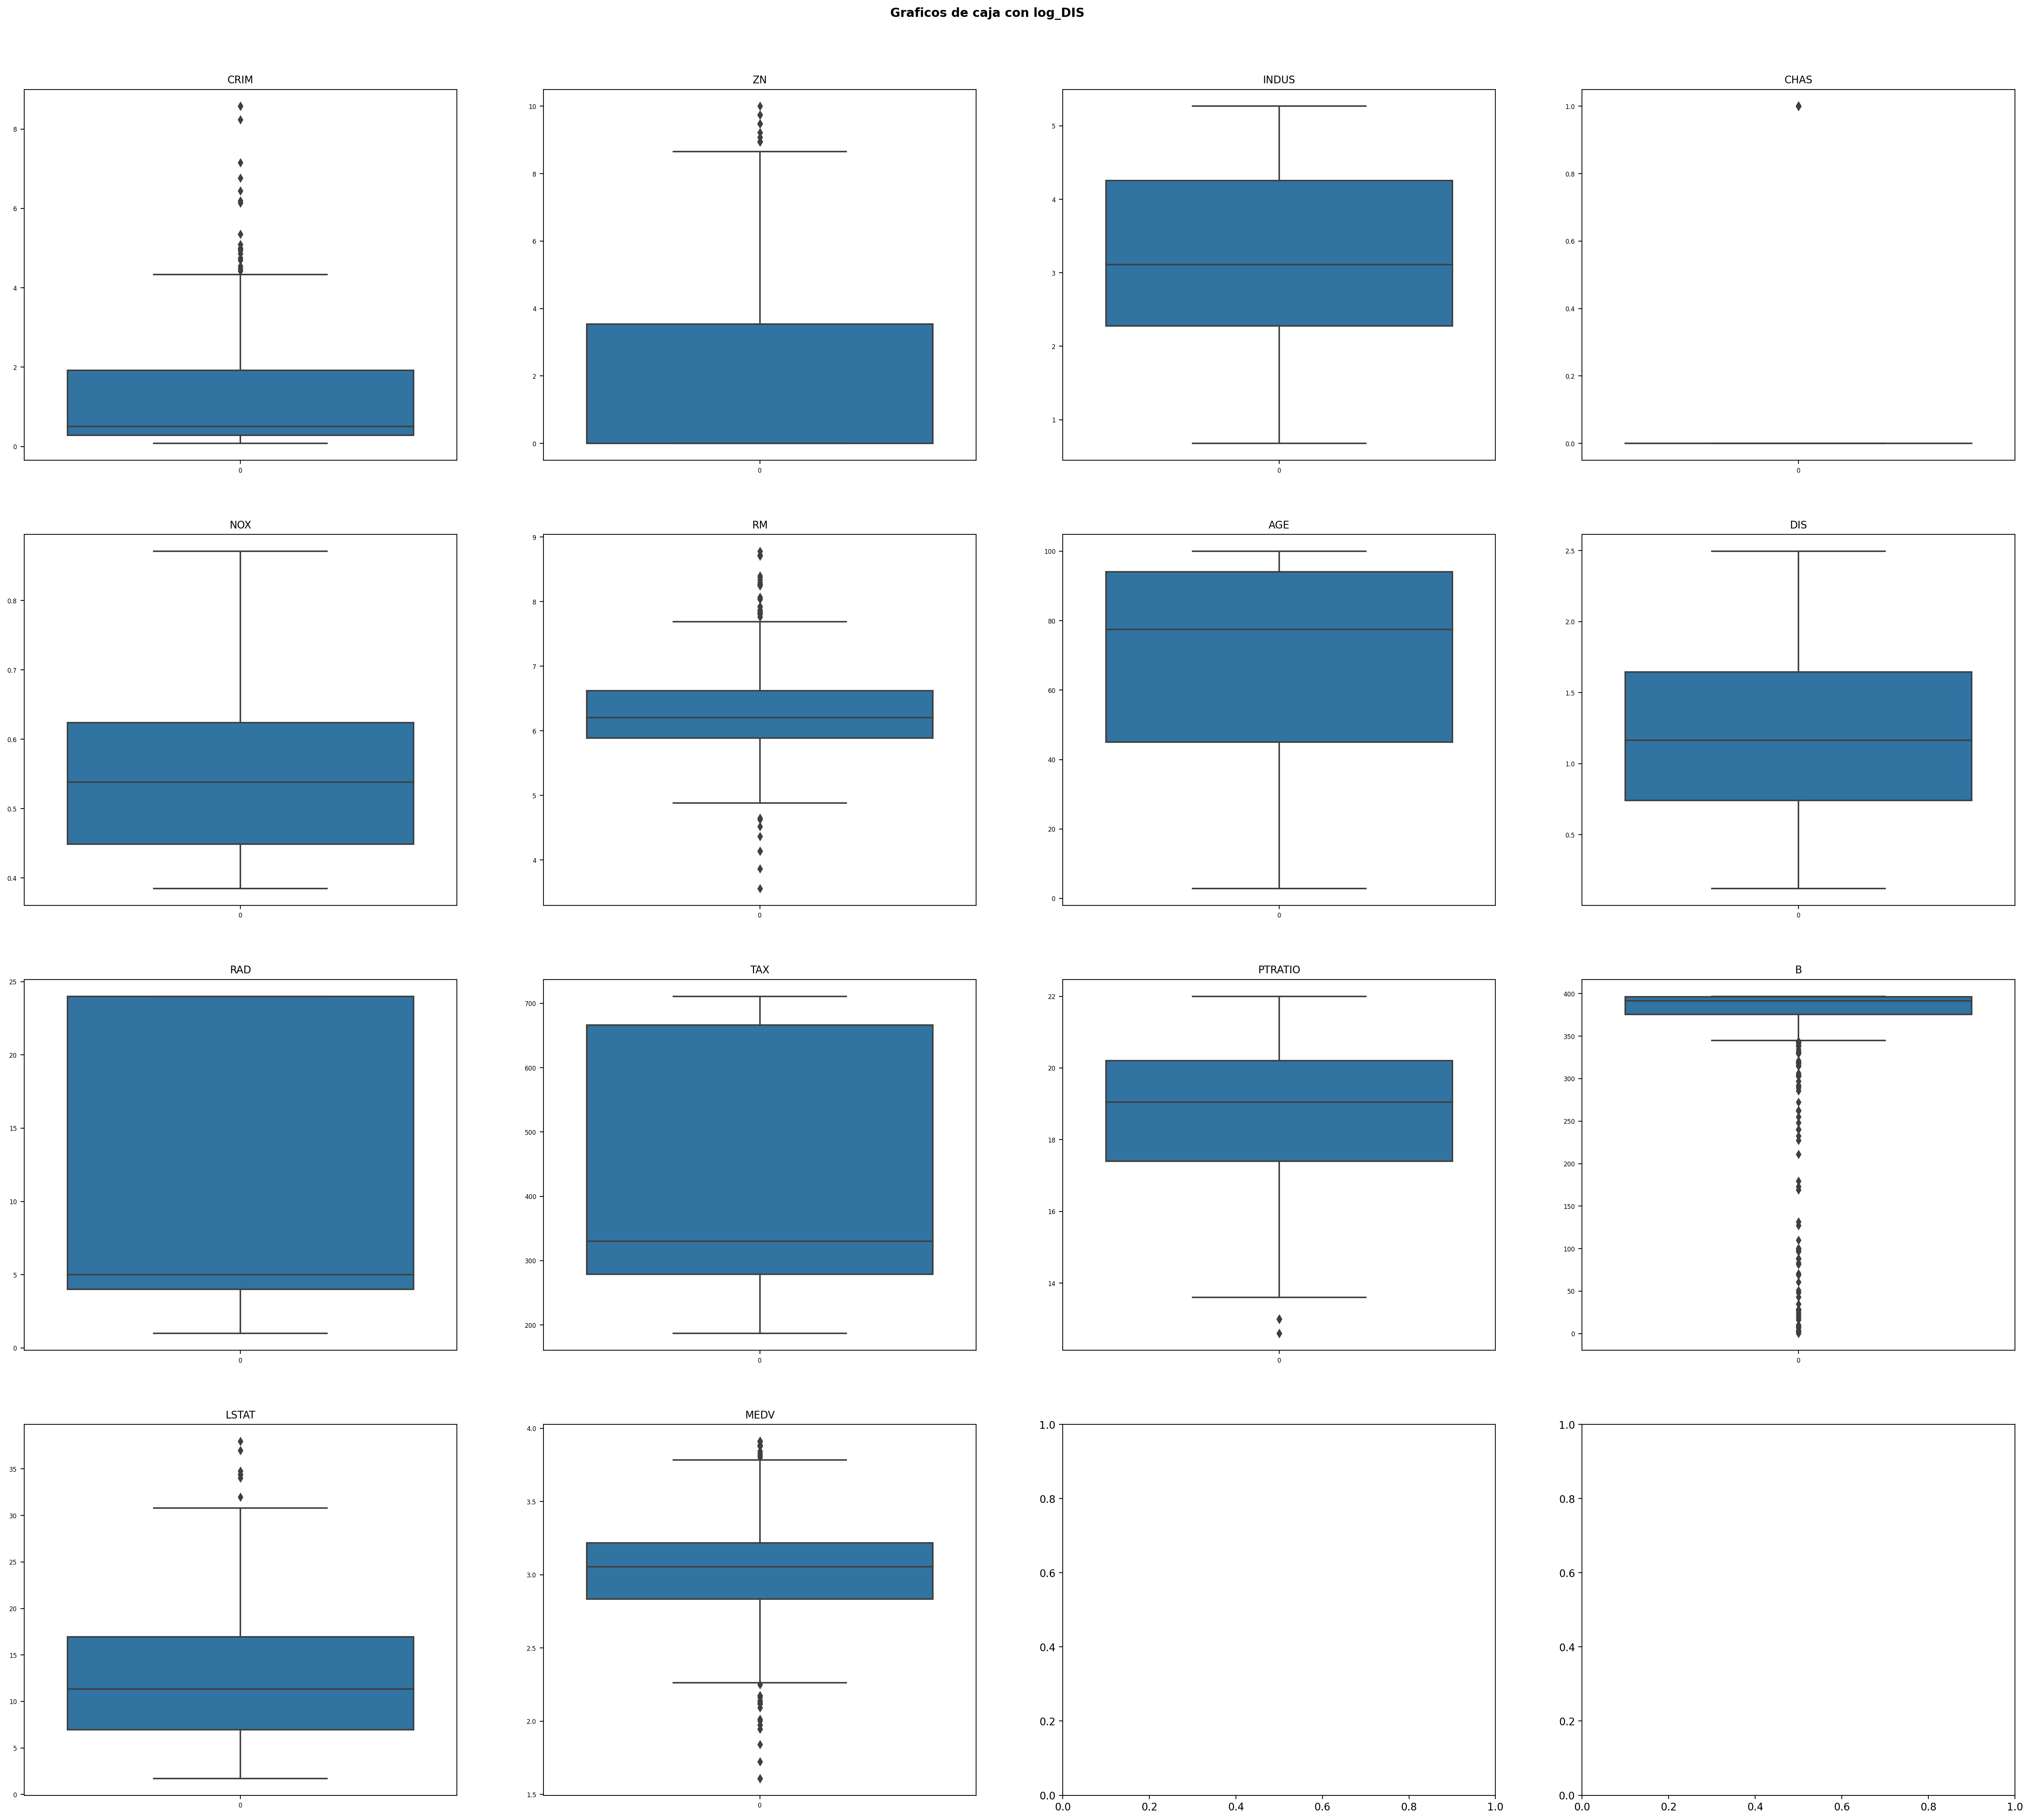

In [29]:
df['DIS'] = np.log(df['DIS'])
grafic.corr_grafic(name='log_DIS')
grafic.box_num(4,4,name='log_DIS')

<h2>RAD</h2>

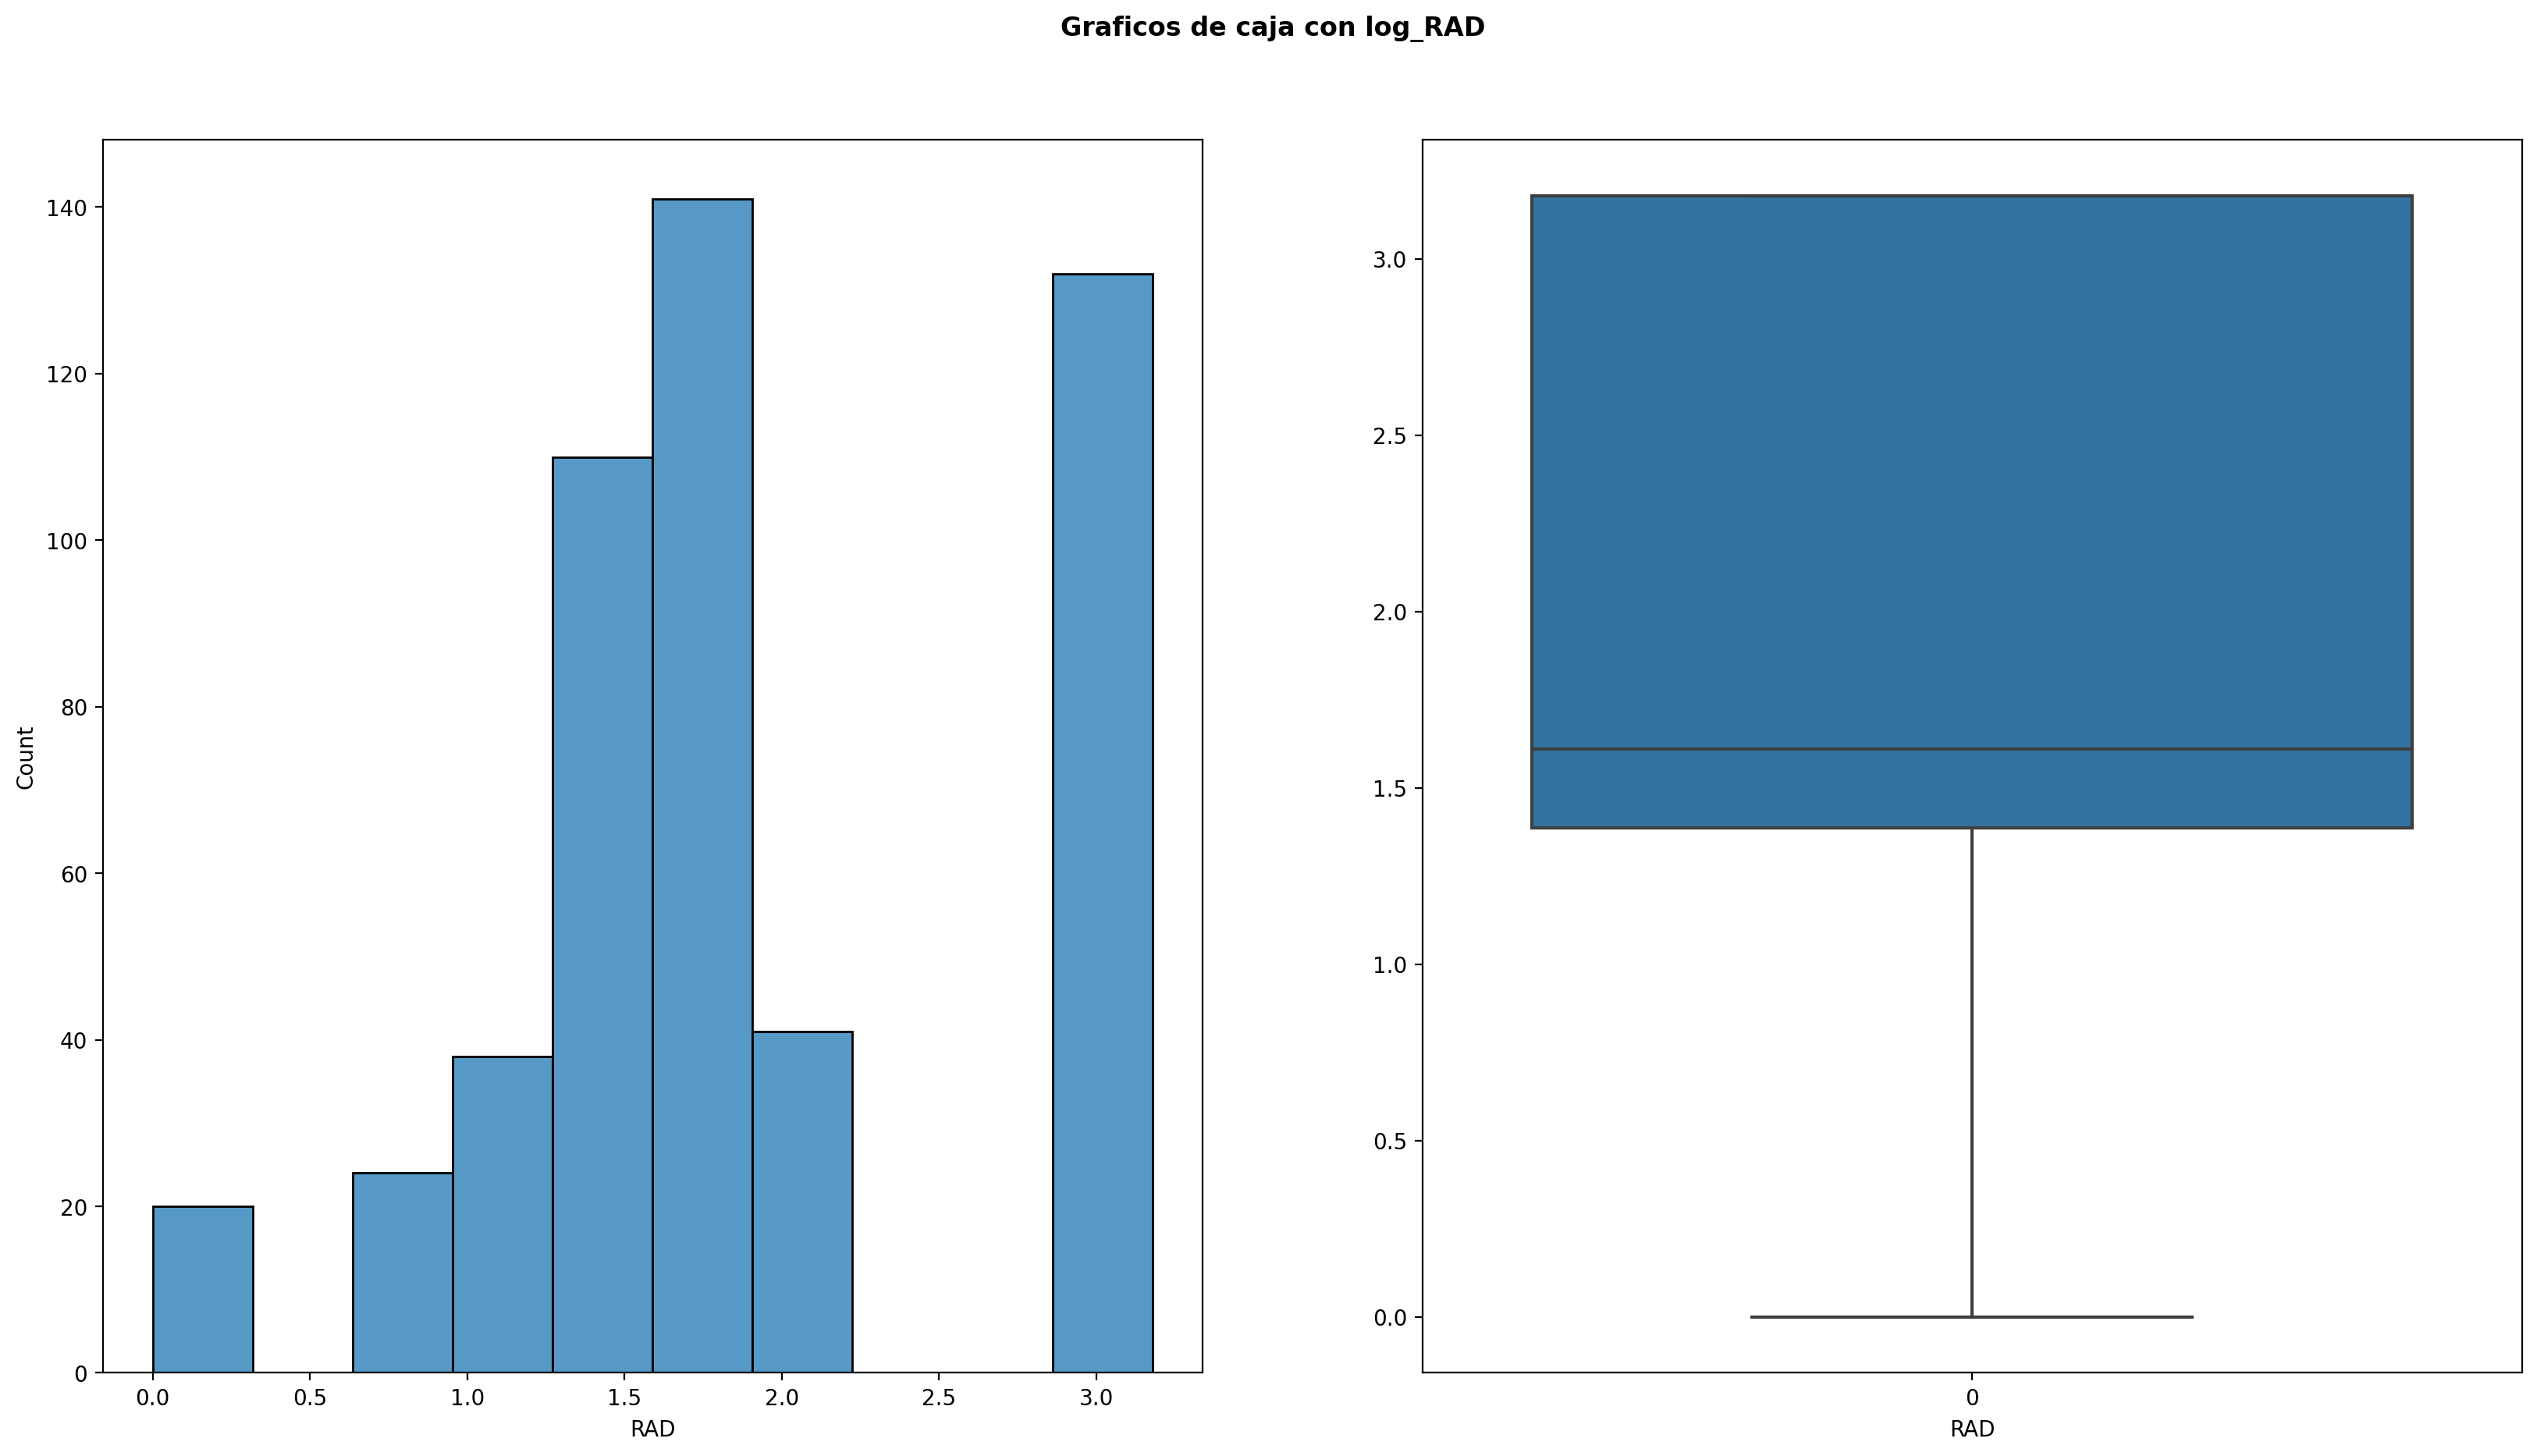

In [30]:
grafic.grafic_analist(variable='RAD', distribution='log')

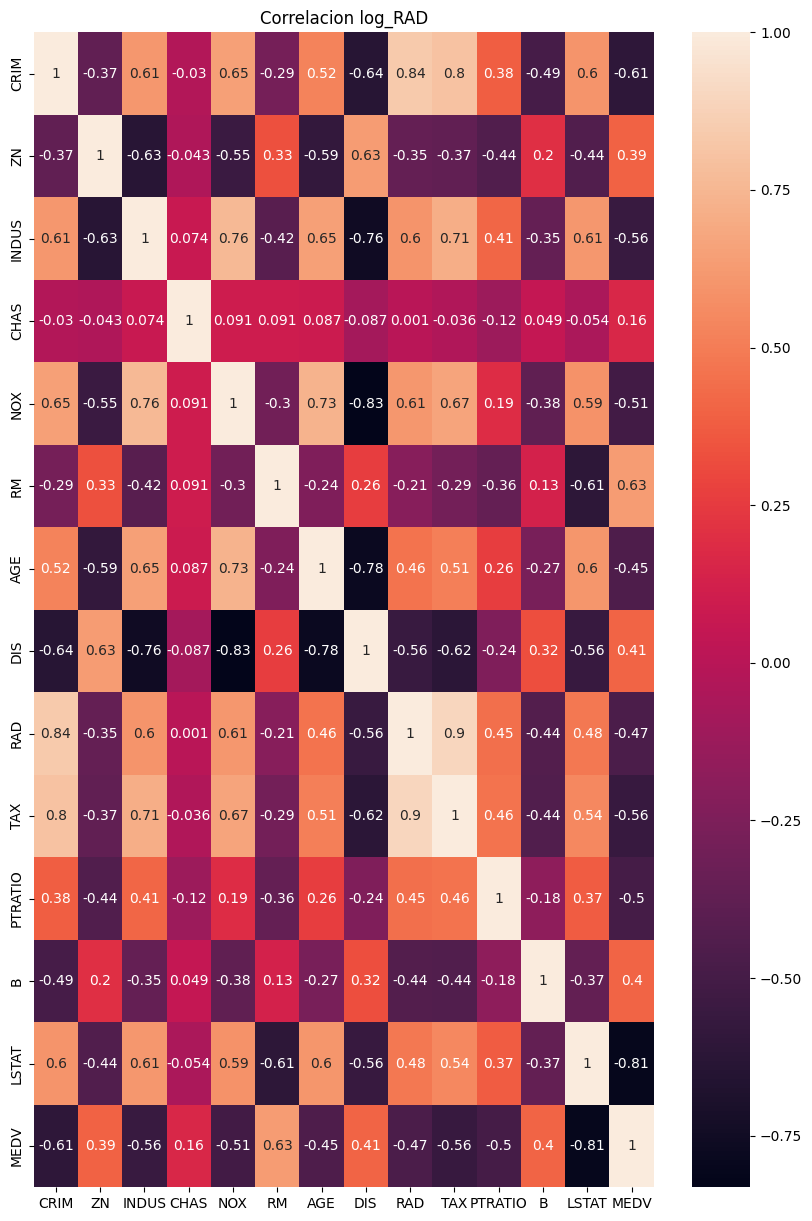

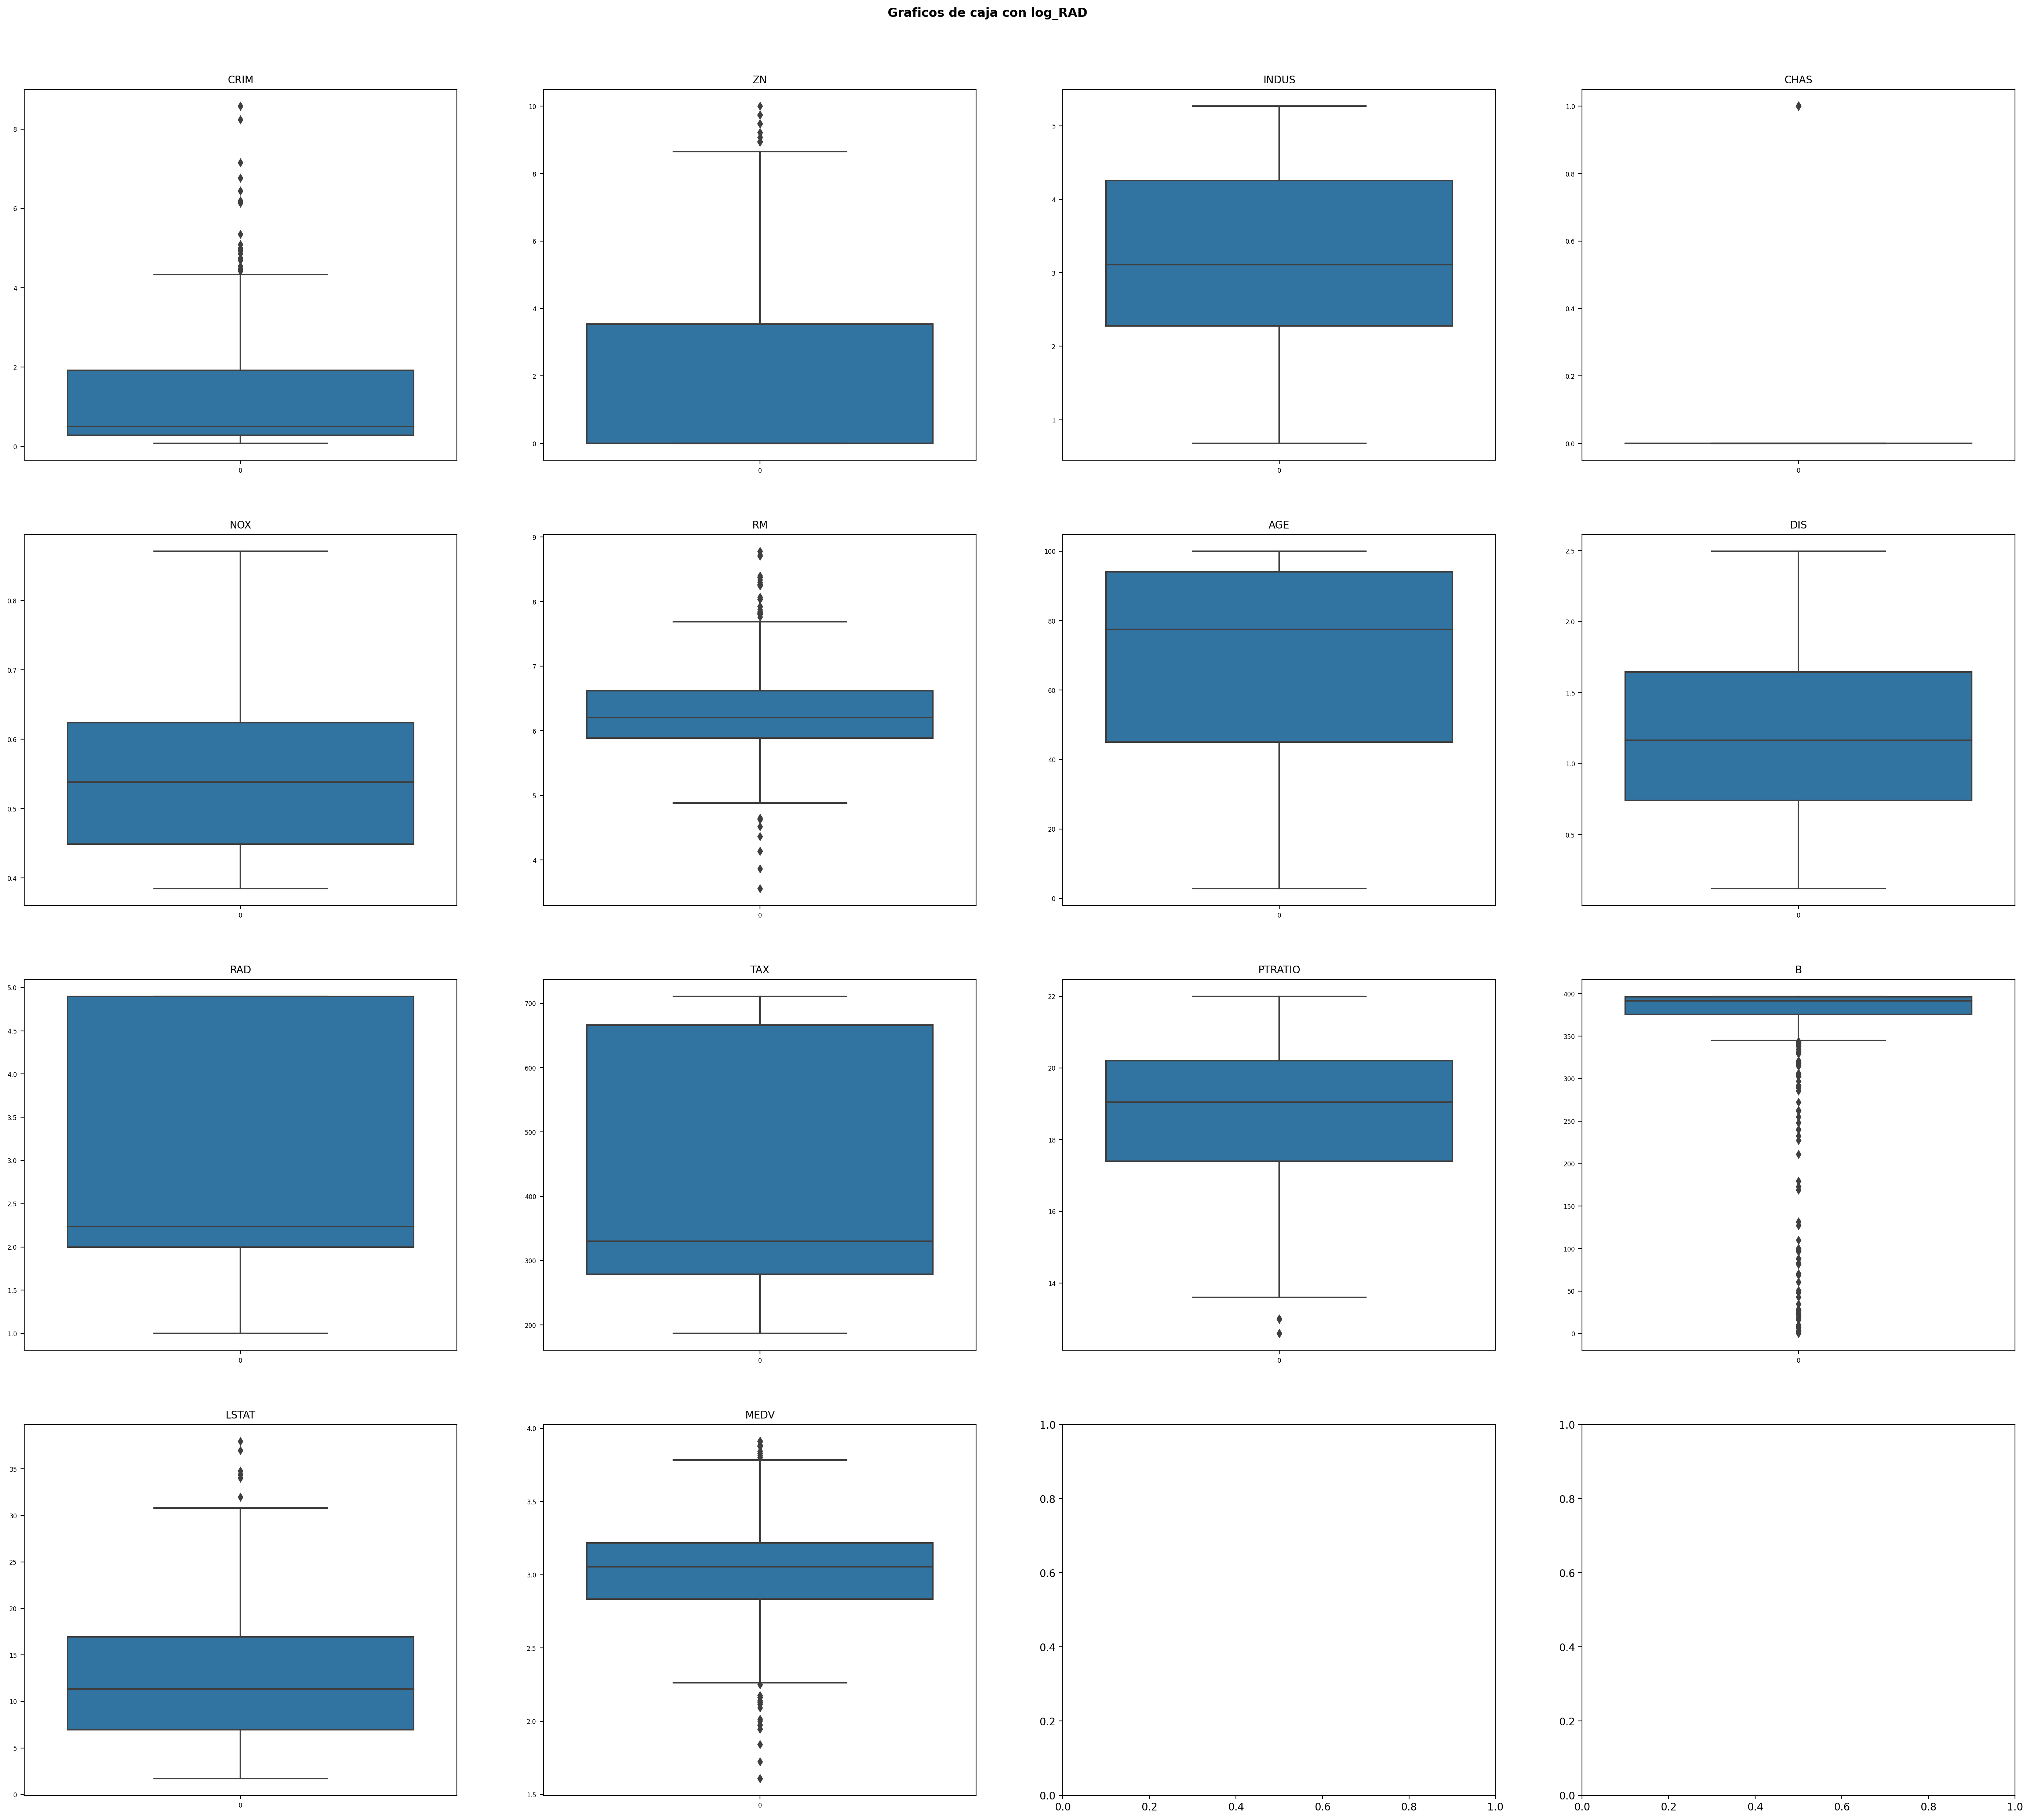

In [31]:
df['RAD'] = np.sqrt(df['RAD'])
grafic.corr_grafic(name='log_RAD')
grafic.box_num(4,4,name='log_RAD')

<h2>TAX</h2>

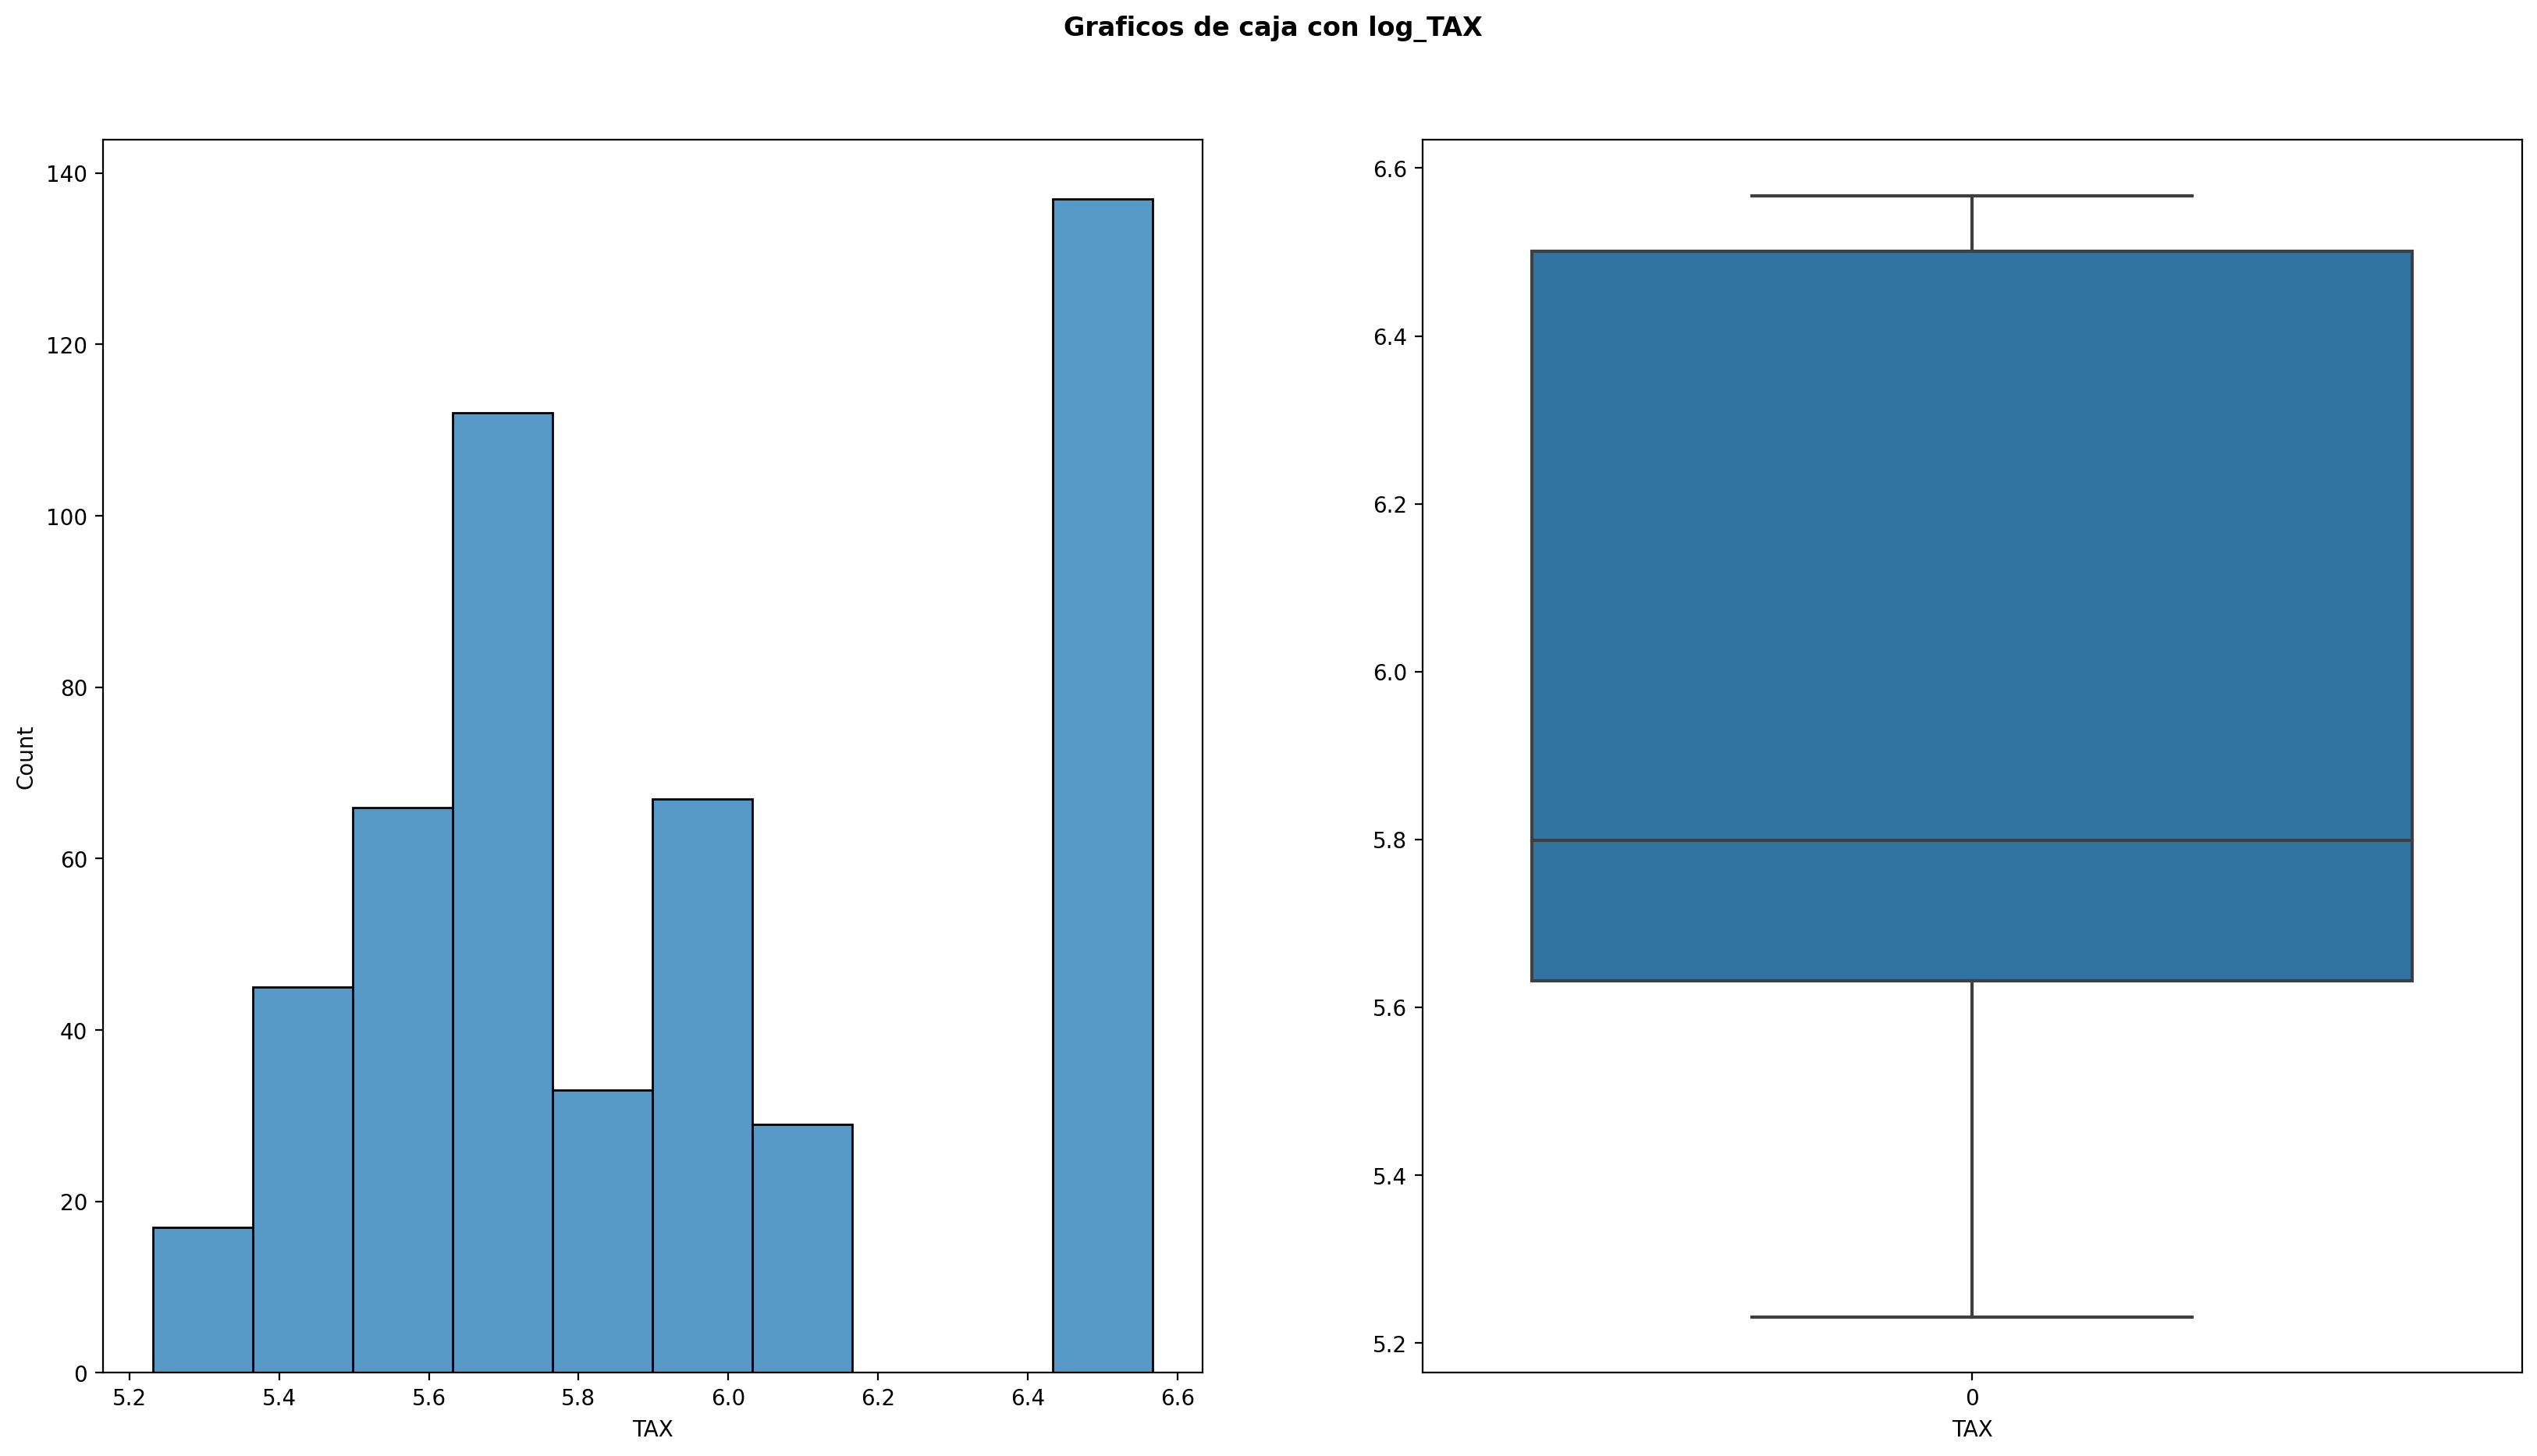

In [32]:
grafic.grafic_analist(variable='TAX', distribution='log')

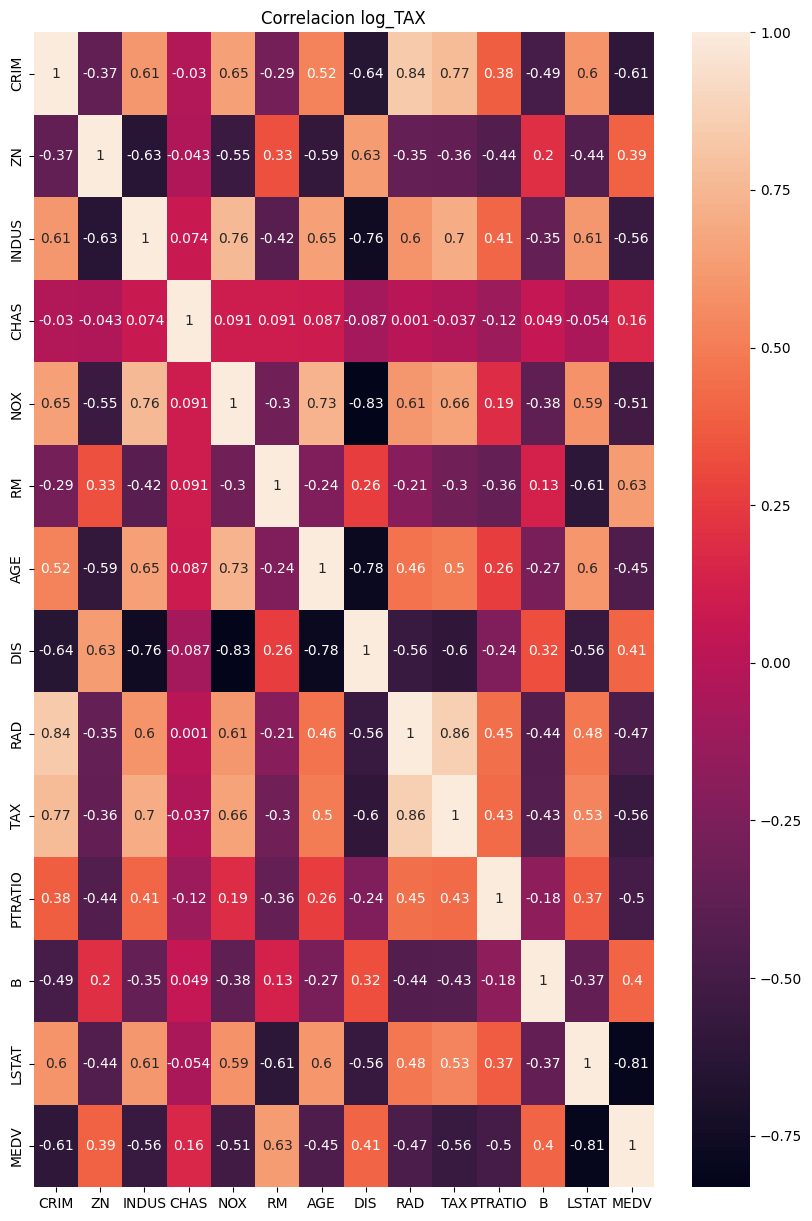

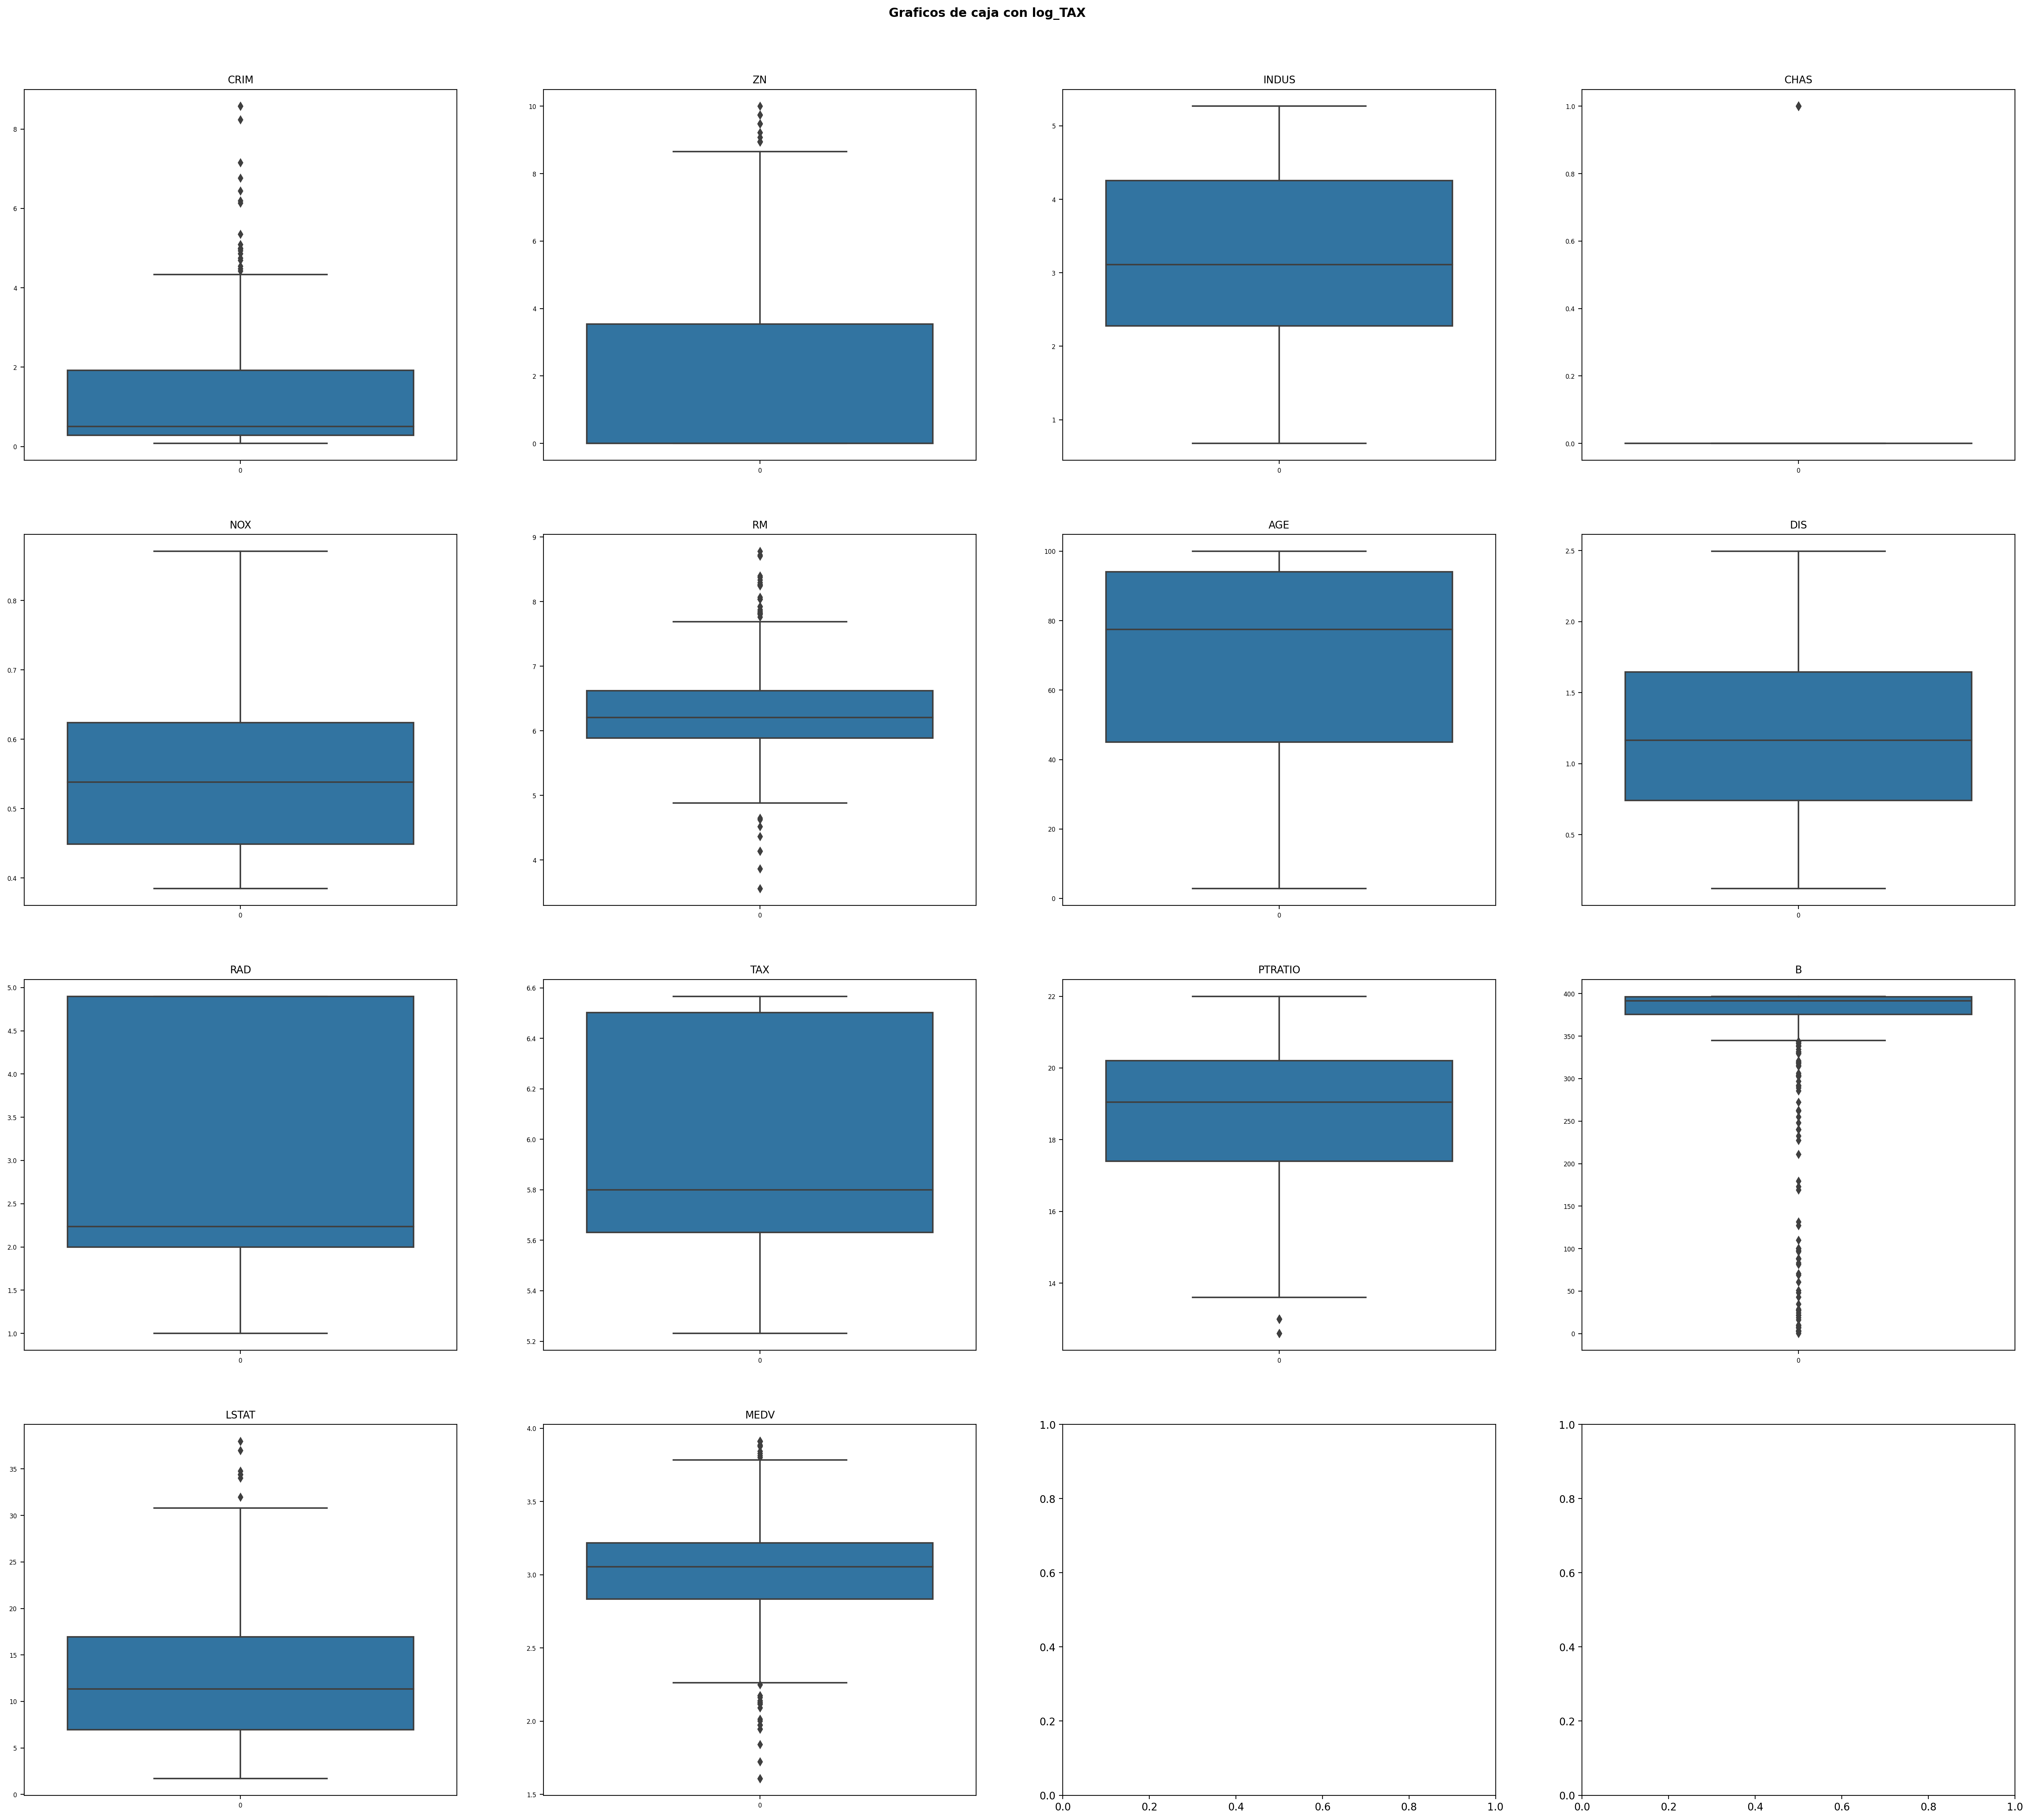

In [33]:
df['TAX'] = np.log(df['TAX'])
grafic.corr_grafic(name='log_TAX')
grafic.box_num(4,4,name='log_TAX')

<h2>PTRATIO</h2>

In [34]:
df['PTRATIO'].sort_values().head(20)

197    12.6
198    12.6
196    12.6
262    13.0
261    13.0
264    13.0
265    13.0
266    13.0
263    13.0
268    13.0
260    13.0
259    13.0
258    13.0
257    13.0
267    13.0
283    13.6
195    14.4
168    14.7
154    14.7
171    14.7
Name: PTRATIO, dtype: float64

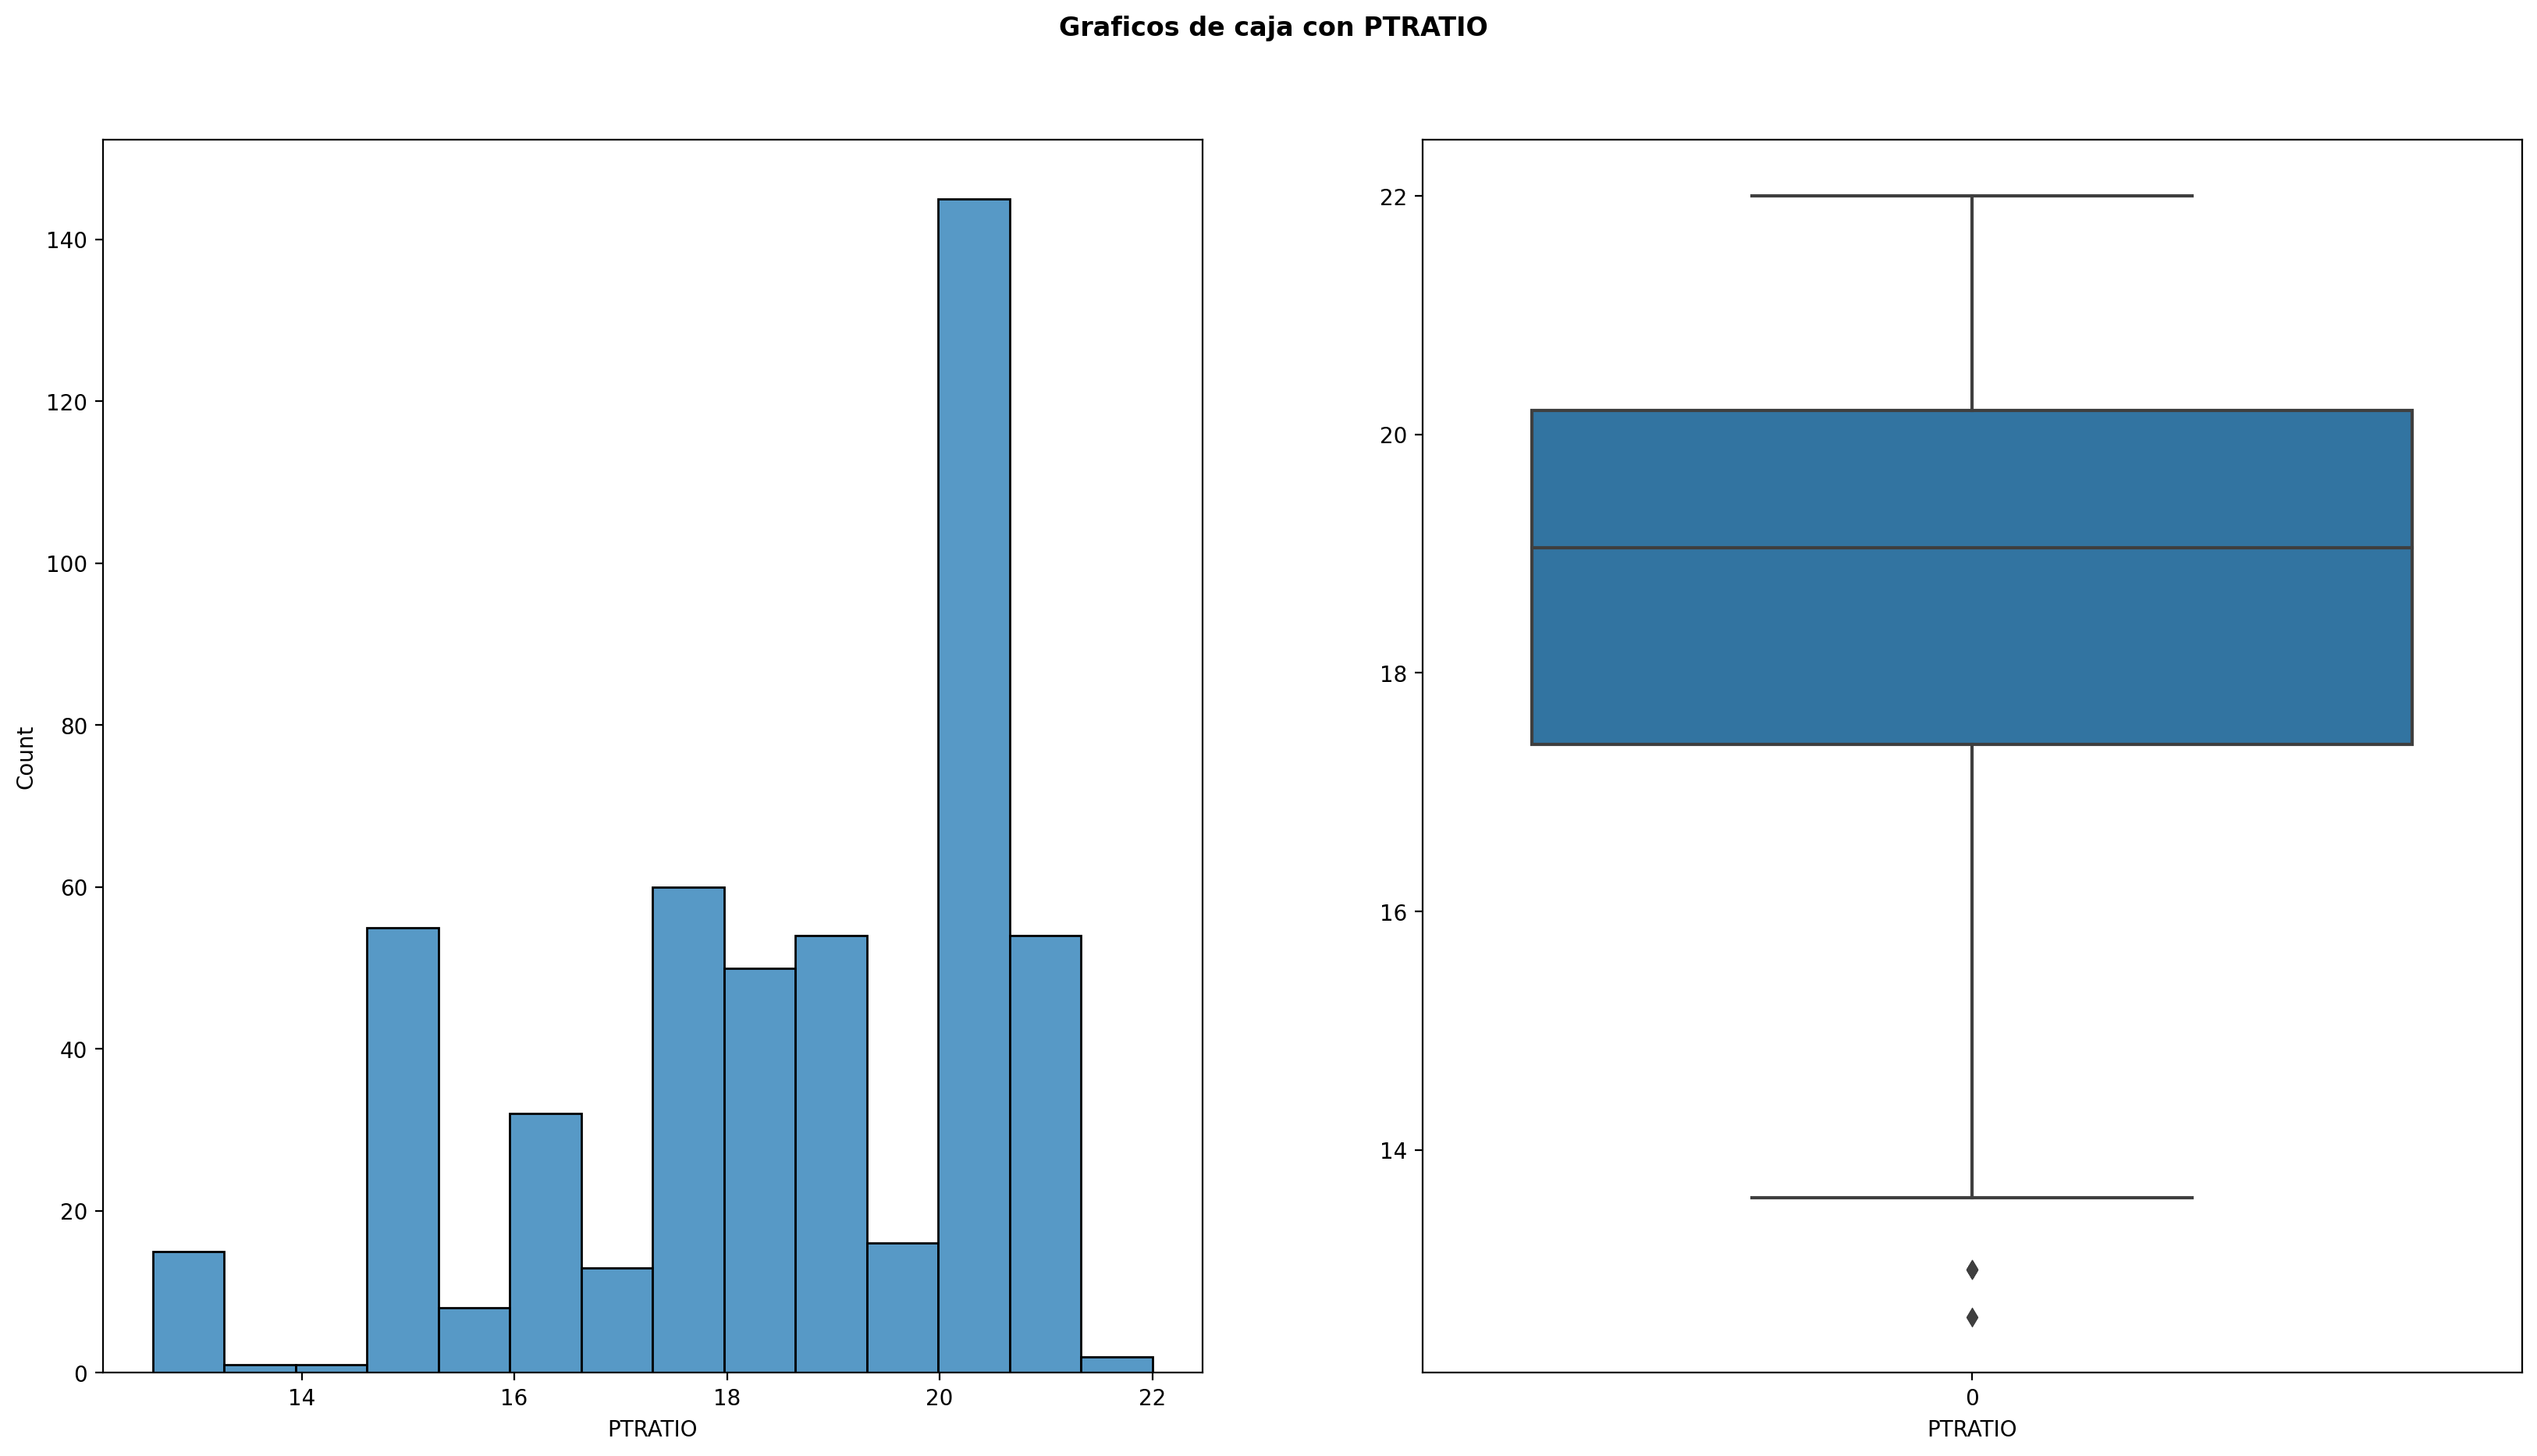

In [35]:
grafic.grafic_analist(variable='PTRATIO', distribution='normal')

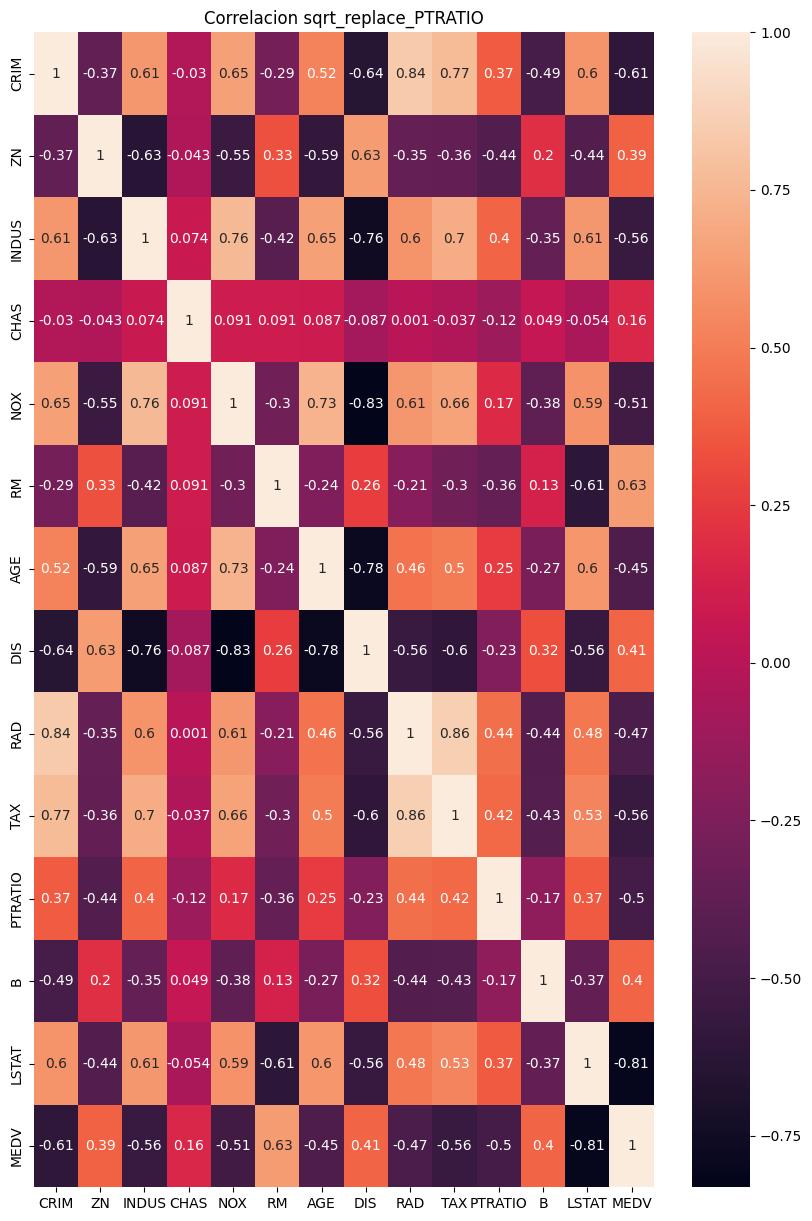

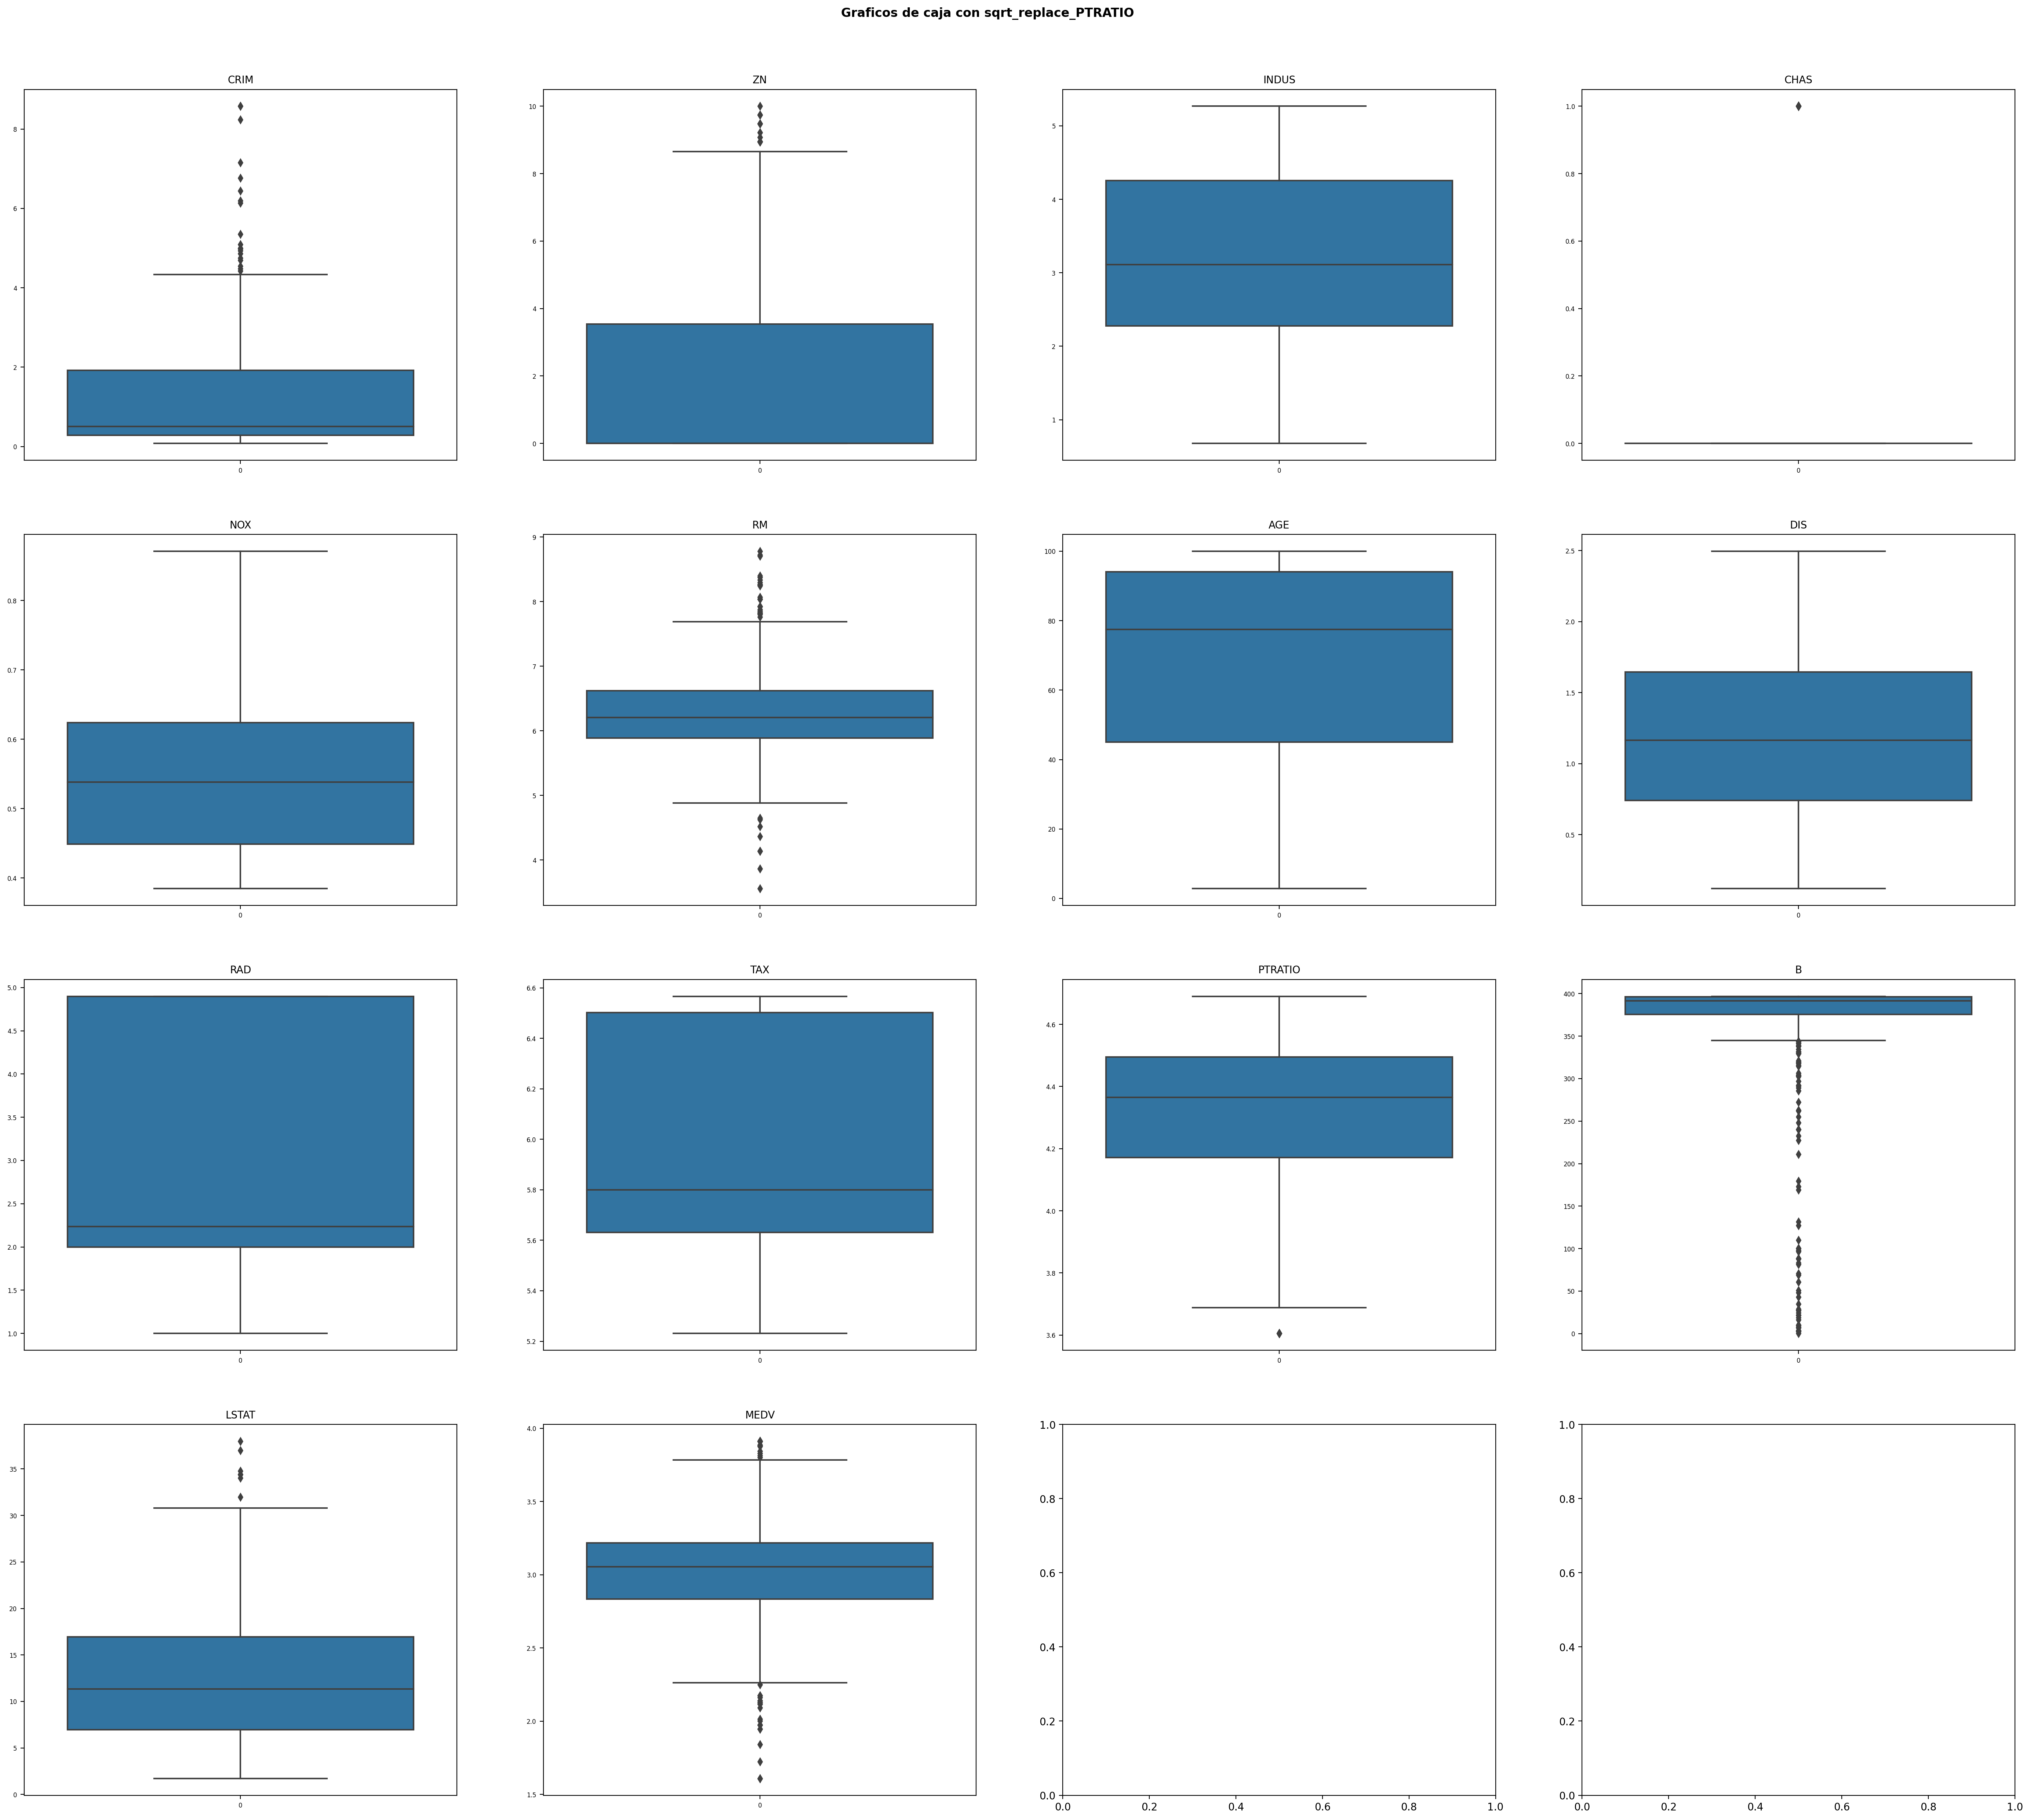

In [36]:
df['PTRATIO'] = np.where(df['PTRATIO'] == 12.6, 13.0, df['PTRATIO'])
df['PTRATIO'] = np.sqrt(df['PTRATIO'] )
grafic.corr_grafic(name='sqrt_replace_PTRATIO')
grafic.box_num(4,4,name='sqrt_replace_PTRATIO')

<h2>B</h2>

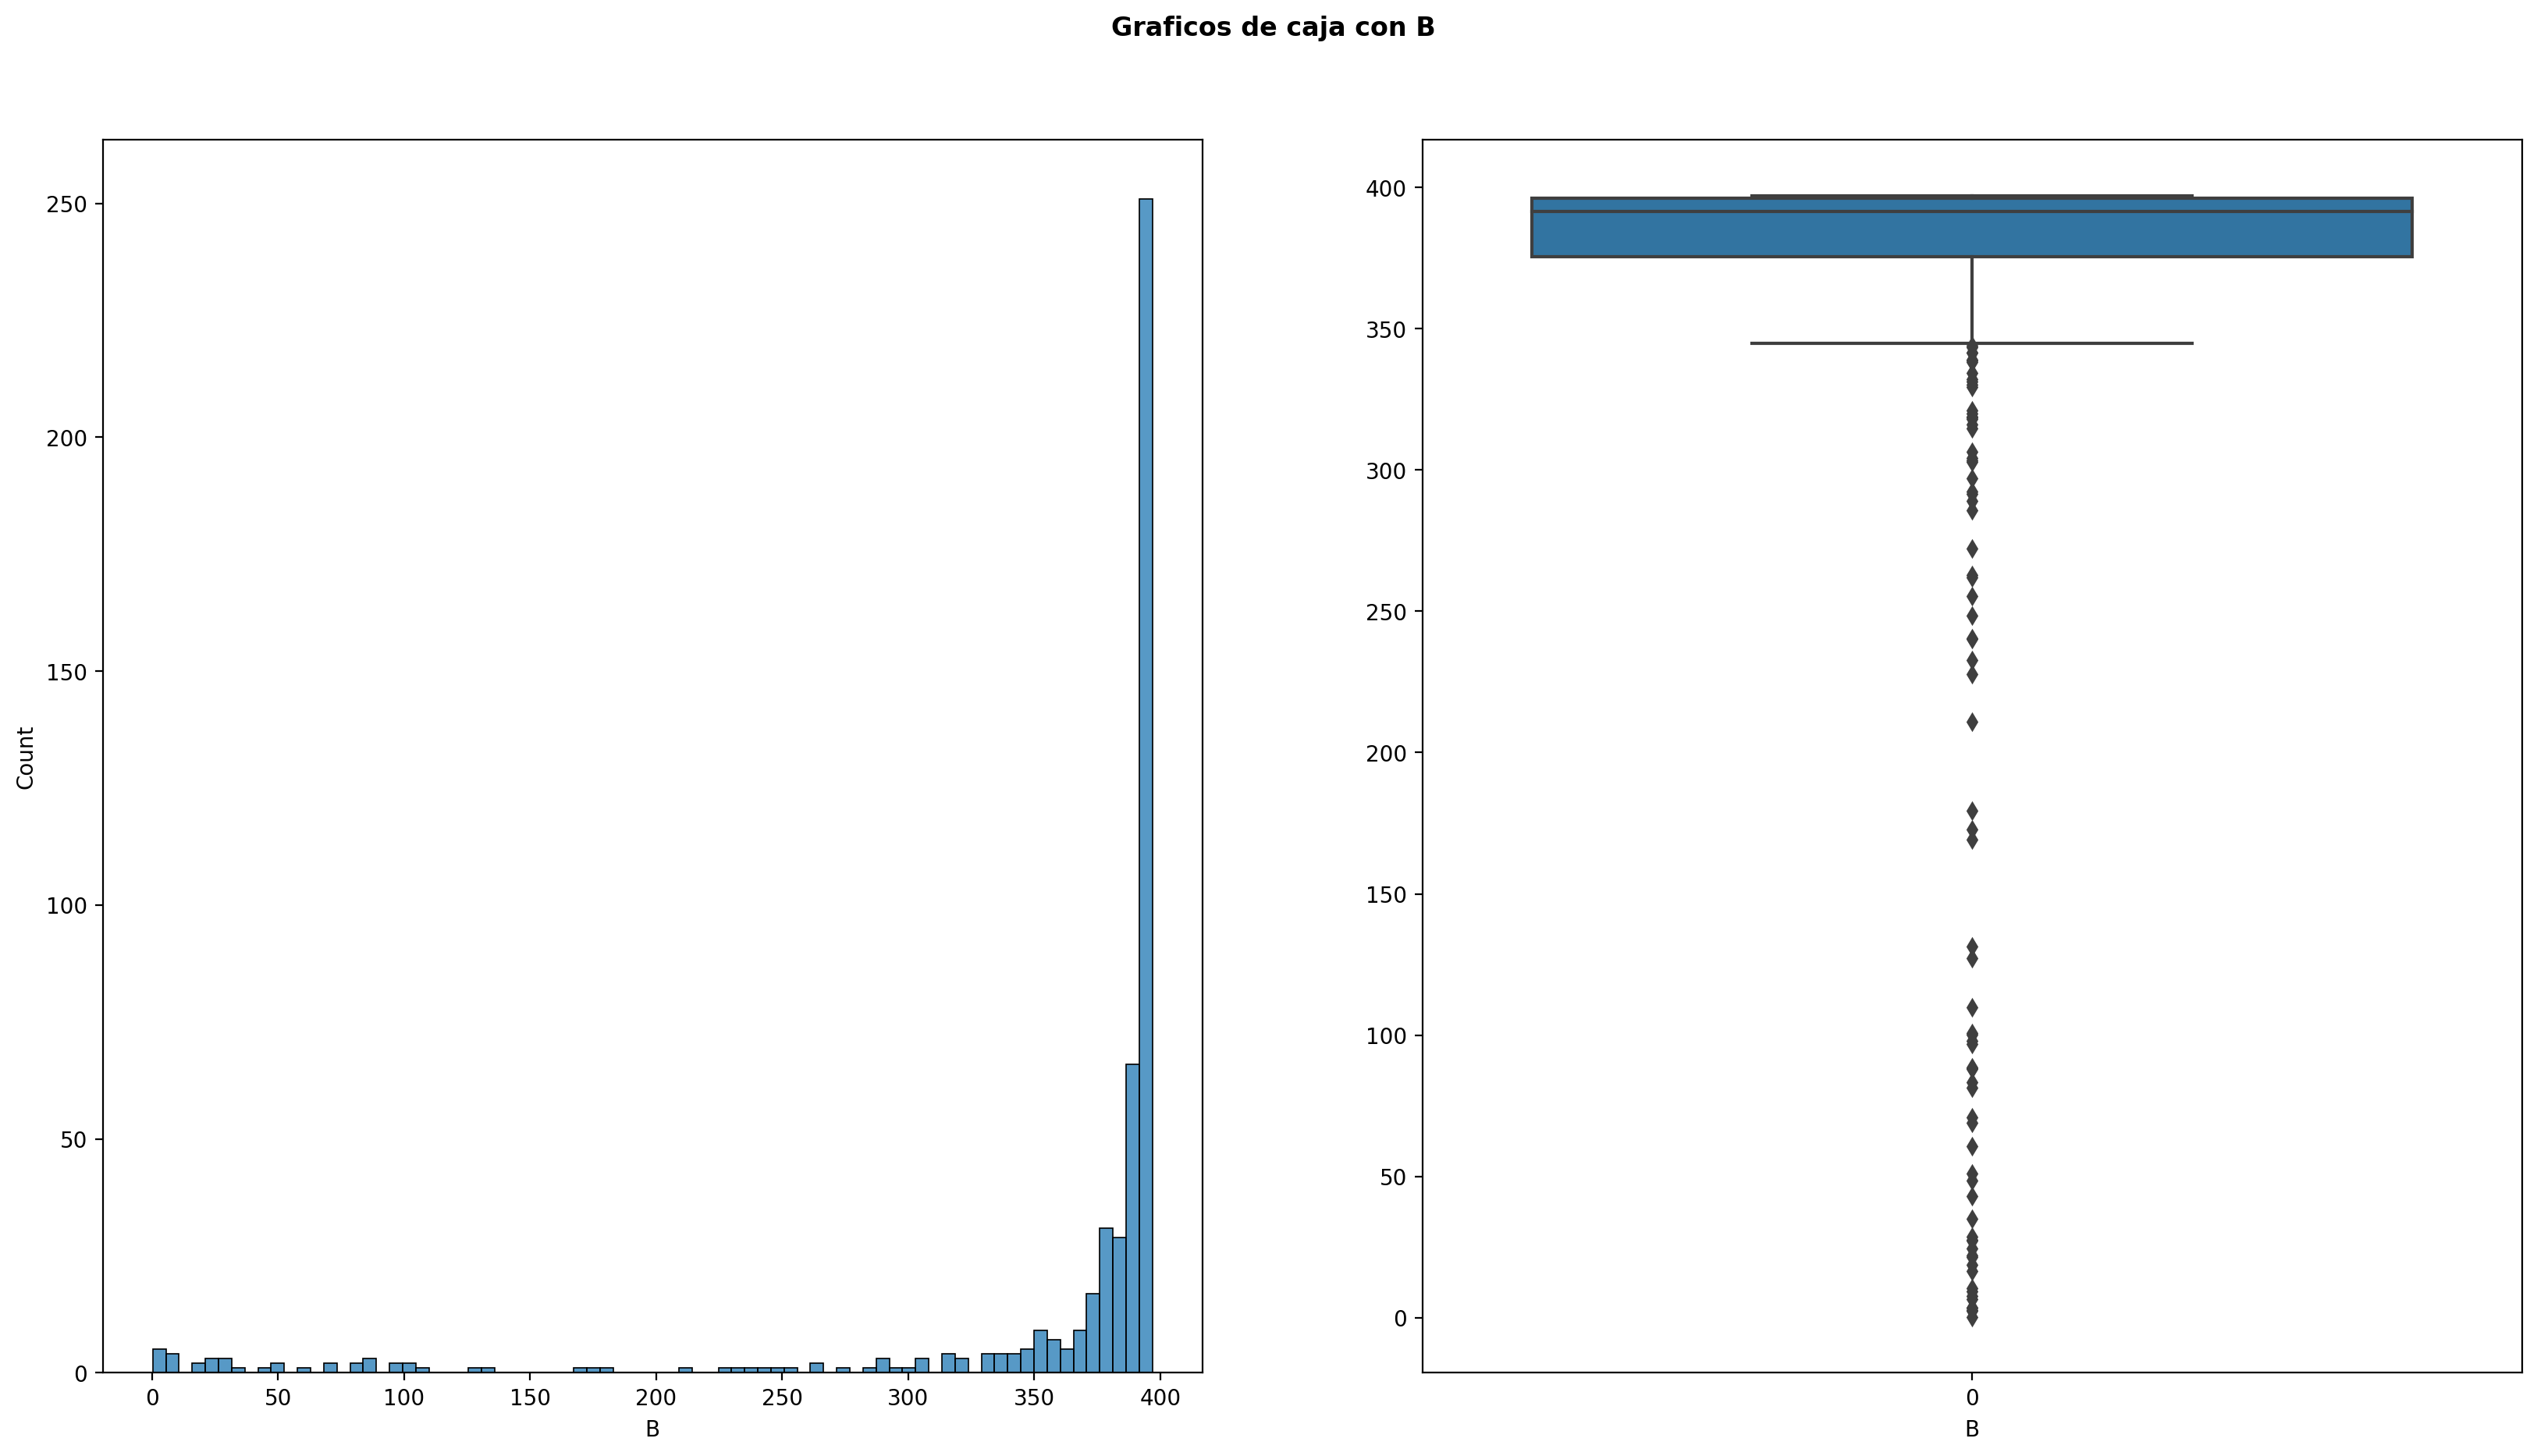

In [37]:
graf(df).grafic_analist(variable='B', distribution='normal')

Sin modificar

<h2>LSTAT</h2>

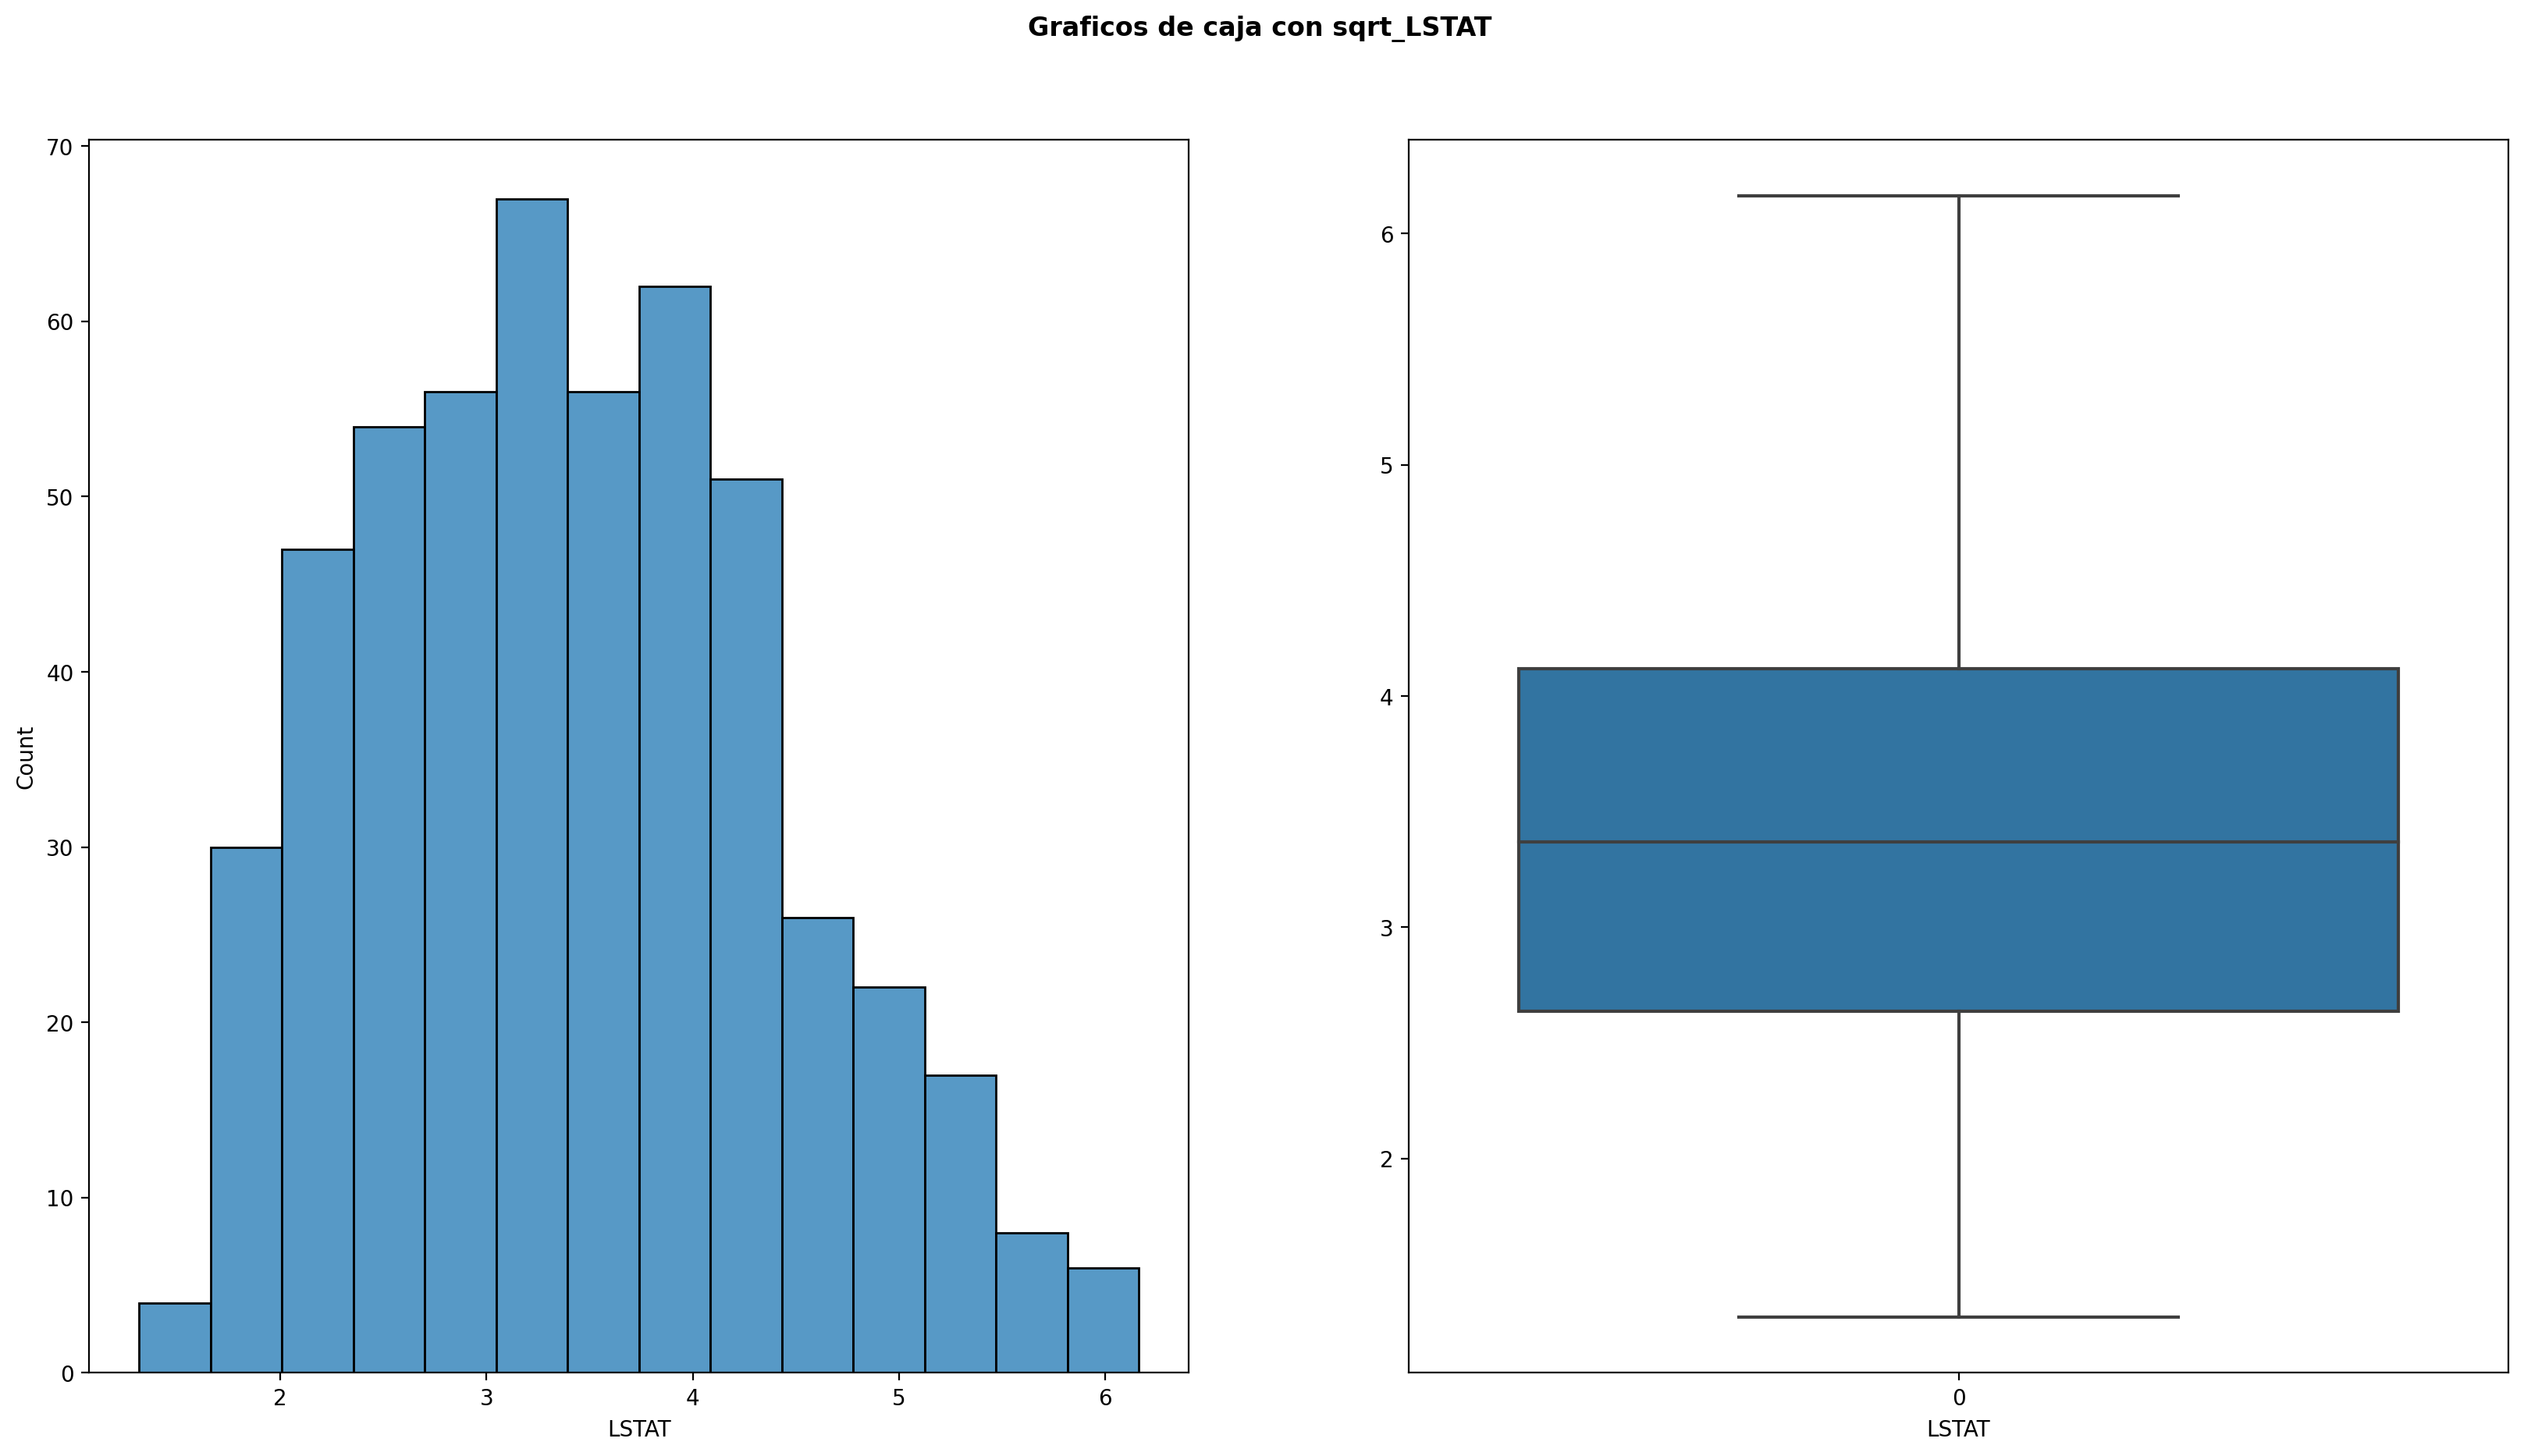

In [38]:
graf(df).grafic_analist(variable='LSTAT', distribution='sqrt')

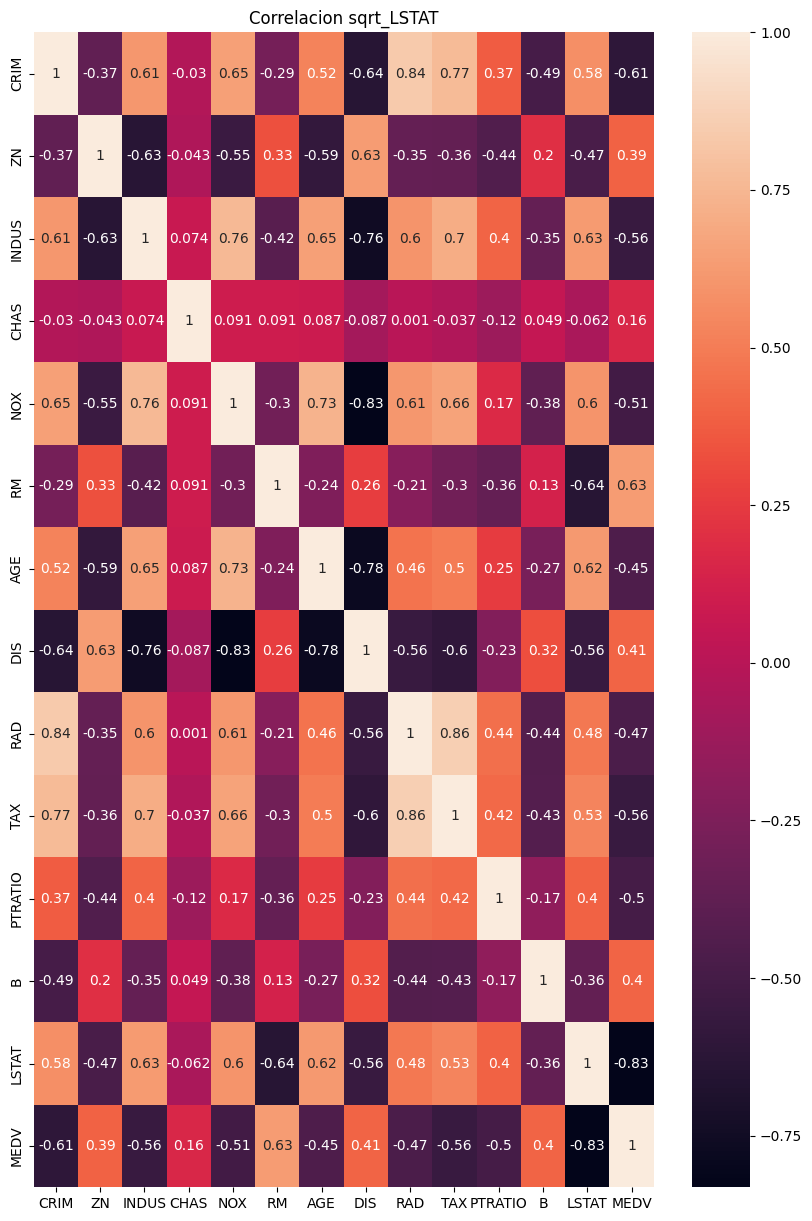

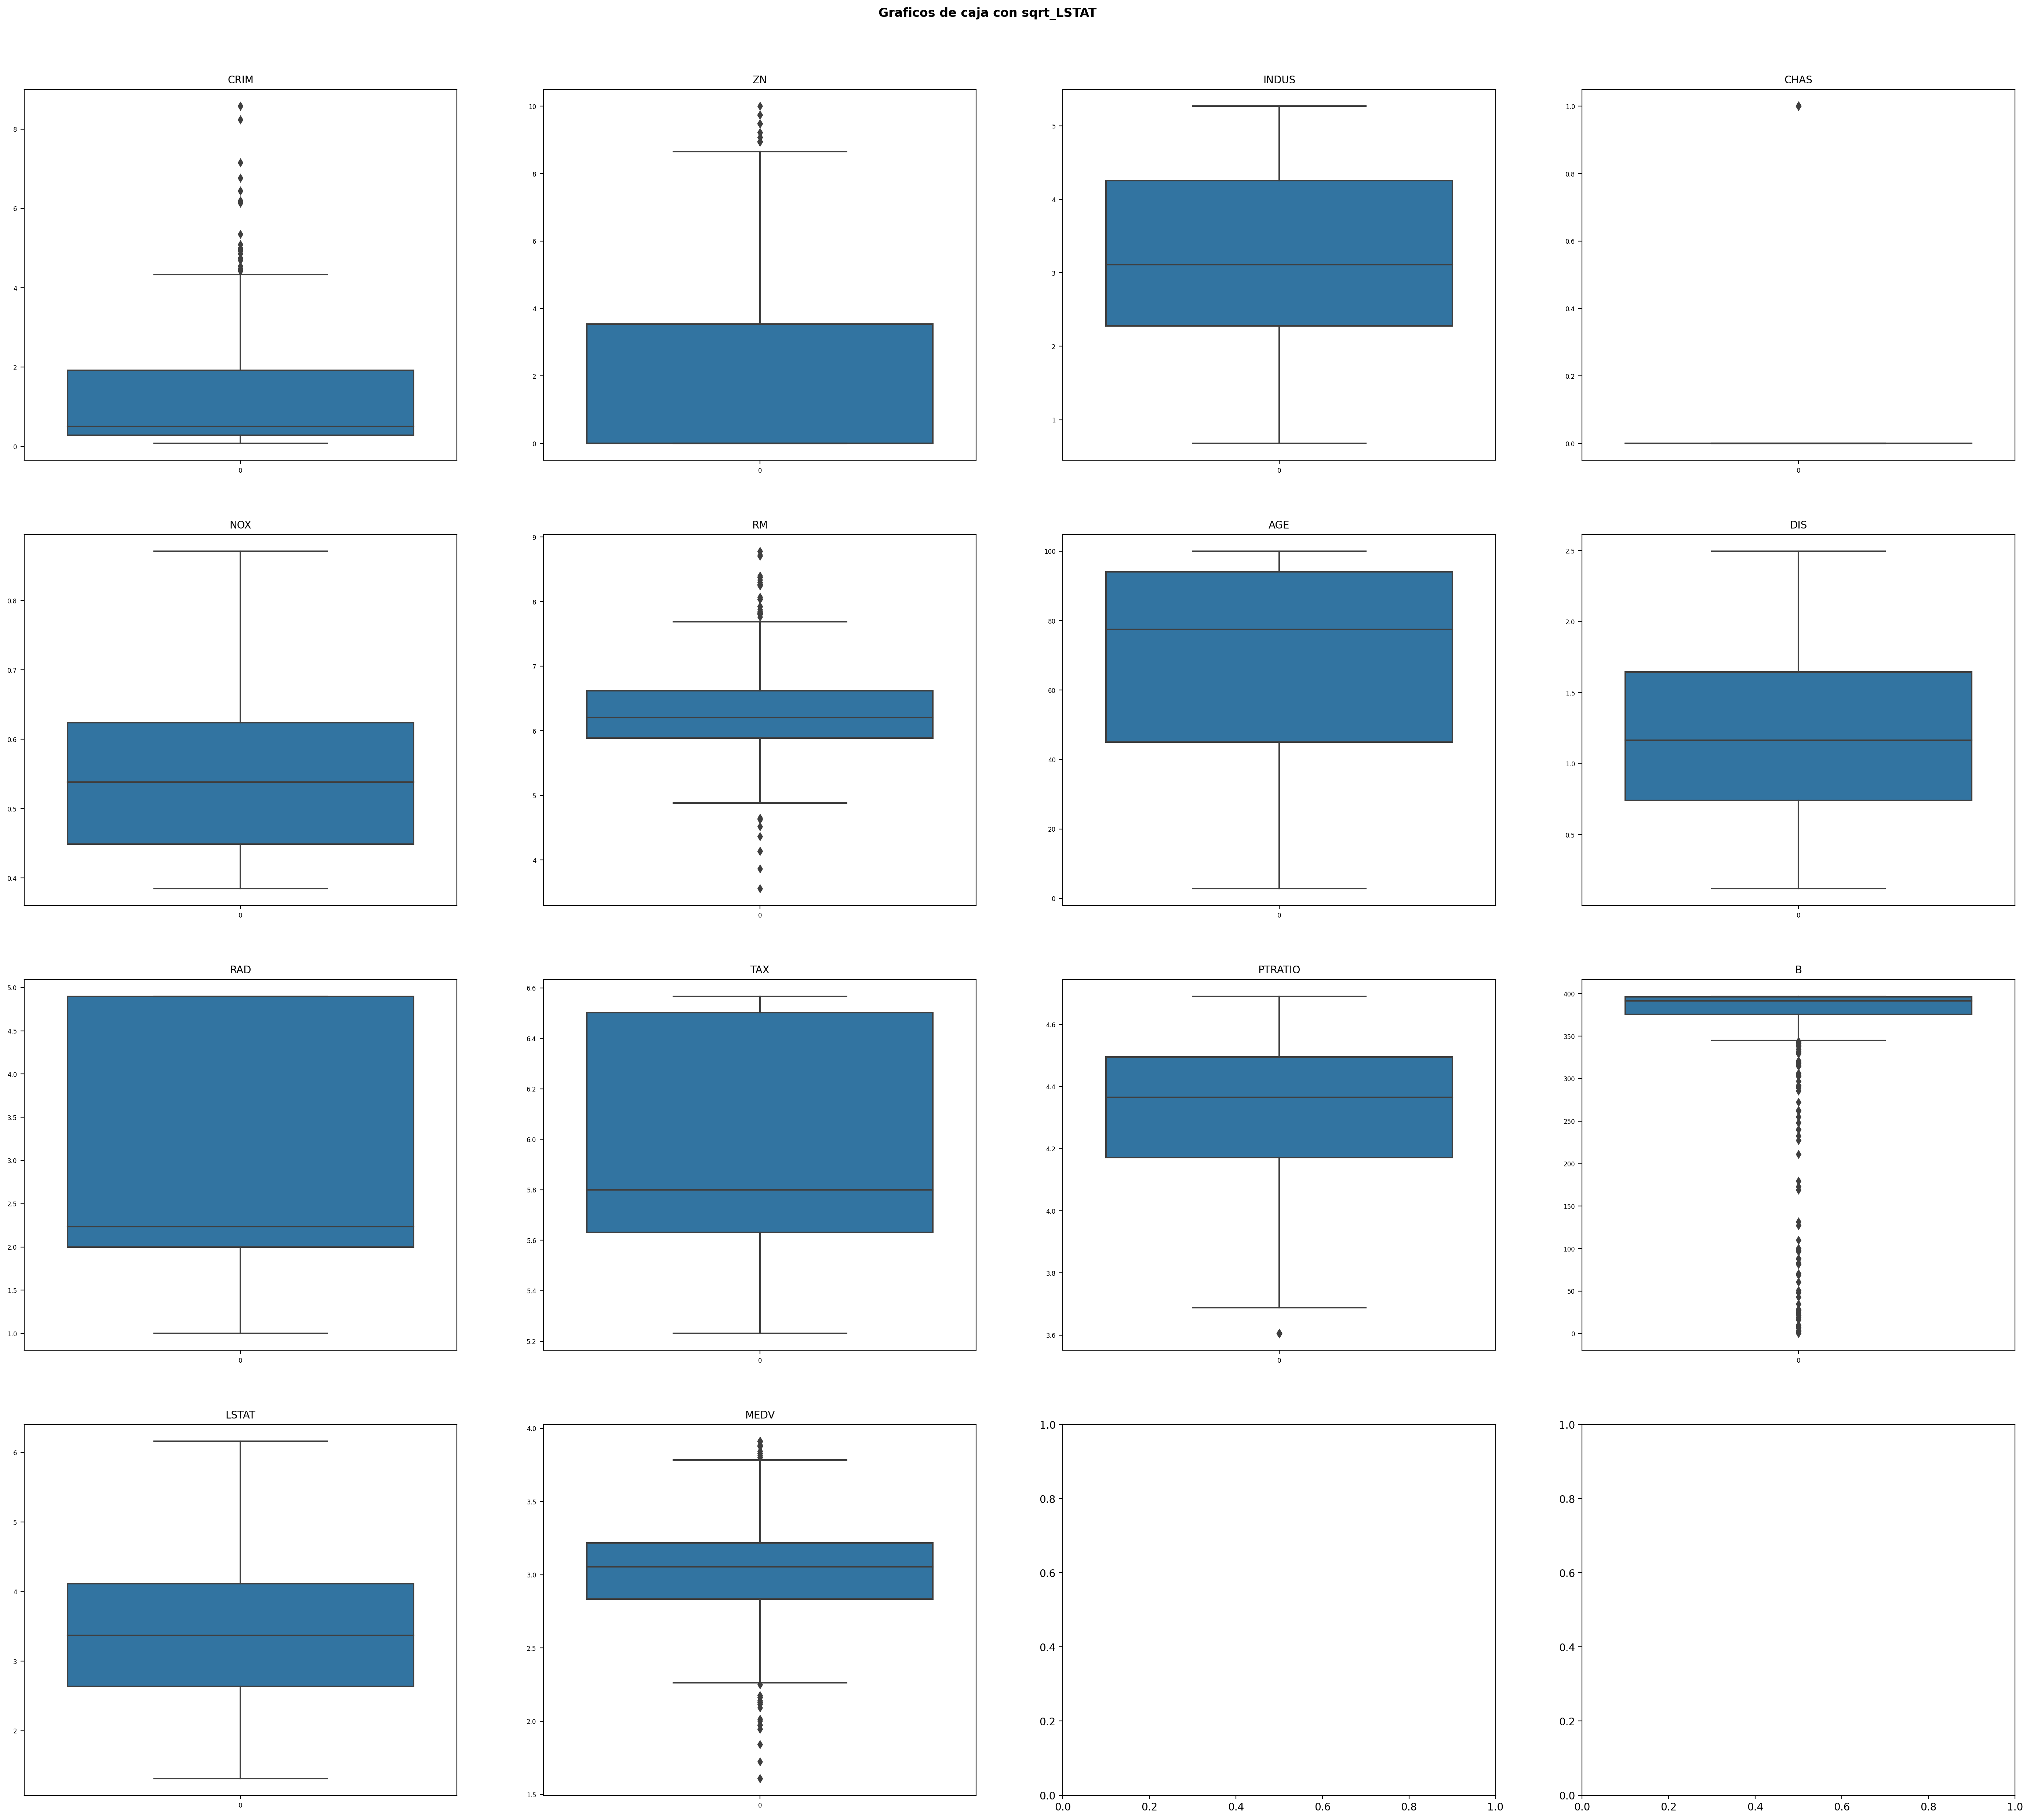

In [39]:
df['LSTAT'] = np.sqrt(df['LSTAT'])
grafic.corr_grafic(name='sqrt_LSTAT')
grafic.box_num(4,4,name='sqrt_LSTAT')

<h2>MEDV</h2>

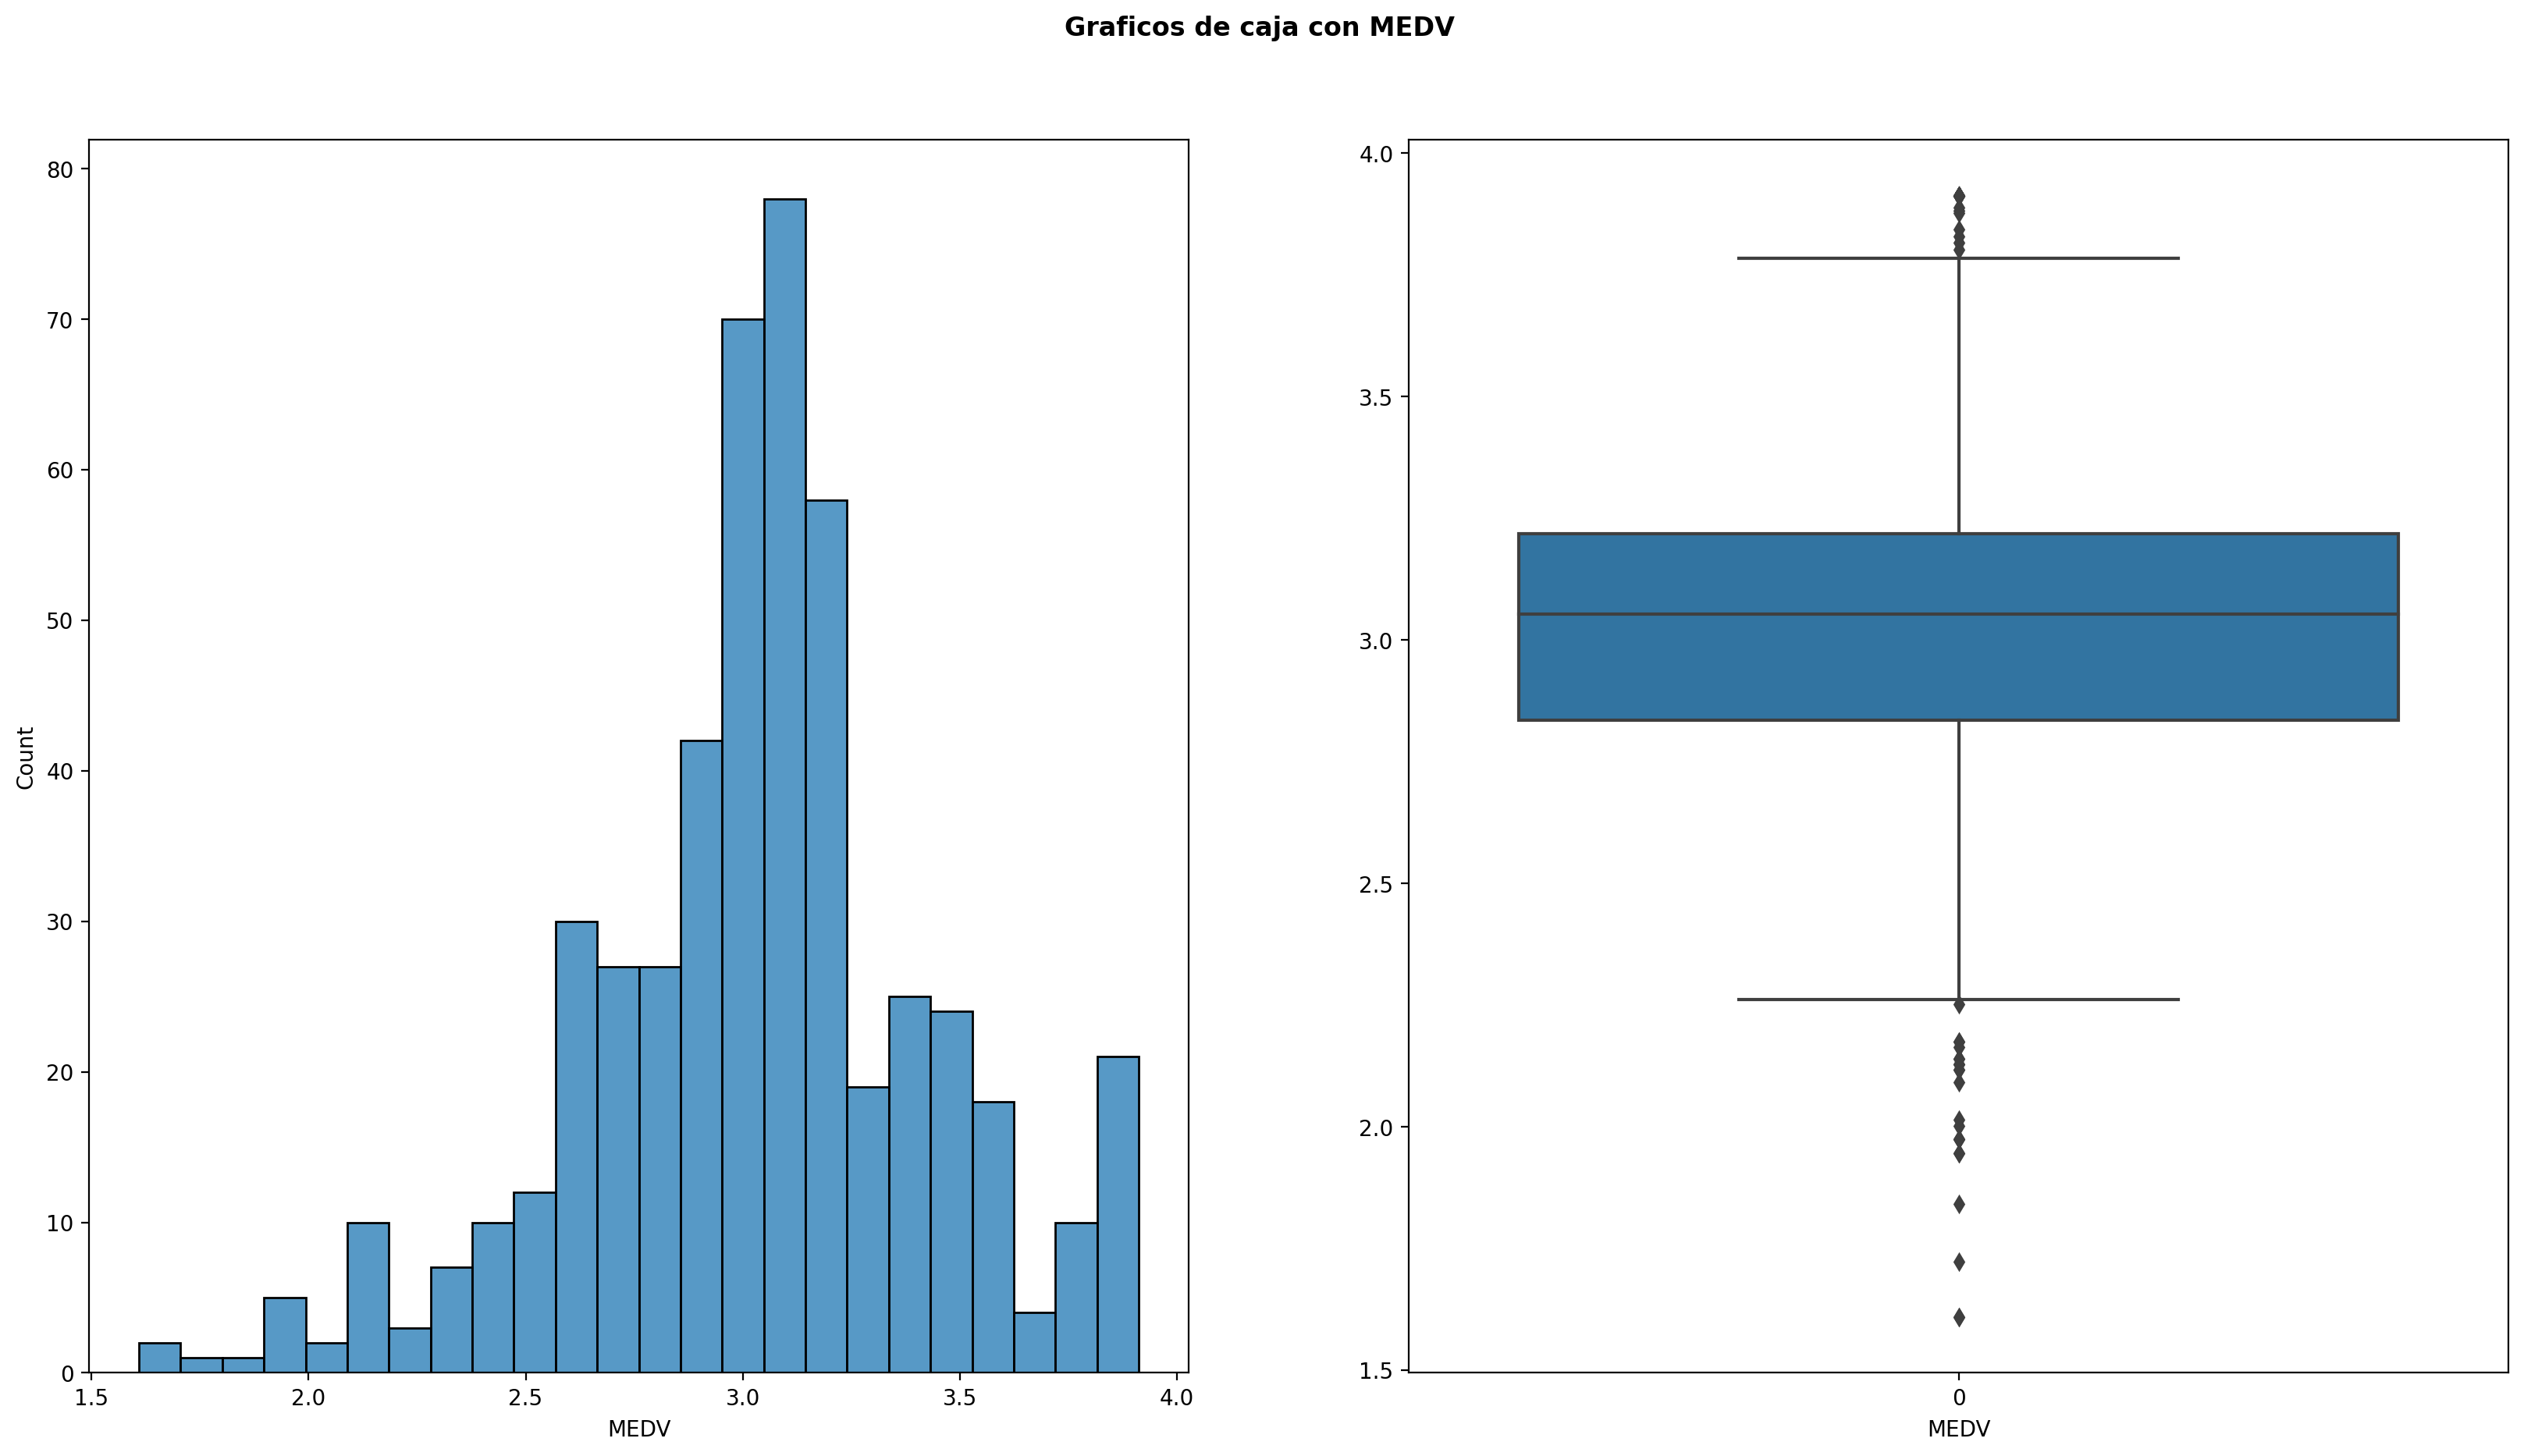

In [40]:
grafic.grafic_analist(variable='MEDV')

In [41]:
df['MEDV'].describe()

count    506.000000
mean       3.034513
std        0.408757
min        1.609438
25%        2.834680
50%        3.054001
75%        3.218876
max        3.912023
Name: MEDV, dtype: float64

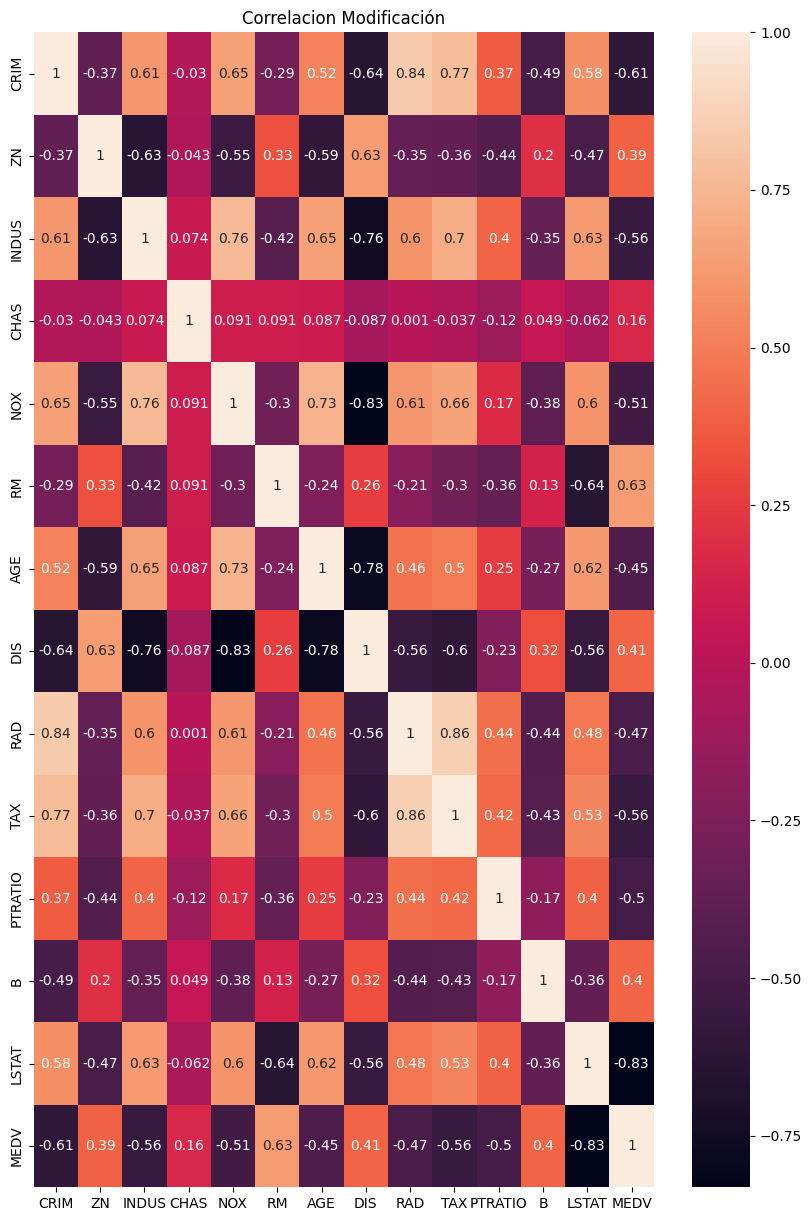

In [42]:
graf(df).corr_grafic()

In [43]:
cols_cross = ['MEDV']

X = df.drop(columns=cols_cross)
y = df['MEDV']

st_x = StandardScaler()
st_y = StandardScaler()

x_st = st_x.fit_transform(X)
y_st = st_y.fit_transform(y.values.reshape(-1, 1))

In [44]:
# Regresion Lineal
# =====================================================================

kf = KFold(n_splits=7)

modelo_cross = LinearRegression()

score_all = cross_val_score(modelo_cross,x_st, y_st, cv = kf)
print("Media de cross_validation Test:", score_all.mean())
print(score_all)

Media de cross_validation Test: 0.5881965602555405
[0.69155239 0.70585924 0.69694042 0.73969415 0.51395637 0.24743451
 0.52193884]


In [45]:
# Regresion Ridge
# =====================================================================

kf = KFold(n_splits=6)

modelo_cross = Ridge()

score_all = cross_val_score(modelo_cross,x_st, y_st, cv = kf)
print("Media de cross_validation Test:", score_all.mean())
print(score_all)

Media de cross_validation Test: 0.6009448846124249
[0.69241081 0.68272077 0.59531668 0.77837086 0.36741427 0.48943592]


In [46]:
# Regresion Arbol Regresor
# =====================================================================

kf = KFold(n_splits=7)

X = df.drop(columns=cols_cross)
y = df['MEDV']

modelo_cross = DecisionTreeRegressor(
                max_depth         = 5,
                ccp_alpha         = 0.0
                
                )

score_all = cross_val_score(modelo_cross,X, y, cv = kf)
print("Media de cross_validation Test:", score_all.mean())
print(score_all)

Media de cross_validation Test: 0.3505086893288198
[ 0.62629453  0.48000846  0.69904579  0.12280877  0.29113078  0.24516075
 -0.01088825]


In [47]:
# Regresion Random Forest Regresor
# =====================================================================

kf = KFold(n_splits=6)

X = df.drop(columns=cols_cross)
y = df['MEDV']

modelo_cross = RandomForestRegressor(
                max_depth=2,
                random_state=0
                )

score_all = cross_val_score(modelo_cross,X, y, cv = kf)
print("Media de cross_validation Test:", score_all.mean())
print(score_all)

Media de cross_validation Test: 0.4633563541827421
[0.68507482 0.52959197 0.34005231 0.46973866 0.28064874 0.47503163]


In [48]:
# Aca estan elevdos porque hice una raiz cuadrada para quitar el sesgo

# pd.DataFrame({'Predicciones':prediccion_test**2,
#               'Reales':y_test**2})

<h3>GridSearchCV DecisionTreeRegressor</h3>

In [49]:
x_cols_search = X.drop(columns=['PTRATIO','RAD','CHAS','INDUS','B','ZN','AGE','TAX']).columns

kf = KFold(n_splits=7)

# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 5)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = 4,
                            # random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = kf,
        return_train_score = True
      )

grid.fit(X[x_cols_search], y)

# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_search = grid.best_estimator_

print(f'Mejor parametro de alpha: {grid.best_params_}')

print('='*80)

print(f"Profundidad del árbol: {modelo_search.get_depth()}")
print(f"Número de nodos terminales: {modelo_search.get_n_leaves()}")


print('='*80)

print(f'Media de cross_validation Test: {cross_val_score(modelo_search,X[x_cols_search], y, cv = kf).mean()}')
print(f'Media de cross_validation Test: {cross_val_score(modelo_search,X[x_cols_search], y, cv = kf)}')

# Lista de features
# ------------------------------------------------------------------------------

importancia_predictores = pd.DataFrame(
                            {'predictor': x_cols_search,
                             'importancia': modelo_search.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores.sort_values('importancia', ascending=False)

Mejor parametro de alpha: {'ccp_alpha': 0.0}
Profundidad del árbol: 4
Número de nodos terminales: 16
Media de cross_validation Test: 0.40614121320418584
Media de cross_validation Test: [0.50574315 0.53679831 0.54317692 0.25407393 0.43286492 0.29818307
 0.10988528]
Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
4     LSTAT     0.586678
2        RM     0.225675
0      CRIM     0.121980
3       DIS     0.038053
1       NOX     0.027614

In [50]:
x_cols_arbol = X.drop(columns=['PTRATIO','RAD','CHAS','INDUS','B','ZN','AGE','TAX']).columns

# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        X[x_cols_arbol],
                                        y,
                                        train_size=0.8
                                    )

modelo_final_arbol = DecisionTreeRegressor(
                max_depth         = 4,
                ccp_alpha         = 0.0
                
                )


print(f'Media de cross_validation Test: {cross_val_score(modelo_final_arbol,X[x_cols_arbol], y, cv = kf).mean()}')
print(f'Media de cross_validation Test: {cross_val_score(modelo_final_arbol,X[x_cols_arbol], y, cv = kf)}')

print('='*80)

modelo_final_arbol.fit(X_train, y_train)

prediccion_train_final = modelo_final_arbol.predict(X_train)
prediccion_test_final = modelo_final_arbol.predict(X_test)

print(f'Entrenamiento RMSE: {mean_squared_error(y_pred=prediccion_train_final,y_true=y_train)}')
print(f'Entrenamiento R2  : {r2_score(y_true= y_train,y_pred = prediccion_train_final)}')

print('='*80)

print(f'Testin RMSE       : {mean_squared_error(y_pred=prediccion_test_final,y_true=y_test)}')
print(f'Testin R2         : {r2_score(y_true= y_test,y_pred = prediccion_test_final)}')

print('='*80)

print(f"Profundidad del árbol: {modelo_final_arbol.get_depth()}")
print(f"Número de nodos terminales: {modelo_final_arbol.get_n_leaves()}")

print('='*80)

print(f'Mejor parametro de alpha: {modelo_final_arbol.get_params()}')

Media de cross_validation Test: 0.4061412132041854
Media de cross_validation Test: [0.50574315 0.53679831 0.70543983 0.25407393 0.43286492 0.29818307
 0.15362918]
Entrenamiento RMSE: 0.022396679835145993
Entrenamiento R2  : 0.8682035805328504
Testin RMSE       : 0.06038040822349447
Testin R2         : 0.6007474577184075
Profundidad del árbol: 4
Número de nodos terminales: 16
Mejor parametro de alpha: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [51]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_cols_arbol,
                             'importancia': modelo_final_arbol.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
4     LSTAT     0.601588
2        RM     0.225802
0      CRIM     0.116023
1       NOX     0.029889
3       DIS     0.026698

In [52]:
print(modelo_final_arbol.score(X_test,y_test))
pd.DataFrame({'Predicciones':(np.e**prediccion_test_final).round(1),'Reales':np.e**y_test})

0.6007474577184075


Predicciones  Reales
69           23.6    20.9
306          30.5    33.4
394          12.6    12.7
338          23.6    20.6
356          12.6    17.8
..            ...     ...
127          16.2    16.2
91           23.6    22.0
462          20.3    19.5
122          19.4    20.5
351          23.6    24.1

[102 rows x 2 columns]

In [53]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
print(grid.best_params_)
drop_col = ['params','std_score_time','mean_fit_time','std_fit_time','mean_score_time']
obser = pd.DataFrame(grid.cv_results_).head(25).drop(columns=drop_col, axis=1)
obser['split2_train_score'] = obser['split2_train_score'].round(5)
obser['split0_train_score'] = obser['split0_train_score'].round(5)
obser['split3_train_score'] = obser['split3_train_score'].round(5)
obser['mean_train_score'] = obser['mean_train_score'].round(5)
obser['std_train_score'] = obser['std_train_score'].round(5)
obser

{'ccp_alpha': 0.0}


param_ccp_alpha  split0_test_score  split1_test_score  split2_test_score   
0             0.0           0.505743           0.536798           0.705440  \
1            1.25          -0.002144          -0.007331          -0.839486   
2             2.5          -0.002144          -0.007331          -0.839486   
3            3.75          -0.002144          -0.007331          -0.839486   
4             5.0          -0.002144          -0.007331          -0.839486   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score   
0           0.254074           0.432865           0.298183           0.109885  \
1          -2.023805          -0.260386          -0.956074          -0.842714   
2          -2.023805          -0.260386          -0.956074          -0.842714   
3          -2.023805          -0.260386          -0.956074          -0.842714   
4          -2.023805          -0.260386          -0.956074          -0.842714   

   mean_test_score  std_test_score  rank_test_score  split0_train_score   
0         0.406141        0.185099                1             0.86265  \
1        -0.704563        0.656589                2             0.00000   
2        -0.704563        0.656589                2             0.00000   
3        -0.704563        0.656589                2             0.00000   
4        -0.704563        0.656589                2             0.00000   

   split1_train_score  split2_train_score  split3_train_score   
0        8.472620e-01             0.86386             0.83436  \
1        2.220446e-16            -0.00000             0.00000   
2        2.220446e-16            -0.00000             0.00000   
3        2.220446e-16            -0.00000             0.00000   
4        2.220446e-16            -0.00000             0.00000   

   split4_train_score  split5_train_score  split6_train_score   
0            0.869813            0.854863            0.882425  \
1            0.000000            0.000000            0.000000   
2            0.000000            0.000000            0.000000   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   mean_train_score  std_train_score  
0           0.85932          0.01446  
1           0.00000          0.00000  
2           0.00000          0.00000  
3           0.00000          0.00000  
4           0.00000          0.00000

<h3>Resultados:</h3>
<li>Con la busqueda del alpha, la Validación cruzada se volvio más estable</li>
<li>Tambien pudo haber influido el ajuste del modelo al momento de quitar variables</li>

<h2>Regresion Ridge</h2>

In [54]:
x_cols = df.drop(columns=['MEDV','ZN','INDUS','AGE']).columns

X_rd, y_rd = df[x_cols], df['MEDV']

x_st_rd = StandardScaler().fit(X_rd)
y_st_rd = StandardScaler().fit(y_rd.values.reshape(-1, 1))

X_tr_rd = x_st_rd.transform(X_rd)
y_tr_rd = y_st_rd.transform(y_rd.values.reshape(-1, 1))

# ==========================================================================================================

param_grid_ridge = {'alpha': np.linspace(15, 30, 50)}

# Búsqueda por validación cruzada
grid_rd = GridSearchCV(
    estimator = Ridge(fit_intercept=False),
    param_grid = param_grid_ridge,
    cv = kf,
    refit=True,
    return_train_score = True
)

grid_rd.fit(X_tr_rd,y_tr_rd)
modelo_cross = grid_rd.best_estimator_

kf = KFold(n_splits=5)

print(f'Mejor parametro de alpha: {grid_rd.best_params_}')

print('='*80)

print(f'Media de cross_validation Test: {cross_val_score(modelo_cross,X_tr_rd, y_tr_rd, cv = kf).mean()}')
print(f'Resultados de cross_validation Test: {cross_val_score(modelo_cross,X_tr_rd, y_tr_rd, cv = kf)}')

Mejor parametro de alpha: {'alpha': 30.0}
Media de cross_validation Test: 0.6734535552010957
Resultados de cross_validation Test: [0.78957872 0.84267791 0.70857171 0.52205689 0.50438255]


In [55]:
# Parametros
# ---------------------------------------------------------------------------------------
print(modelo_cross.get_params())

# modelo_cross.intercept_ = modelo_cross.intercept_[0]
modelo_cross.coef_ = modelo_cross.coef_.reshape(-1)

print('')
print("==========Summary==========")
print(stats.summary(modelo_cross, X_tr_rd, y_tr_rd.reshape(-1), x_cols))

{'alpha': 30.0, 'copy_X': True, 'fit_intercept': False, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.0109 -0.2187  0.0239 0.2349 1.7299


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.000000    0.019862   0.0000  1.000000
CRIM       -0.280871    0.038326  -7.3284  0.000000
CHAS        0.065654    0.020263   3.2401  0.001274
NOX        -0.152242    0.037317  -4.0797  0.000052
RM          0.161415    0.025329   6.3728  0.000000
DIS        -0.220884    0.034155  -6.4671  0.000000
RAD         0.216420    0.043199   5.0098  0.000001
TAX        -0.128072    0.038571  -3.3204  0.000964
PTRATIO    -0.173273    0.023363  -7.4166  0.000000
B           0.079898    0.022731   3.5149  0.000479
LSTAT      -0.495934    0.031287 -15.8511  0.000000
---
R-squared:  0.80038,    Adjusted R-squared:  0.79635
F-statistic: 198.47 on 10 features
None

/home/hytsh/anaconda3/envs/test/lib/python3.11/site-packages/regressors-0.0.3-py3.11.egg/regressors/stats.py:144: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  X1 = np.hstack((np.ones((n, 1)), np.matrix(X)))
/home/hytsh/anaconda3/envs/test/lib/python3.11/site-packages/numpy/matrixlib/defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/home/hytsh/anaconda3/envs/test/lib/python3.11/site-packages/regressors-0.0.3-py3.11.egg/regressors/stats.py:144: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matr

In [56]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
print(grid_rd.best_params_)
print(f'Media de cross_validation Test: {cross_val_score(modelo_cross,X_tr_rd, y_tr_rd, cv = kf).mean()}')

drop_col = ['params','std_score_time','mean_fit_time','std_fit_time','mean_score_time']

obser = pd.DataFrame(grid_rd.cv_results_).drop(columns=drop_col, axis=1)
obser['split2_train_score'] = obser['split2_train_score'].round(5)
obser['split0_train_score'] = obser['split0_train_score'].round(5)
obser['split3_train_score'] = obser['split3_train_score'].round(5)
obser['mean_train_score'] = obser['mean_train_score'].round(5)
obser['std_train_score'] = obser['std_train_score'].round(5)
obser.sort_values(by='rank_test_score').head(5)

{'alpha': 30.0}
Media de cross_validation Test: 0.6734535552010957


param_alpha  split0_test_score  split1_test_score  split2_test_score   
49        30.0           0.792304           0.790436           0.741052  \
48   29.693878           0.791913           0.790067           0.741041   
47   29.387755           0.791517           0.789695           0.741029   
46   29.081633           0.791115           0.789319           0.741017   
45    28.77551           0.790708           0.788939           0.741004   

    split3_test_score  split4_test_score  split5_test_score   
49           0.753859           0.571491           0.272800  \
48           0.753981           0.571543           0.273087   
47           0.754100           0.571591           0.273378   
46           0.754218           0.571636           0.273673   
45           0.754334           0.571677           0.273971   

    split6_test_score  mean_test_score  std_test_score  rank_test_score   
49           0.548943         0.638698        0.175992                1  \
48           0.549072         0.638672        0.175811                2   
47           0.549203         0.638645        0.175627                3   
46           0.549335         0.638616        0.175442                4   
45           0.549468         0.638586        0.175254                5   

    split0_train_score  split1_train_score  split2_train_score   
49             0.80240            0.801938             0.78887  \
48             0.80254            0.802061             0.78901   
47             0.80267            0.802184             0.78914   
46             0.80281            0.802307             0.78928   
45             0.80294            0.802430             0.78941   

    split3_train_score  split4_train_score  split5_train_score   
49             0.76953            0.805388            0.859012  \
48             0.76968            0.805507            0.859082   
47             0.76983            0.805626            0.859153   
46             0.76997            0.805744            0.859223   
45             0.77012            0.805862            0.859294   

    split6_train_score  mean_train_score  std_train_score  
49            0.803300           0.80435          0.02522  
48            0.803410           0.80447          0.02520  
47            0.803520           0.80459          0.02517  
46            0.803629           0.80471          0.02515  
45            0.803739           0.80483          0.02513

In [57]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        X_rd,
                                        y_rd,
                                        train_size=0.8
                                    )

X_train_st = x_st_rd.transform(X_train)
X_test_st = x_st_rd.transform(X_test)

y_train_st = y_st_rd.transform(y_train.values.reshape(-1, 1))
y_test_st = y_st_rd.transform(y_test.values.reshape(-1, 1))


# Regresion Ridge
# =====================================================================

kf = KFold(n_splits=5)

modelo_final = Ridge(alpha=23.877551020408163, fit_intercept=False)

print(f'Media de cross_validation Test: {cross_val_score(modelo_final,X_tr_rd, y_tr_rd, cv = kf).mean()}')
print(f'Resultados de cross_validation Test: {cross_val_score(modelo_final,X_tr_rd, y_tr_rd, cv = kf)}')

print('='*80)

modelo_final.fit(X_train_st,y_train_st)

prediccion_train_final = modelo_final.predict(X_train_st)
prediccion_test_final = modelo_final.predict(X_test_st)

print(f'Entrenamiento RMSE: {mean_squared_error(y_pred=prediccion_train_final, y_true=y_train_st)}')
print(f'Entrenamiento R2  : {r2_score(y_pred = prediccion_train_final, y_true= y_train_st)}')

print('='*80)

print(f'Testin RMSE       : {mean_squared_error(y_pred=prediccion_test_final, y_true=y_test_st)}')
print(f'Testin R2         : {r2_score(y_pred = prediccion_test_final, y_true= y_test_st)}')

print('='*80)

print(f'Mejor parametro de alpha: {grid_rd.best_params_}')

Media de cross_validation Test: 0.6737597882128956
Resultados de cross_validation Test: [0.78091568 0.84170469 0.7087935  0.52869788 0.5086872 ]
Entrenamiento RMSE: 0.1933513189023562
Entrenamiento R2  : 0.7978025626054981
Testin RMSE       : 0.2308907793087568
Testin R2         : 0.8019663673102786
Mejor parametro de alpha: {'alpha': 30.0}


In [58]:
# modelo_final.intercept_ = modelo_final.intercept_[0]
modelo_final.coef_ = modelo_final.coef_.reshape(-1)

print("==========Summary==========")
stats.summary(modelo_final, X_train_st, y_train_st.reshape(-1), x_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.0288 -0.2273  0.0255 0.2273 1.6903


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.000000    0.021914   0.0000  1.000000
CRIM       -0.282766    0.042951  -6.5834  0.000000
CHAS        0.057139    0.023304   2.4518  0.014636
NOX        -0.140787    0.040311  -3.4926  0.000531
RM          0.156233    0.029060   5.3763  0.000000
DIS        -0.211938    0.037248  -5.6900  0.000000
RAD         0.207818    0.046896   4.4315  0.000012
TAX        -0.124272    0.043047  -2.8869  0.004101
PTRATIO    -0.173763    0.025165  -6.9050  0.000000
B           0.093797    0.025031   3.7473  0.000205
LSTAT      -0.491820    0.035345 -13.9147  0.000000
---
R-squared:  0.79780,    Adjusted R-squared:  0.79266
F-statistic: 155.06 on 10 features


/home/hytsh/anaconda3/envs/test/lib/python3.11/site-packages/regressors-0.0.3-py3.11.egg/regressors/stats.py:144: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  X1 = np.hstack((np.ones((n, 1)), np.matrix(X)))
/home/hytsh/anaconda3/envs/test/lib/python3.11/site-packages/numpy/matrixlib/defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/home/hytsh/anaconda3/envs/test/lib/python3.11/site-packages/regressors-0.0.3-py3.11.egg/regressors/stats.py:144: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matr

In [59]:
pd.DataFrame({
    'Reales':np.e**(st_y.inverse_transform(y_test_st).reshape(-1)),
    'Predicciones':(np.e**(st_y.inverse_transform(prediccion_test_final).reshape(-1))).round(1)
    })

Reales  Predicciones
0      20.3          22.6
1      29.8          31.9
2      19.1          21.3
3      38.7          35.2
4       7.0           6.2
..      ...           ...
97     24.7          25.1
98     27.5          18.2
99     15.7          15.1
100    15.1          15.7
101    17.8          17.2

[102 rows x 2 columns]

/home/hytsh/anaconda3/envs/test/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

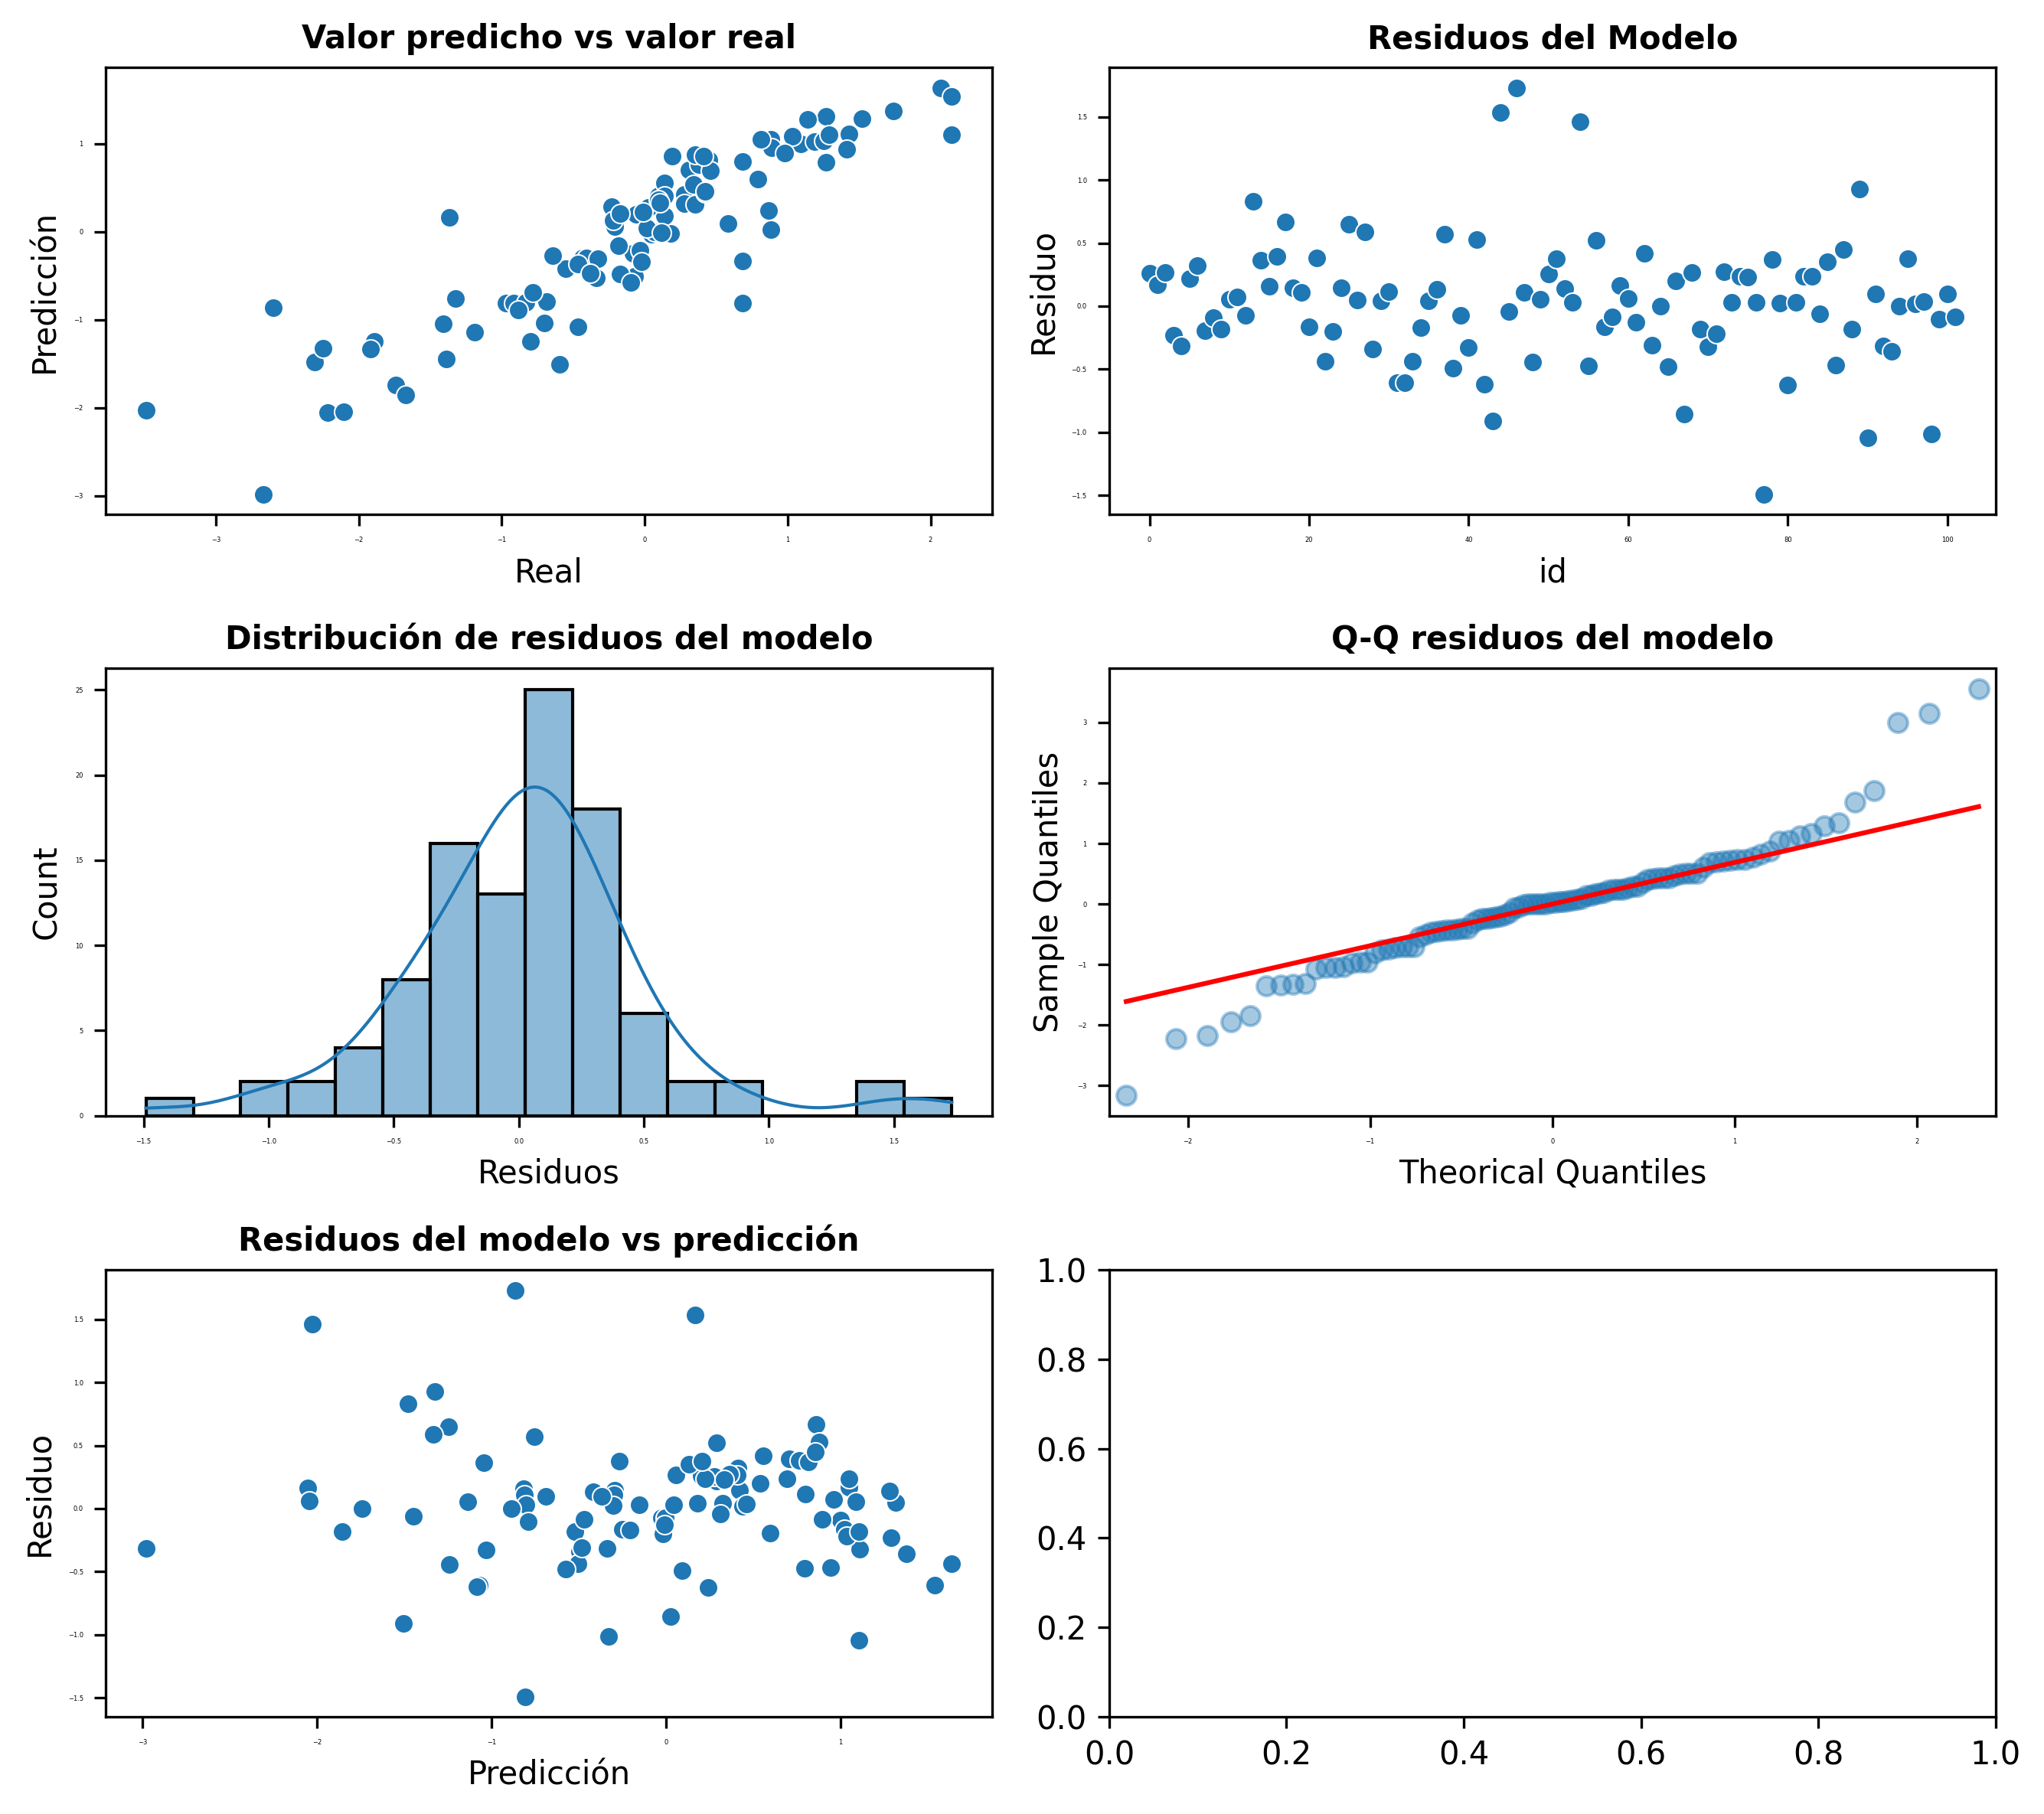

In [60]:
graf(prediccion_test_final.reshape(-1)).predict_linear(y_test_st.reshape(-1))